## Prétraitement de `df_entreprises`

Le prétraitement de `df_entreprises` comprend plusieurs étapes. Voici les tâches préalables de prétraitement :

### Vérification et Correction des Données
- **Vérification des valeurs manquantes** : Inspecter le DataFrame pour identifier et traiter les valeurs manquantes.
- **Suppression des doublons** : Rechercher et éliminer les enregistrements en double pour éviter la redondance.
- **Correction des erreurs** : Analyser les données pour détecter et corriger les erreurs potentielles.

### Normalisation des Textes
Utilisation de la classe `EntreprisePreprocessor` du fichier `prepro_entreprises` pour :
- **`clean_location`** : Standardiser les formats de localisation, en ajustant les majuscules et minuscules.
- **`clean_company_name`** : 
  - Retirer les URL et autres mentions non pertinentes, comme "Home |".
  - Extraire la partie pertinente du nom d'entreprise (par exemple, "Black Kube" de "Home | Black Kube garde meuble et self stockage").
  - Uniformiser les noms pour assurer la cohérence dans les abréviations et les formats (e.g., remplacer 'Demenagement' par 'Déménagement').

### Traitement des Services Proposés
- **Nettoyage** : Nettoyer et préparer les listes de services proposés.
- **One-hot Encoding** : Convertir les listes de services en une série de variables indicatrices pour faciliter l'analyse quantitative.
- **Extraction d'informations spécifiques** : Identifier et extraire le type de service le plus mentionné pour des analyses ultérieures.

### Traitement des URLs
- **Note** : Le traitement spécifique des URLs n'est pas abordé dans cette phase.



In [93]:
import pandas as pd

df_entreprises=pd.read_csv("entreprises.csv")
display(df_entreprises.head())
display(df_entreprises.info())

Entreprise  \
0  Nextories (ex i-Demenager)   
1                  La Tournée   
2   CartonsDeDemenagement.com   
3                     LOCABOX   
4          La Tribu du Carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       PARIS, France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris, France   
2  https://fr.trustpilot.com/review/www.cartonsde...    LIMONEST, France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont, France   
4  https://fr.trustpilot.com/review/www.latribudu...  Vénissieux, France   

   TrustScore  NombreAvis                                   ServicesProposes  
0         4.9        3729  ['Entreprise de livraison', 'Service de transp...  
1         4.9         489  ['Boutique de boissons non alcoolisées', 'Dist...  
2         4.8       11400  ["Magasin d'articles d'emballage", "Magasin d'...  
3         4.8        7546  ['Centre de stockage', 'Entrepôt', 'Centre de ...  
4         4.8        5184  ["Magasin d'articles de déménagement", "Magasi...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.4+ KB


None

## Utilisation de la classe :: EntreprisePreprocessor

In [94]:

from prepro_entreprises import EntreprisePreprocessor
# Création de l'instance du préprocesseur
preprocessor = EntreprisePreprocessor()   
# Adapter le préprocesseur
preprocessor.fit(df_entreprises)
# Transformer les données
transformed_df = preprocessor.transform(df_entreprises)
# Afficher le DataFrame transformé
transformed_df.head()

Entreprise  \
0  nextories (ex i-demenager)   
1                  la tournée   
2       cartonsdedemenagement   
3                     locabox   
4          la tribu du carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       Paris, France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris, France   
2  https://fr.trustpilot.com/review/www.cartonsde...    Limonest, France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont, France   
4  https://fr.trustpilot.com/review/www.latribudu...  Vénissieux, France   

   TrustScore  NombreAvis  agence de communication pour les réseaux sociaux  \
0         4.9        3729                                                 0   
1         4.9         489                                                 0   
2         4.8       11400                                                 0   
3         4.8        7546                                                 0   
4         4.8        5184                                                 0   

   agence de location d'espaces commerciaux  agence de location de bungalows  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   agence de location de fourgonnettes  agence e-commerce  ...  \
0                                    0                  0  ...   
1                                    0                  0  ...   
2                                    0                  0  ...   
3                                    0                  0  ...   
4                                    0                  0  ...   

   services de stockage d'archives  société d'import-export  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   

   société de transport en bus et autocar  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   société de transport international de marchandises  \
0                                                  1    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   société de transport routier  supermarché  supermarché discount  \
0                             0            0                     0   
1                             0            0                     0   
2                             0            0                     0   
3                             0            0                     0   
4                             0            0                     0   

   syndicat de copropriété  torréfacteurs  vente de fruits et légumes en gros  
0                        0              0                                   0  
1                        0              0                                   0  
2                        0              0                                   0  
3                        0              0                                   0  
4                        0              0                                   0  

[5 rows x 146 columns]

## Utilisation de la Classe `Geocoder`

Dans la classe `Geocoder`, nous récupérons les coordonnées géographiques afin de visualiser sur une carte la localisation de chaque entreprise.

### Processus de Récupération des Coordonnées
Pour chaque adresse présente dans la colonne `Location` du DataFrame, la classe `Geocoder` effectue les opérations suivantes :
- **Récupération des coordonnées** : Extraction des coordonnées (latitude et longitude) associées à chaque adresse.
- ** Ajouetr les coorrdonnée dans deux colonnes dans notre data frame 

In [95]:
# je travail sur la calsse déjà crerr
from Geocodification import Geocoder

# Create an instance of the Geocoder / pour obtenire les corrdonnes ()
geocodonnees = Geocoder(user_agent="test_app")
 # Test adding coordinates to the DataFrame
geocodonnees.add_coordinates(df_entreprises)
df_entreprises.head()



Entreprise  \
0  Nextories (ex i-Demenager)   
1                  La Tournée   
2   CartonsDeDemenagement.com   
3                     LOCABOX   
4          La Tribu du Carton   

                                                 Url            Location  \
0     https://fr.trustpilot.com/review/nextories.com       PARIS, France   
1  https://fr.trustpilot.com/review/www.la-tourne...       Paris, France   
2  https://fr.trustpilot.com/review/www.cartonsde...    LIMONEST, France   
3        https://fr.trustpilot.com/review/locabox.fr     Lormont, France   
4  https://fr.trustpilot.com/review/www.latribudu...  Vénissieux, France   

   TrustScore  NombreAvis                                   ServicesProposes  \
0         4.9        3729  ['Entreprise de livraison', 'Service de transp...   
1         4.9         489  ['Boutique de boissons non alcoolisées', 'Dist...   
2         4.8       11400  ["Magasin d'articles d'emballage", "Magasin d'...   
3         4.8        7546  ['Centre de stockage', 'Entrepôt', 'Centre de ...   
4         4.8        5184  ["Magasin d'articles de déménagement", "Magasi...   

    Latitude  Longitude  
0  48.858890   2.320041  
1  48.858890   2.320041  
2  45.835670   4.770834  
3  44.879171  -0.521668  
4  45.697711   4.885597

## Utilisation de la Classe `VisualisationGeneral`


**Visualisation sur Carte** : Utilisation des coordonnées récupérées pour placer des marqueurs sur une carte, représentant la localisation géographique de chaque entreprise.

Ce processus permet une visualisation intuitive de la distribution géographique des entreprises, facilitant ainsi des analyses spatiales plus approfondies.

**Visualisation** 'Nombre d\'entreprises par Ville avec plot_bar_chart

**Visualisation** Trace un diagramme en barres des top_n services les plus utilisés par les entreprises par plot_bar_chart_services   


In [96]:
# ici soit la data frame df_entreprises/ soit avec transformed_df
from VisualisationMap import VisualisationGeneral
print(df_entreprises.info())
print(df_entreprises.isna().sum())
# attention le data ne doit pas avoir des valeurs manquant dans les colonnes Latitude', 'Longitude et  Location
valid_data = df_entreprises.dropna(subset=['Latitude', 'Longitude'])
map_obj = VisualisationGeneral.plot_map(valid_data, popup_column='Location')
display(map_obj)
if map_obj:
   map_obj.save('map.html')
else:
    print("Aucune donnée valide pour créer la carte.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entreprise        220 non-null    object 
 1   Url               220 non-null    object 
 2   Location          220 non-null    object 
 3   TrustScore        220 non-null    float64
 4   NombreAvis        220 non-null    int64  
 5   ServicesProposes  220 non-null    object 
 6   Latitude          218 non-null    float64
 7   Longitude         218 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 13.9+ KB
None
Entreprise          0
Url                 0
Location            0
TrustScore          0
NombreAvis          0
ServicesProposes    0
Latitude            2
Longitude           2
dtype: int64


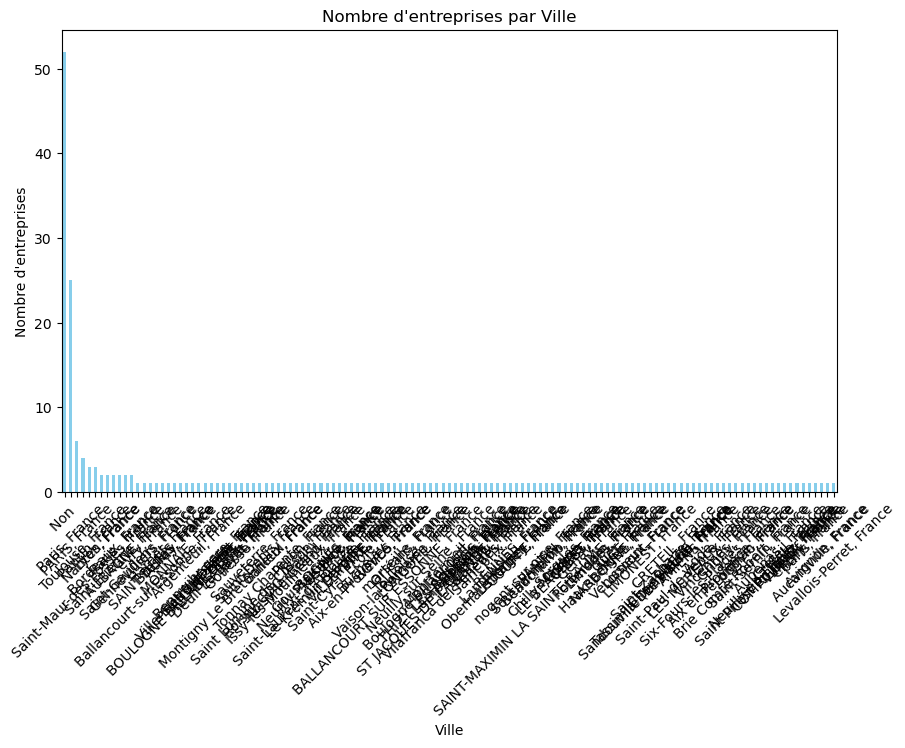

In [98]:
# classe de visualisation 

location_counts = df_entreprises['Location'].value_counts()
VisualisationGeneral.plot_bar_chart(location_counts)




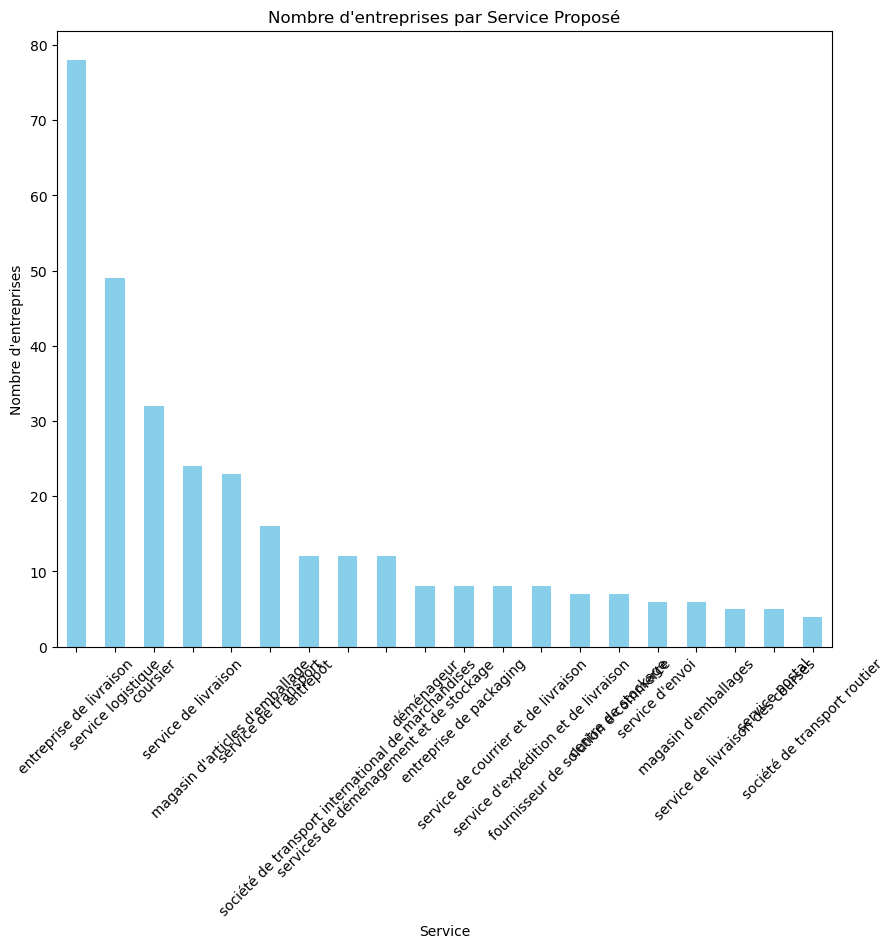

In [99]:
# ici on a besoin à utiliser la transformed_df pour les colonnes ajouté par One-hot Encoding 
# 20 top 20 entrprise  ayant le Nombre de services les plus utilisés à afficher dans le diagramme
VisualisationGeneral.plot_bar_chart_services(transformed_df,20)


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


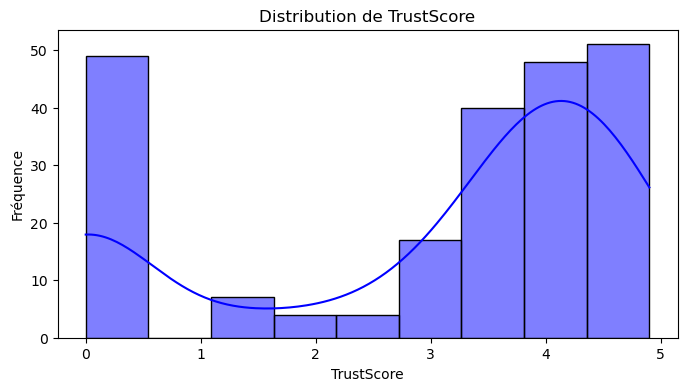

In [101]:
VisualisationGeneral.histogramme_trustScore(transformed_df['TrustScore']);

In [ ]:
# je garde le dataframe dans ficher csv df_Intreprise_preprocessing.csv .

In [102]:

transformed_df.to_csv('df_Intreprise_preprocessing.csv', index=False)




### Partie concernant la deuxième DataFrame : `avis.csv`

Une classe `AvisPreprocessor` a été créée. Cette classe contient des méthodes avec des docstrings détaillés qui expliquent le but et le fonctionnement de chaque composant. Voici une description des fonctionnalités principales :

- **Préprocesseur pour les données d'avis** : Nettoie et transforme les colonnes spécifiques pour la préparation à l'analyse. Les données sont transformées avec les noms nettoyés, les valeurs manquantes remplacées et les dates converties en format datetime.

#### Quelques étapes préliminaires de prétraitement pour le DataFrame des avis clients :

1. **Vérification des valeurs manquantes** : Certains champs comme `Nom_Client` et `Pays` ont des valeurs manquantes.(
     la décision de  remplir ces valeurs avec des valeurs par défaut ou les supprimer à Voir selon la contibution possible de ces varaibels dans notre travail.)
   
3. **Normalisation des noms** : les noms des entreprises dans les deux DataFrames correspondent exactement pour faciliter les jointures ( la fonction a été héritée  pour la conversion des noms en minuscules ou l'application d'une forme standardisée).

4. **Conversion des dates** :  le champ `Date`  à été converti du format texte en type date pour faciliter les analyses temporelles.
5. Suppression des espaces superflus : éliminer les espaces avant et après le texte, ainsi que les espaces multiples à l'intérieur du texte.


**A faire avec les colonnes `Titre_avis` et `Contenu_avis`** 
**Nettoyage de base du texte :**
2. Suppression des mots peu informatifs (stop words) :
       
3. Tokenisation :
        Diviser le texte en mots ou en phrases plus petites (tokens) pour faciliter l'analyse.

4. Lemmatisation ou Stemming :
        Lemmatisation : ramener les mots à leur forme de base ou lexicale (par exemple, "marchant", "marché" à "marcher").
        Stemming : couper les mots à leur racine, ce qui peut parfois être moins précis que la lemmatisation.
5. Identification des émoticônes ou des slangs :
        Si les commentaires contiennent des émoticônes ou du langage informel,je les ai converti en texte pour mieux analyser leur  sentiment.

6. Analyse des sentiments :
        Évaluer si les commentaires sont positifs, négatifs ou neutres. Cela peut impliquer l'utilisation de modèles pré-entraînés ou le développement de un propre classificateur **(pas encore faire !!!!)**.

7. Vectorisation du texte :
        Convertir le texte en une forme numérique que les algorithmes de machine learning peuvent traiter. Les approches courantes incluent TF-IDF

8. Suppression des doublons :
        Éliminer les commentaires répétés pour éviter de fausser l'analyse.

9. Détection et correction des fautes d'orthographe :
        Corriger les erreurs pour améliorer la qualité des données et la précision de l'analyse.
   
10. Suppression des caractères spéciaux et de la ponctuation : cela simplifie le texte et évite que les modèles ne soient influencés par des éléments non pertinents **(ne pas faire :::à voir )**.
11.  Mise en minuscule : convertir tout le texte en minuscules pour uniformiser les données **(ne pas faire :::à voir )**..
        


12. **Réponses des entreprises** : Convertir le champ `Réponse_Entreprise` de "Non" et des réponses textuelles en une variable binaire (0 pour "Non", 1 pour une réponse textuelle) pour analyser l'engagement des entreprises face aux avis.**(ne pas faire :::à voir )**.


In [108]:

# je utiliser la calsse qui j'ai crerr

df_avis = pd.read_csv("avis.csv")
display(df_avis.head())
display(df_avis.info())

display(df_avis.isna().sum())


Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0             2ATPS         Agathe            1   FR     5   
1  2htransports.com  Alexandre Rif            2   FR     5   
2  2htransports.com        Game Lu            1   FR     5   
3  2htransports.com      SaYoSurMC            1   FR     5   
4  2htransports.com            S D            2   FR     1   

                       Date                                Titre_avis  \
0  2023-12-08T10:45:35.000Z                     Personnel réactif !!!   
1  2024-04-08T01:40:55.000Z  J'ai demandé un transport pour aller de…   
2  2024-03-09T22:26:36.000Z             J'ai trouvé cette société de…   
3  2023-02-16T23:30:42.000Z         Si vous recherchez un service de…   
4  2023-10-03T23:01:28.000Z   Ce Monsieur nous a flingué une mission…   

                                        Contenu_avis  \
0  Personnel réactif !!!! entreprise sérieuse qui...   
1  J'ai demandé un transport pour aller de Paris ...   
2  J'ai trouvé cette société de transporteur un p...   
3  Si vous recherchez un service de coursier prof...   
4  Ce Monsieur nous a flingué une mission humanit...   

                                    Réponse_Entrpris  
0                                                Non  
1                                                Non  
2                                                Non  
3                                                Non  
4  Bonjour MD,Je suis désolé d'entendre votre déc...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    505129 non-null  object
 1   Nom_Client        505118 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505128 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505125 non-null  object
 7   Contenu_avis      505129 non-null  object
 8   Réponse_Entrpris  505129 non-null  object
dtypes: int64(2), object(7)
memory usage: 34.7+ MB


None

Nom_Entreprise       0
Nom_Client          11
Nombre_avis          0
Pays                 1
Note                 0
Date                 0
Titre_avis           4
Contenu_avis         0
Réponse_Entrpris     0
dtype: int64

In [112]:
from Prepro_avis import AvisPreprocessor

# Création de l'instance du préprocesseur
#preprocessor = AvisPreprocessor()
# Application de la méthode transform pour tester
#transformed_df = preprocessor.transform(df_avis)

# Note ::: la classe prends un peu de temps pour effectuer tous les travaux safe le TxetMinig 
# pour cela, dans la autoteste de classe j'ai stocké les dataframe dans ficher nommé:: df_avis_Preprocessing1.csv


#Par la suite ::: je vais continuer avec ce ficher 


df_avis1 = pd.read_csv("df_avis_Preprocessing1.csv")




In [113]:
display(df_avis1.head())
display(df_avis1.info())
display(df_avis1.isna().sum())

Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel réactif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demandé un transport pour aller de…   
2  2024-03-09 22:26:36+00:00             j'ai trouvé cette société de…   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de…   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingué une mission…   

                                        Contenu_avis  \
0  personnel réactif !!!! entreprise sérieuse qui...   
1  j'ai demandé un transport pour aller de paris ...   
2  j'ai trouvé cette société de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingué une mission humanit...   

                                    Réponse_Entrpris  year  month  weekday  \
0                                                Non  2023     12        4   
1                                                Non  2024      4        0   
2                                                Non  2024      3        5   
3                                                Non  2023      2        3   
4  Bonjour MD,Je suis désolé d'entendre votre déc...  2023     10        1   

   weekend  day  hour emojis emojis_text Langue extracted_emojis  
0        0    8    10    NaN         NaN     fr              NaN  
1        0    8     1    NaN         NaN     fr              NaN  
2        1    9    22    NaN         NaN     fr              NaN  
3        0   16    23    NaN         NaN     fr              NaN  
4        0    3    23    NaN         NaN     fr              NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505129 entries, 0 to 505128
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Nom_Entreprise    504982 non-null  object
 1   Nom_Client        505056 non-null  object
 2   Nombre_avis       505129 non-null  int64 
 3   Pays              505129 non-null  object
 4   Note              505129 non-null  int64 
 5   Date              505129 non-null  object
 6   Titre_avis        505022 non-null  object
 7   Contenu_avis      505040 non-null  object
 8   Réponse_Entrpris  505129 non-null  object
 9   year              505129 non-null  int64 
 10  month             505129 non-null  int64 
 11  weekday           505129 non-null  int64 
 12  weekend           505129 non-null  int64 
 13  day               505129 non-null  int64 
 14  hour              505129 non-null  int64 
 15  emojis            11652 non-null   object
 16  emojis_text       12158 non-null   obj

None

Nom_Entreprise         147
Nom_Client              73
Nombre_avis              0
Pays                     0
Note                     0
Date                     0
Titre_avis             107
Contenu_avis            89
Réponse_Entrpris         0
year                     0
month                    0
weekday                  0
weekend                  0
day                      0
hour                     0
emojis              493477
emojis_text         492971
Langue                   0
extracted_emojis    492971
dtype: int64

In [117]:
display(df_avis1['Pays'].value_counts())

Pays
FR     476761
Non      5895
BE       3601
RE       2319
CH       1859
        ...  
AZ          1
AO          1
VU          1
MD          1
SO          1
Name: count, Length: 179, dtype: int64

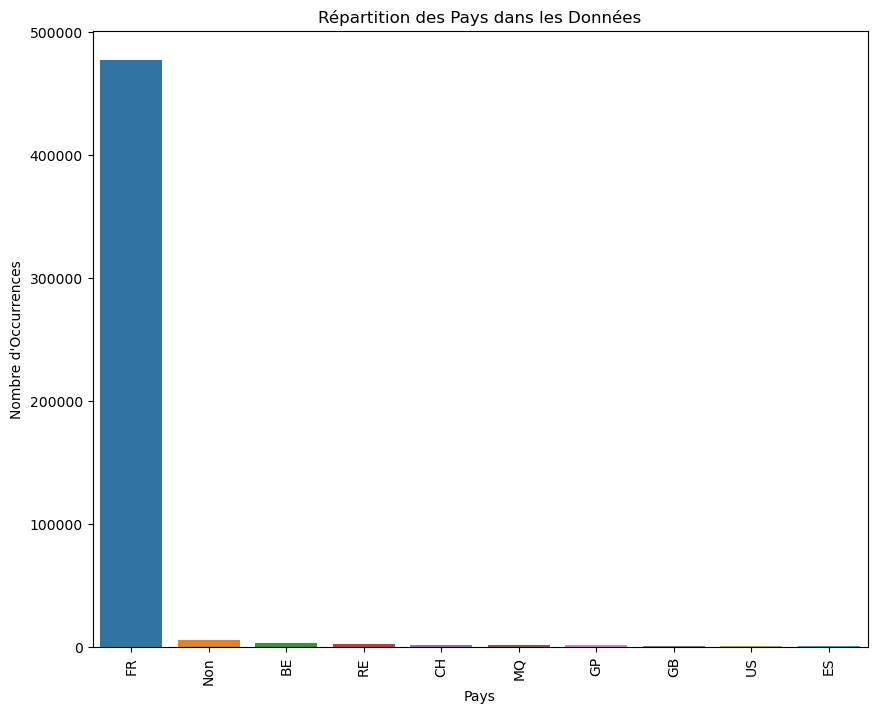

In [118]:
#Visualisation

 # Histogramme pour pays
VisualisationGeneral.diagramme_Pays(df_avis1['Pays'],10)


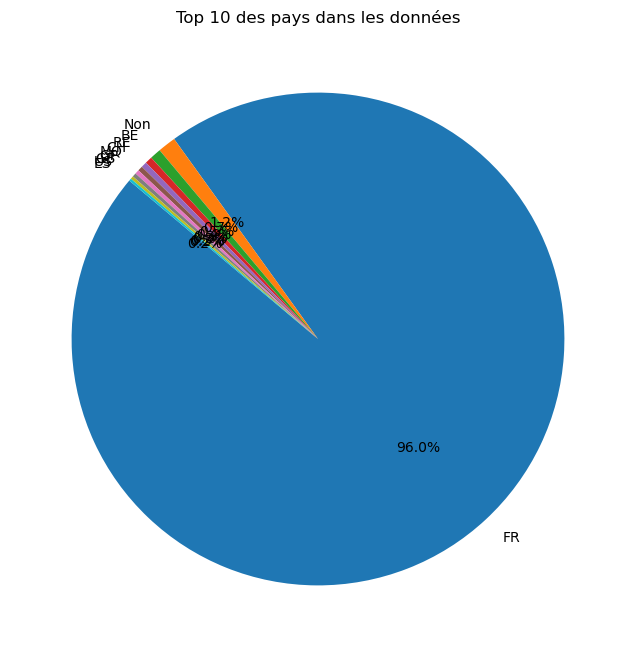

In [119]:
 # Pie_Chart_Pays
VisualisationGeneral.Pie_Chart_Pays(df_avis1['Pays'],10)


Analyse pour :
Nombre total d'avis: 147


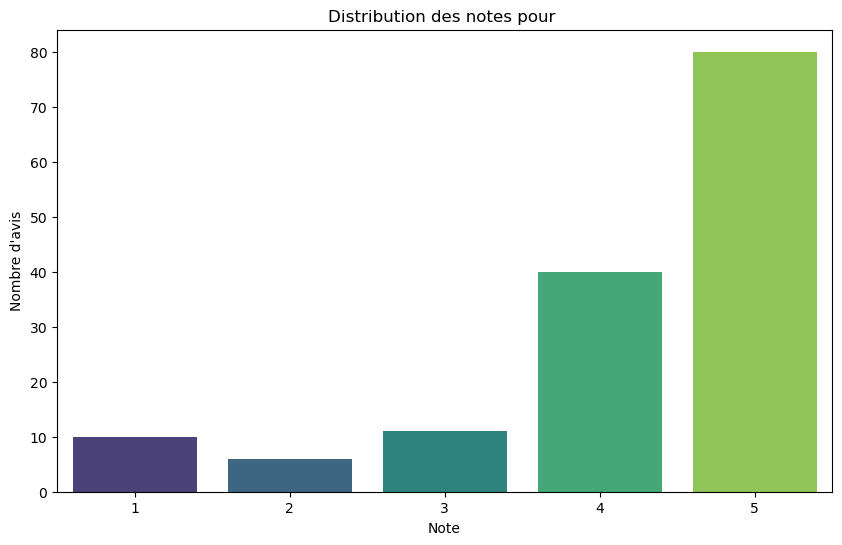

Analyse pour 2atps:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


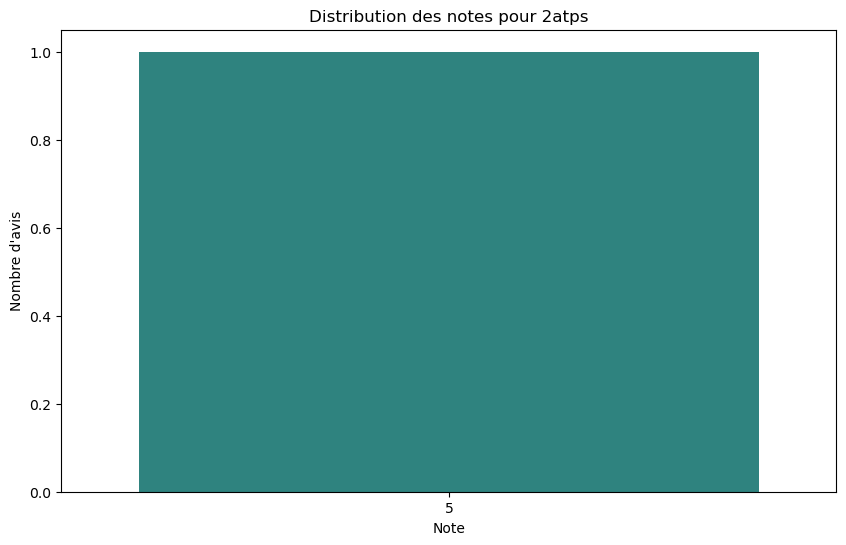

Analyse pour 2htransports:
Nombre total d'avis: 4


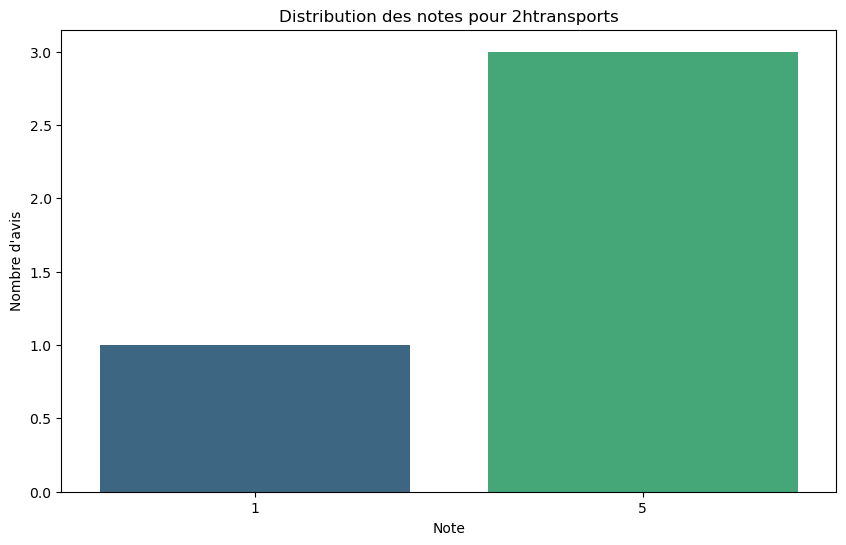

Analyse pour agenda-discount:
Nombre total d'avis: 5


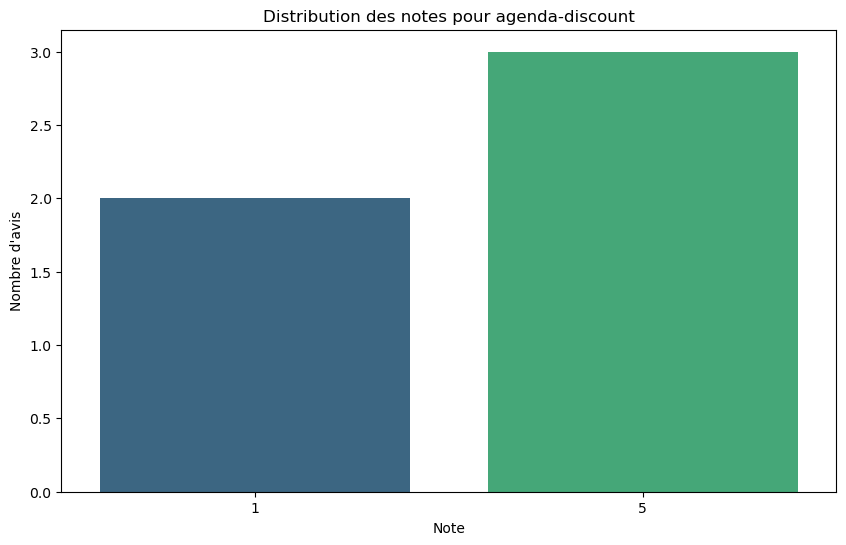

Analyse pour ags déménagement:
Nombre total d'avis: 469


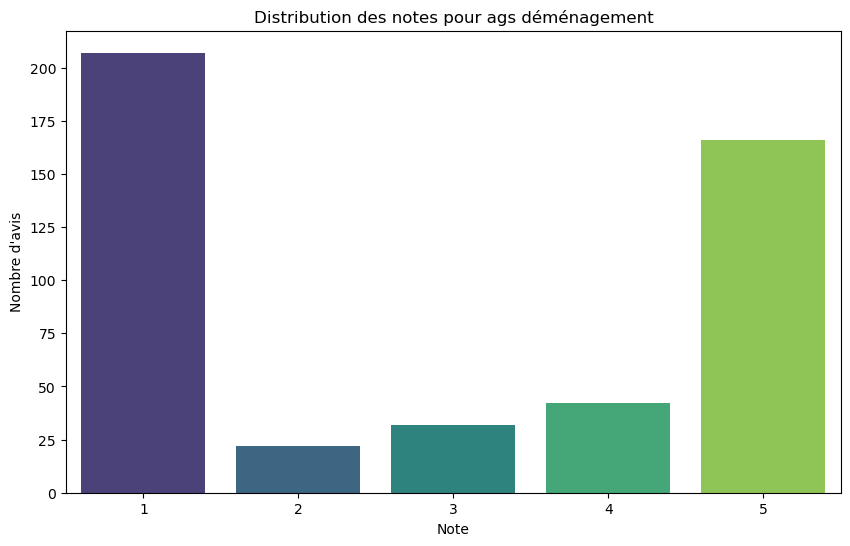

Analyse pour airjet cargo:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


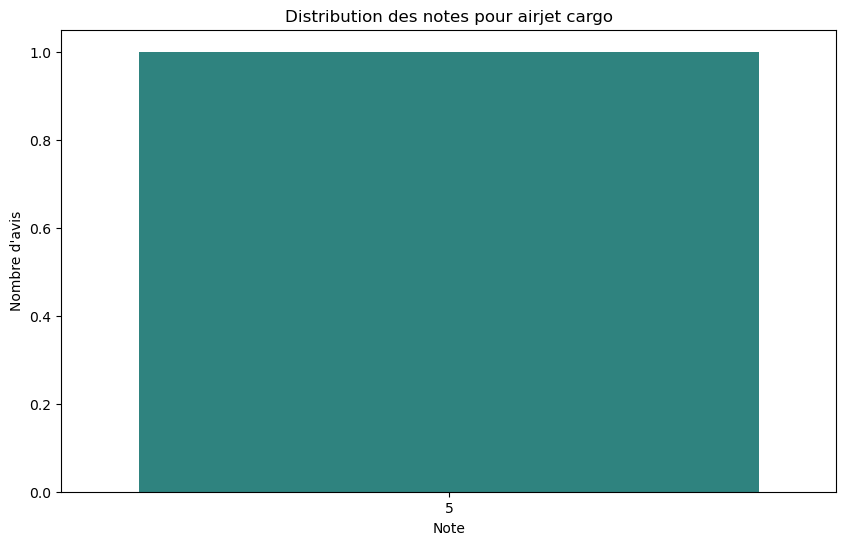

Analyse pour airselli:
Nombre total d'avis: 23


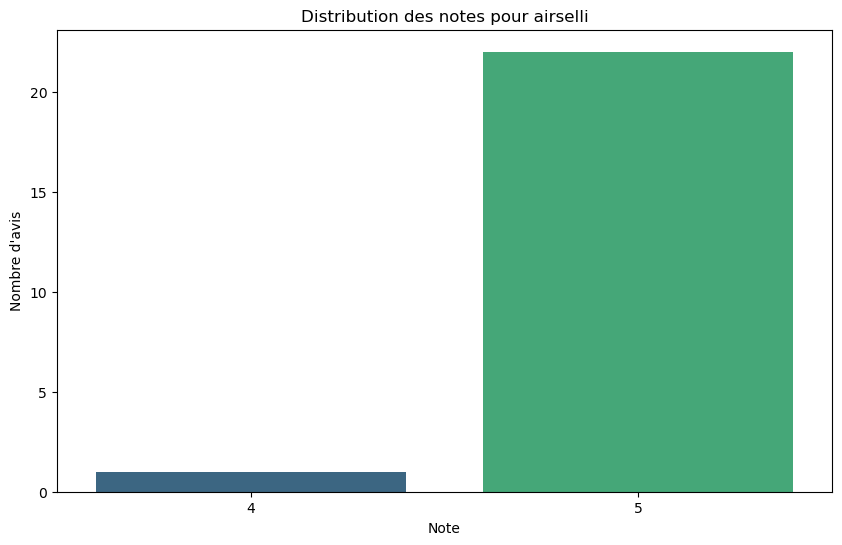

Analyse pour akaz:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


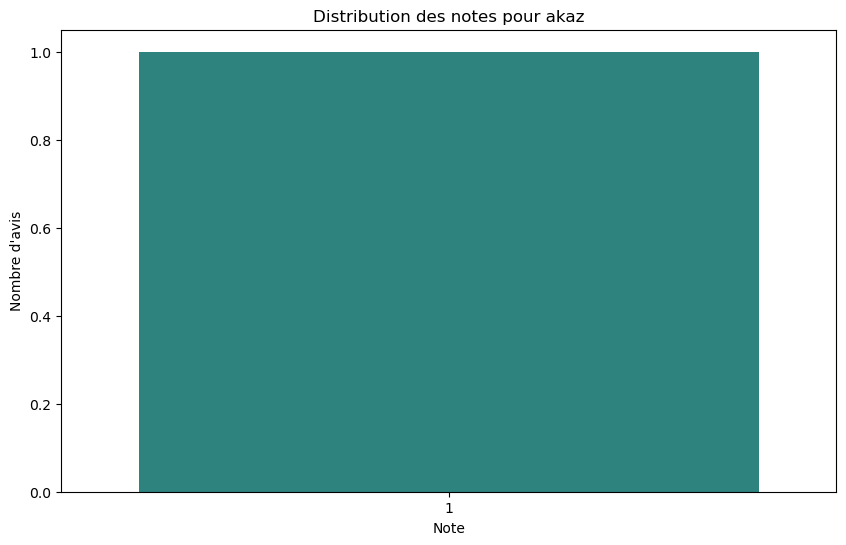

Analyse pour all transporteurs:
Nombre total d'avis: 287


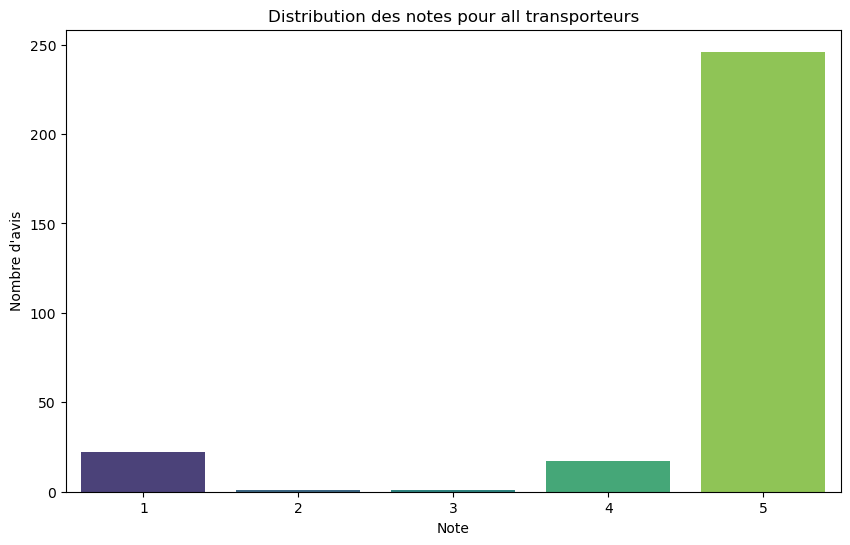

Analyse pour apero le mans:
Nombre total d'avis: 25


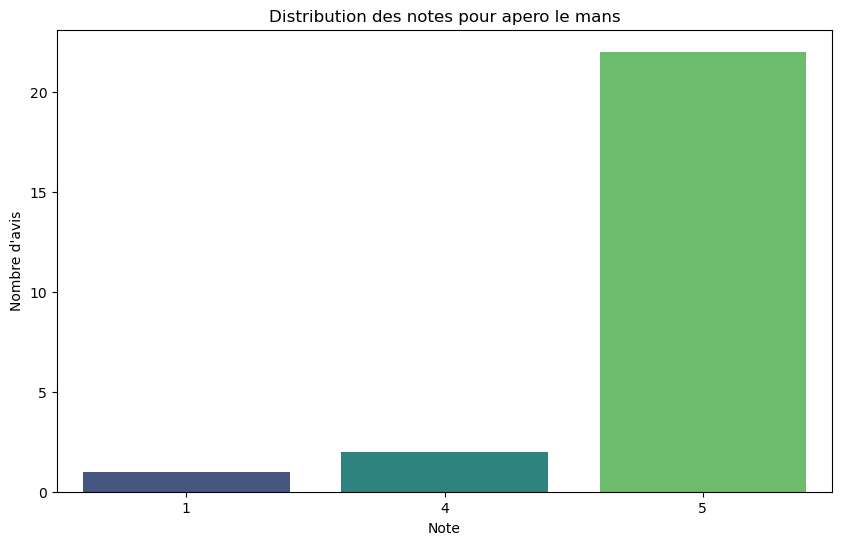

Analyse pour asntransport paris:
Nombre total d'avis: 13


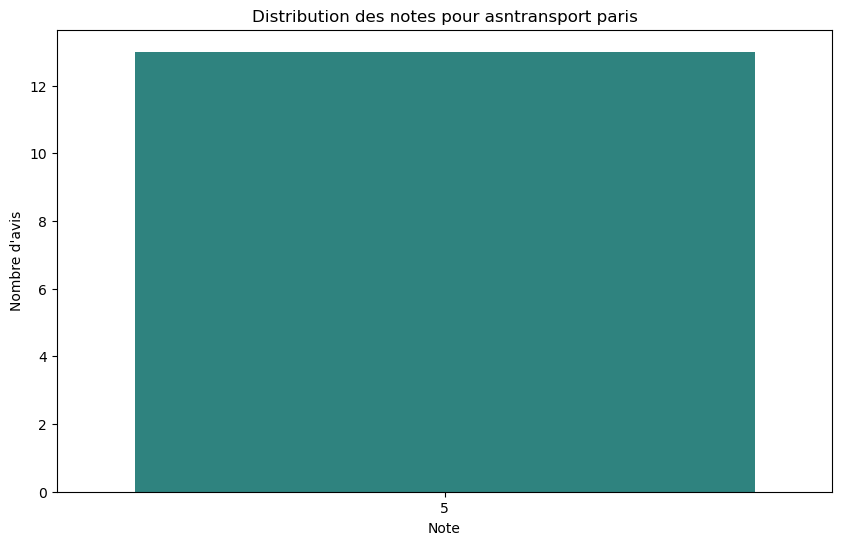

Analyse pour atradem:
Nombre total d'avis: 9


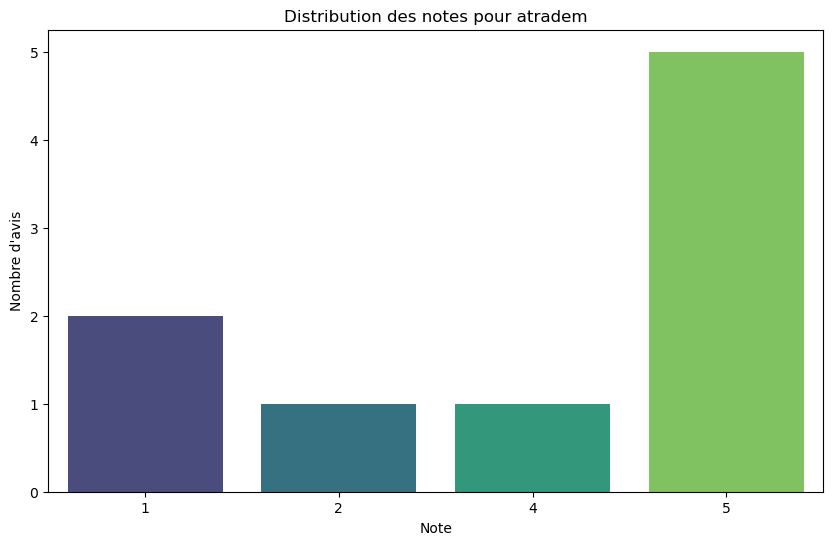

Analyse pour ava déménagement:
Nombre total d'avis: 66


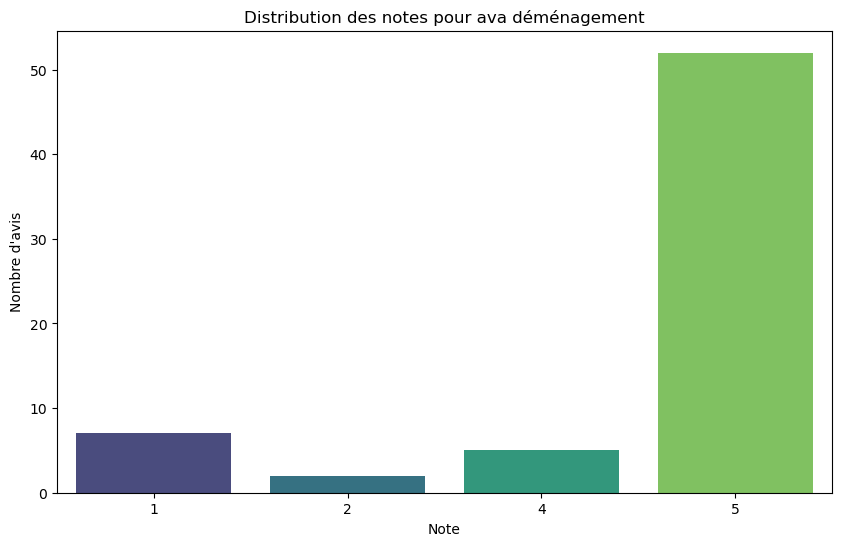

Analyse pour axal:
Nombre total d'avis: 3


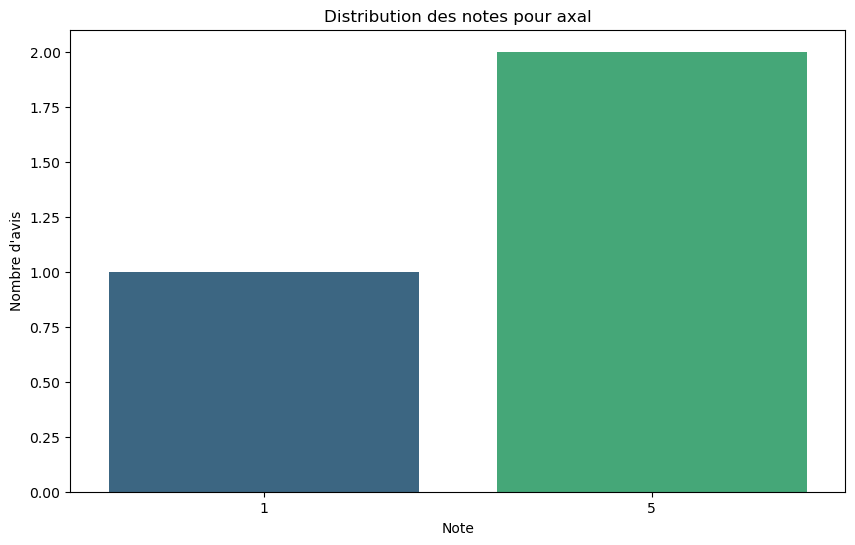

Analyse pour best demenagements:
Nombre total d'avis: 60


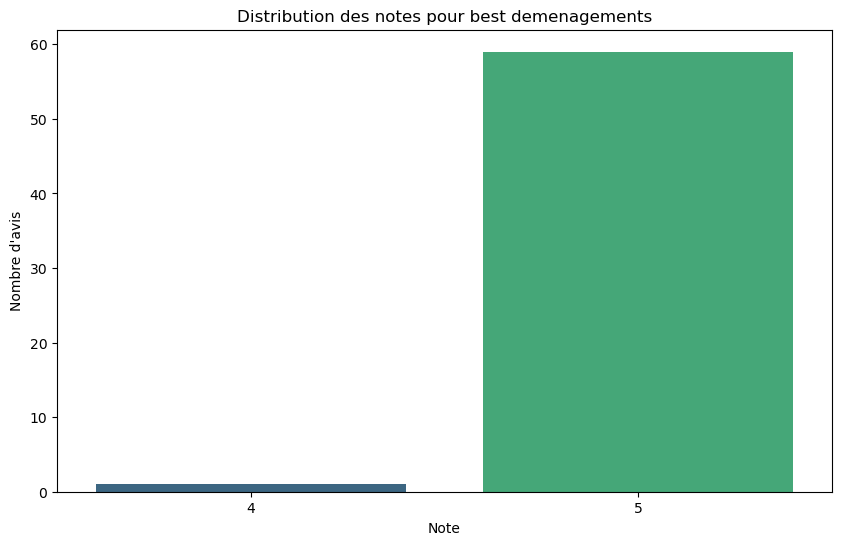

Analyse pour bigblue:
Nombre total d'avis: 7


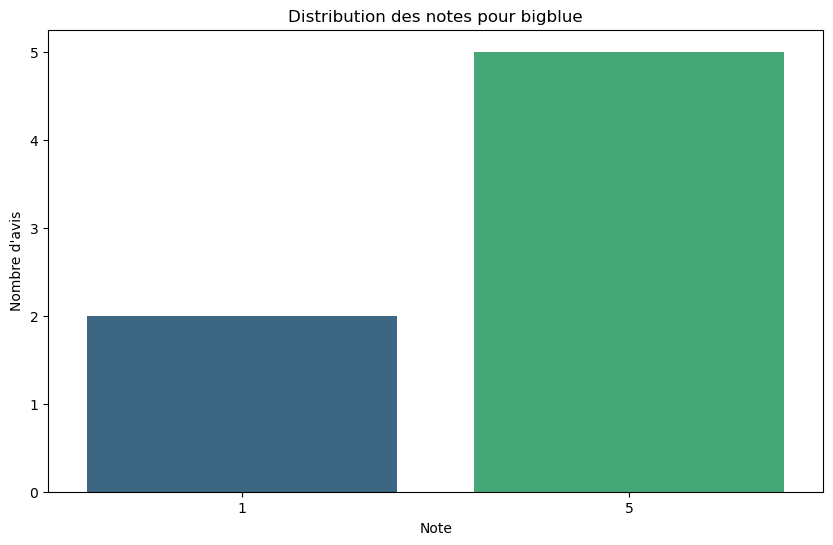

Analyse pour bonjour demenagement:
Nombre total d'avis: 625


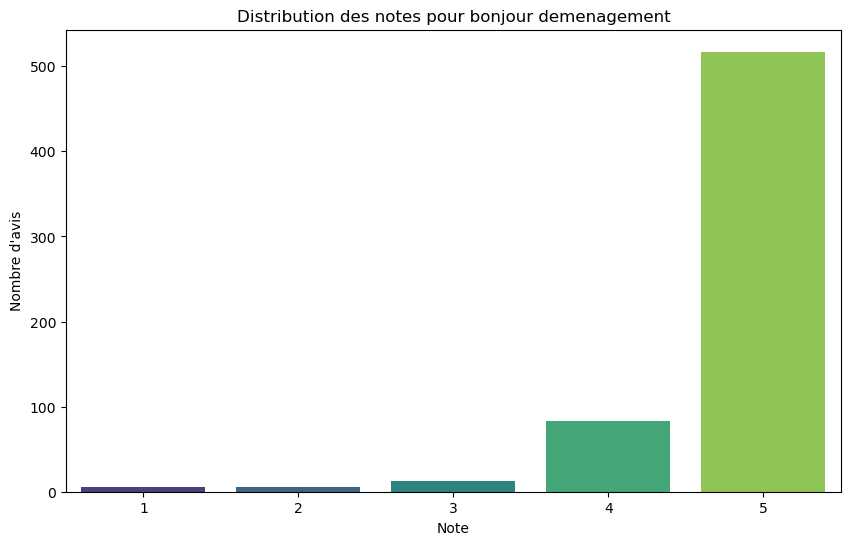

Analyse pour boxinnov:
Nombre total d'avis: 7


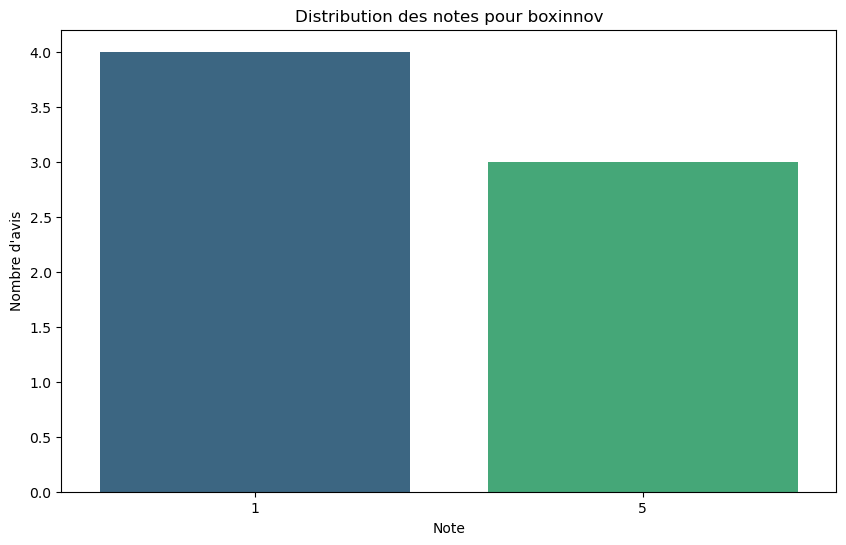

Analyse pour boxon sarl:
Nombre total d'avis: 4


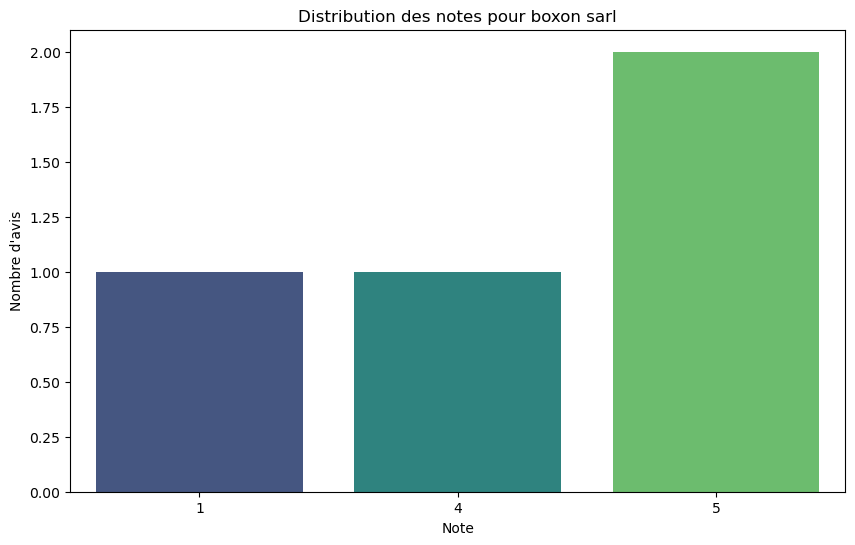

Analyse pour boxtal:
Nombre total d'avis: 3839


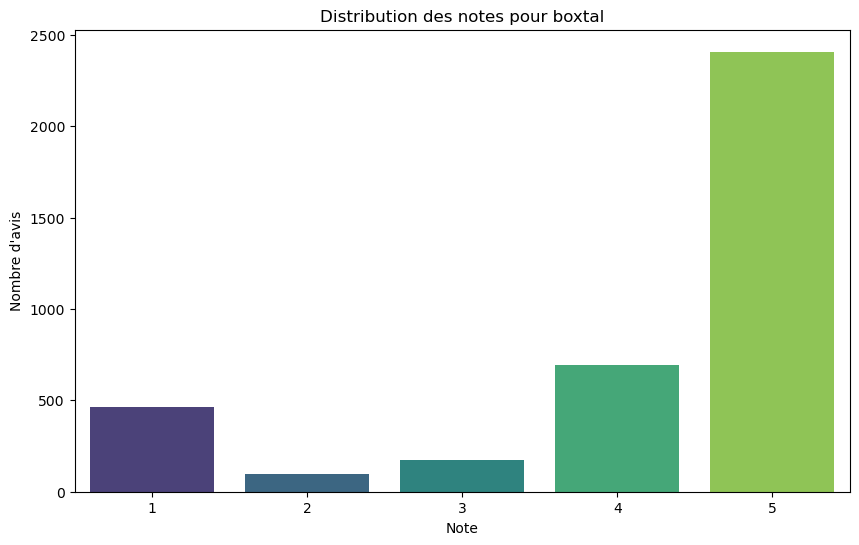

Analyse pour bring4you:
Nombre total d'avis: 309


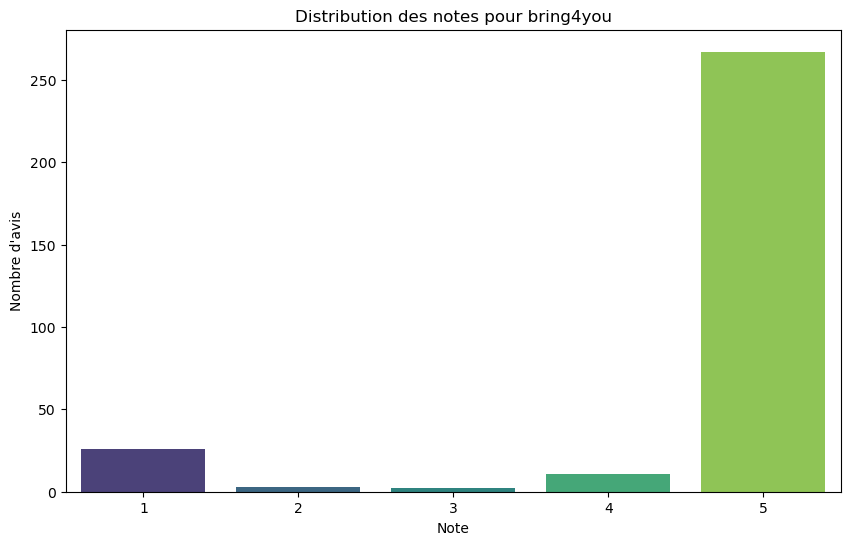

Analyse pour byebyecolis:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


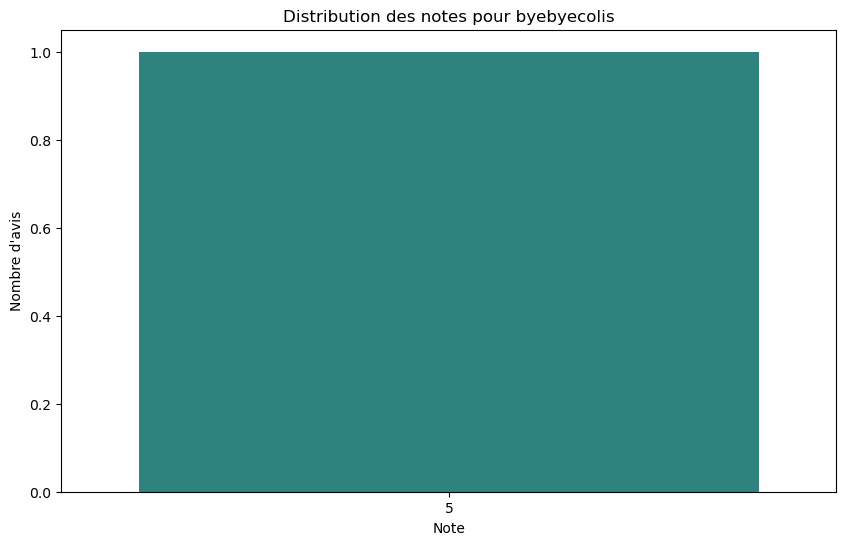

Analyse pour c2pack:
Nombre total d'avis: 98


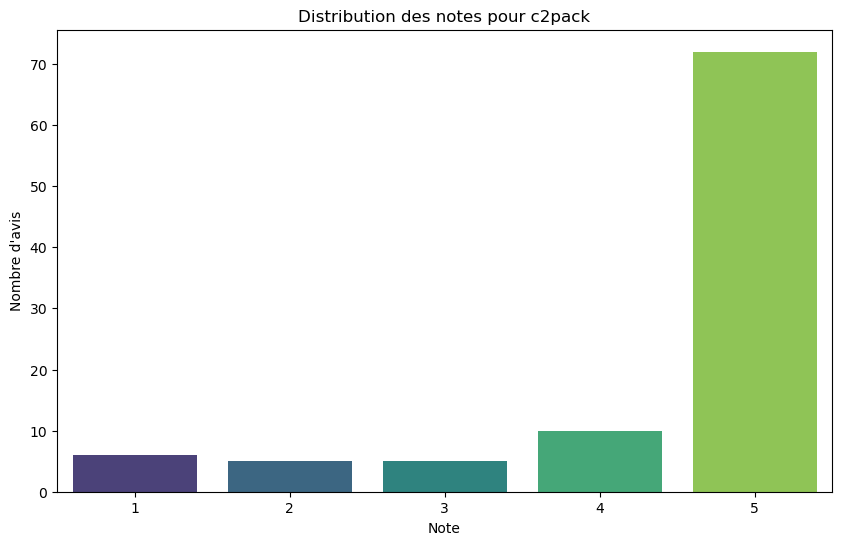

Analyse pour cafeographe:
Nombre total d'avis: 21


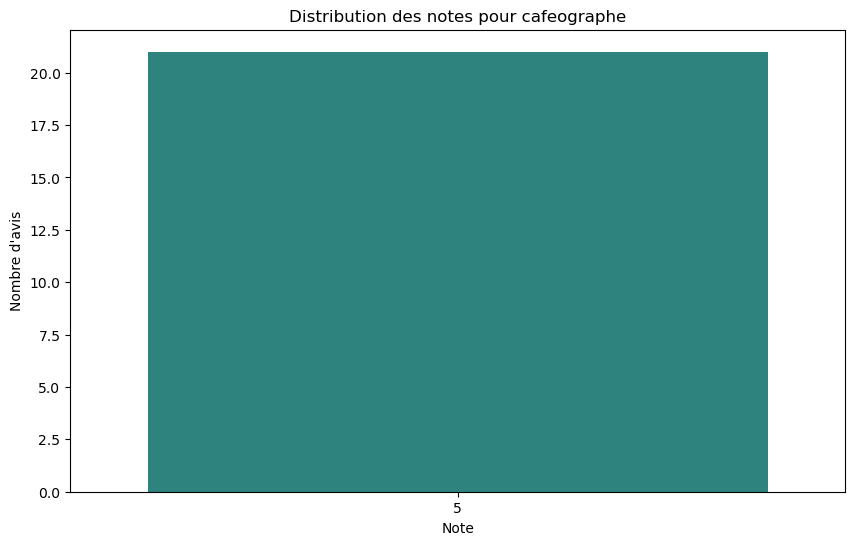

Analyse pour carton market:
Nombre total d'avis: 25014


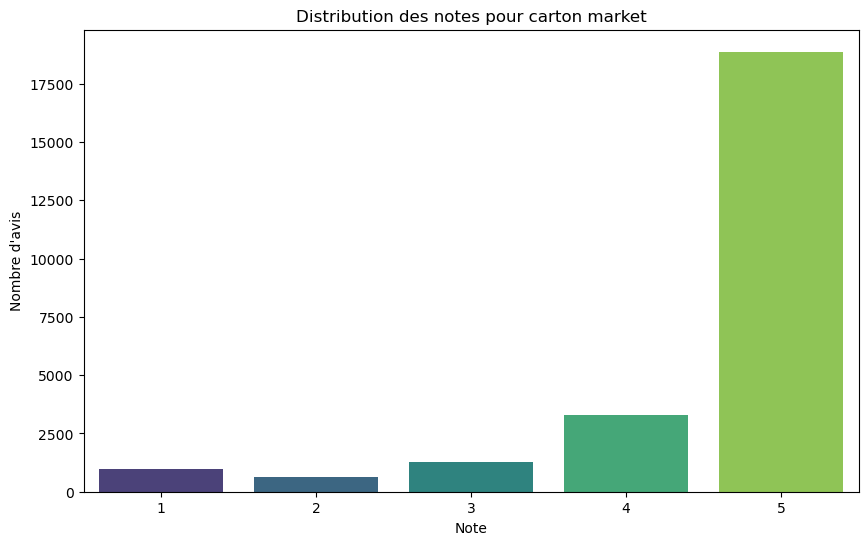

Analyse pour carton shop:
Nombre total d'avis: 90


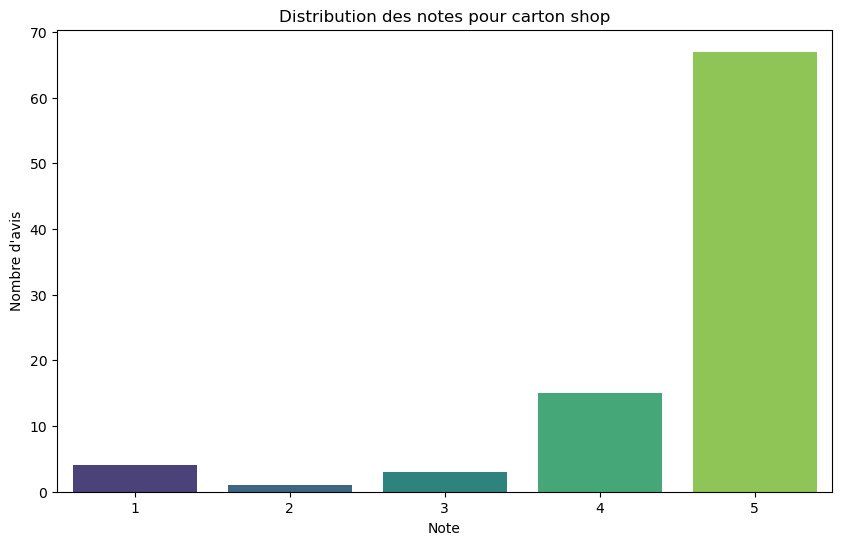

Analyse pour cartonsdedemenagement:
Nombre total d'avis: 10888


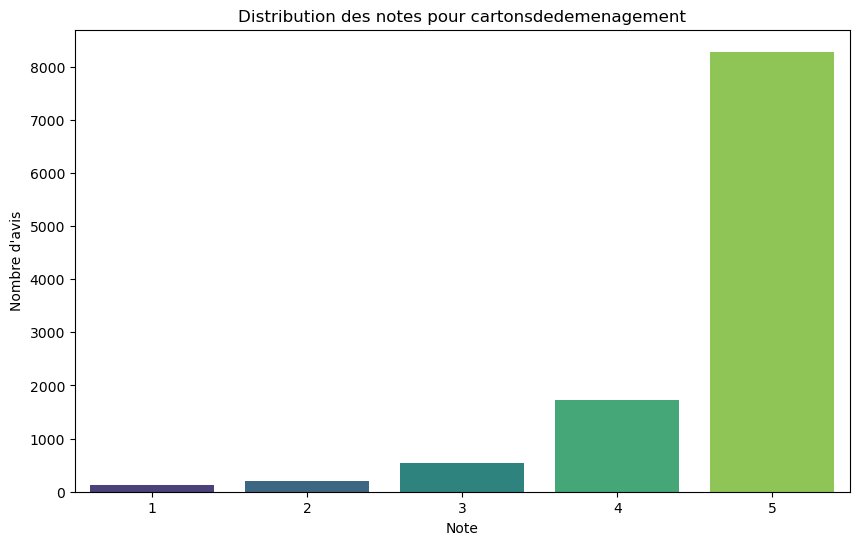

Analyse pour chronofresh:
Nombre total d'avis: 21782


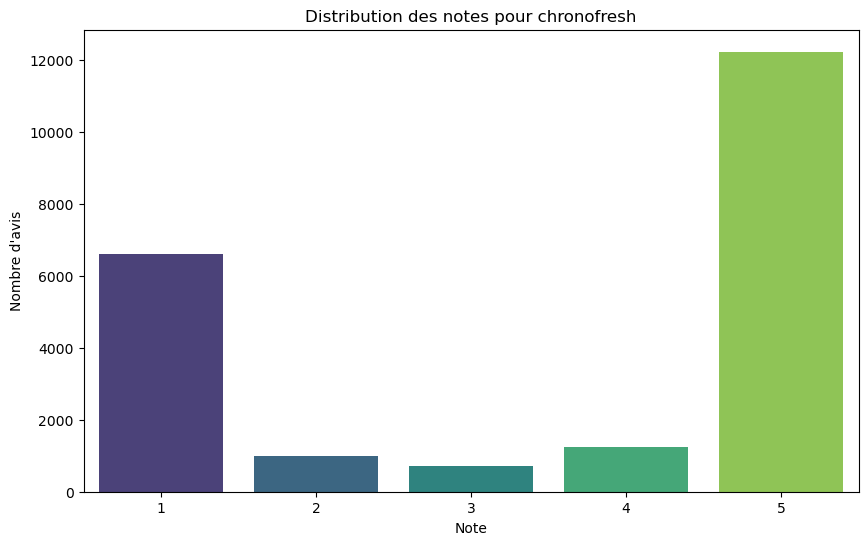

Analyse pour chronopost:
Nombre total d'avis: 94583


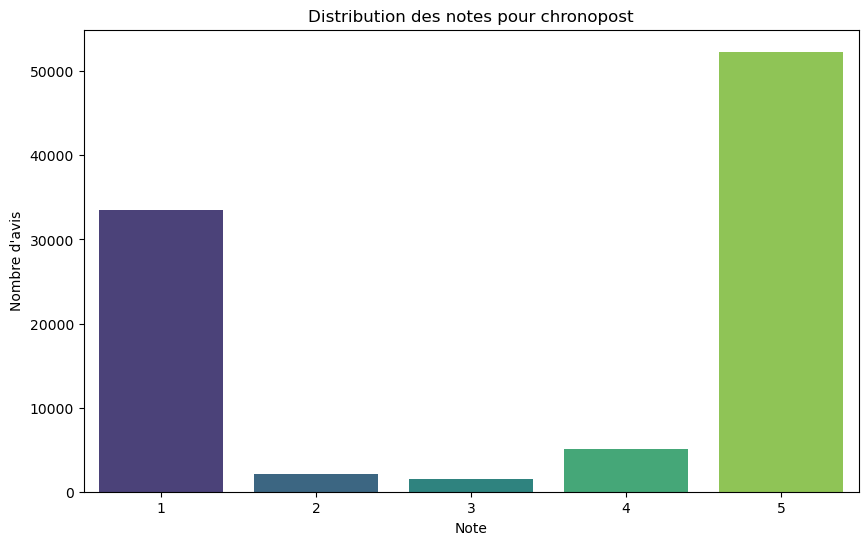

Analyse pour cliquezpostez:
Nombre total d'avis: 6


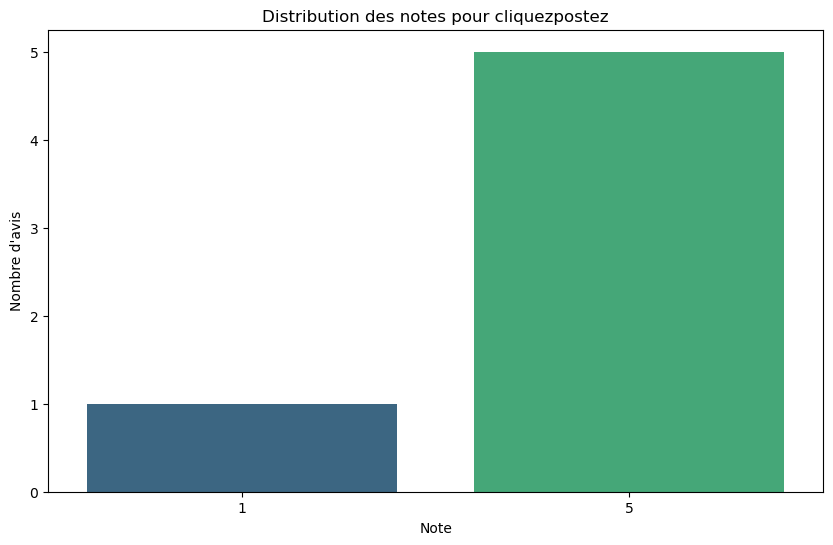

Analyse pour cocolis:
Nombre total d'avis: 3651


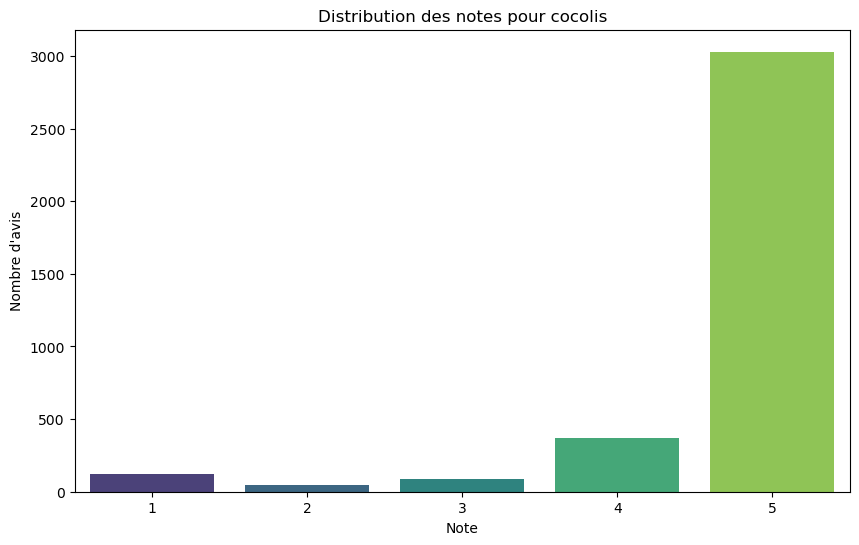

Analyse pour coliback:
Nombre total d'avis: 6081


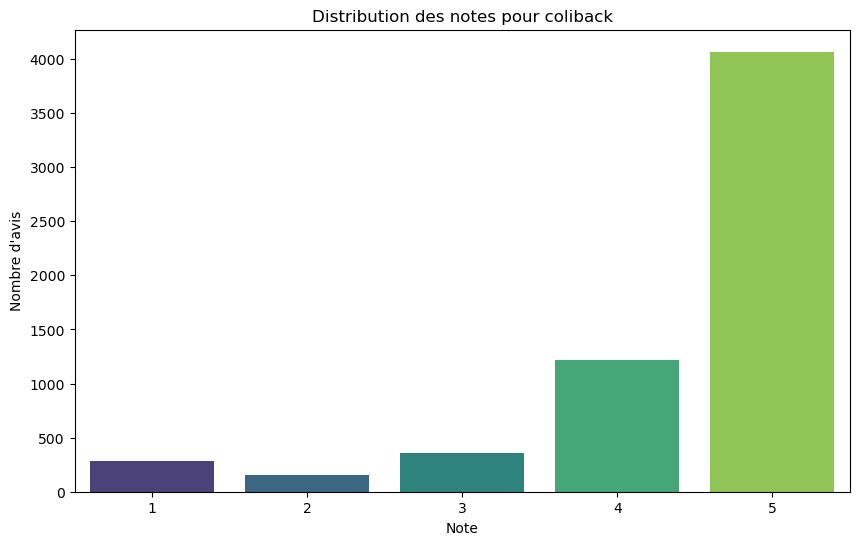

Analyse pour colicoli:
Nombre total d'avis: 44968


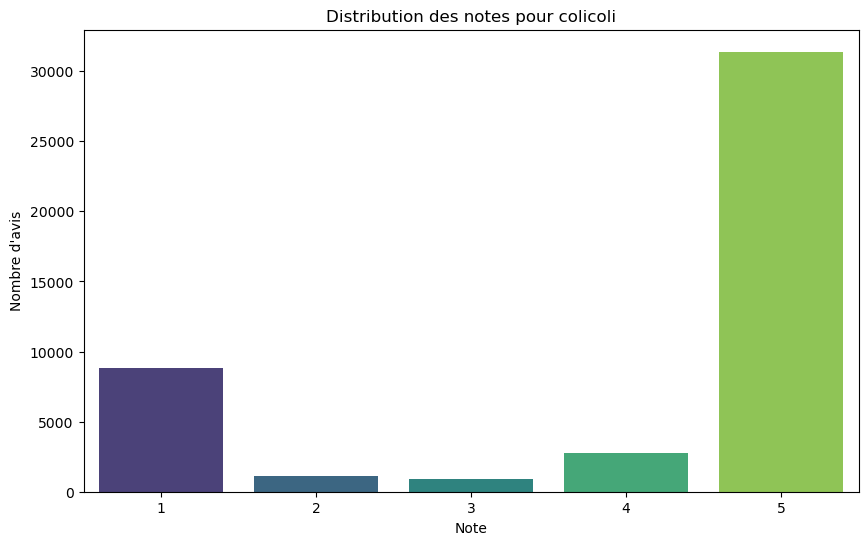

Analyse pour colis affranchis:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


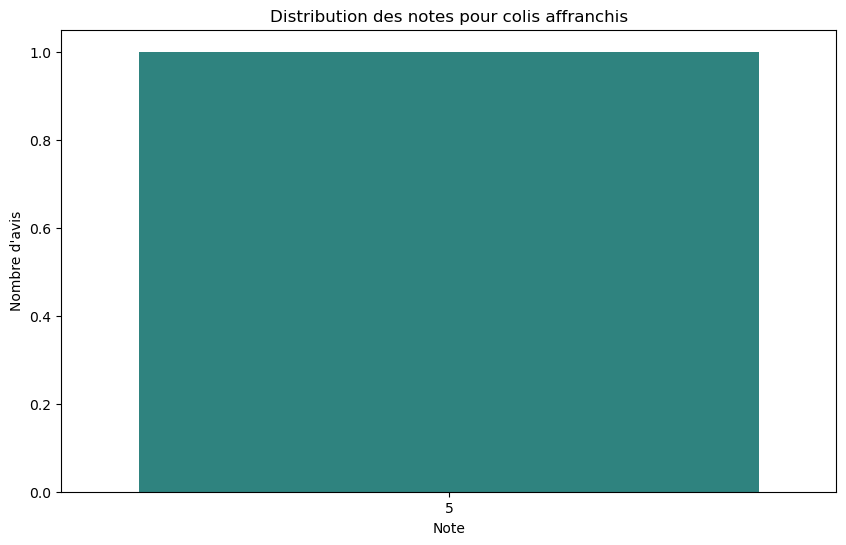

Analyse pour colisexpat:
Nombre total d'avis: 6496


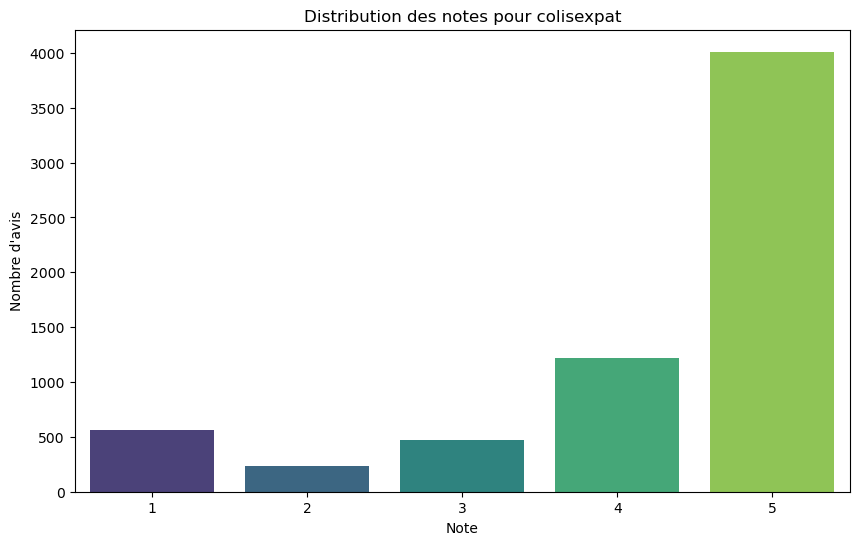

Analyse pour colissimo:
Nombre total d'avis: 12274


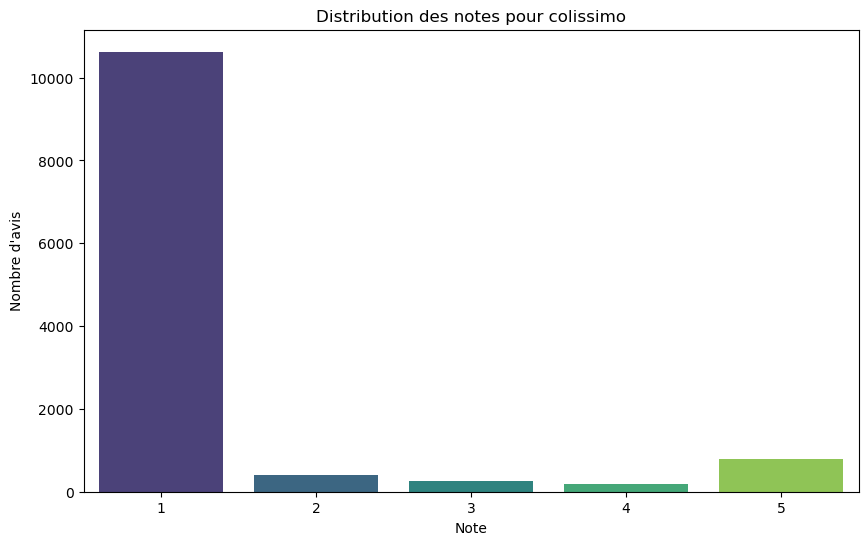

Analyse pour coursier:
Nombre total d'avis: 234


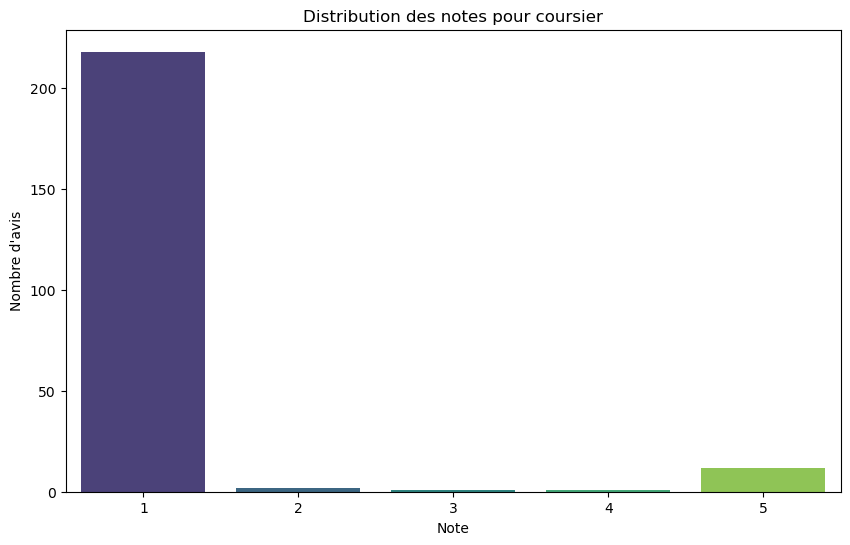

Analyse pour coursier-moto:
Nombre total d'avis: 2


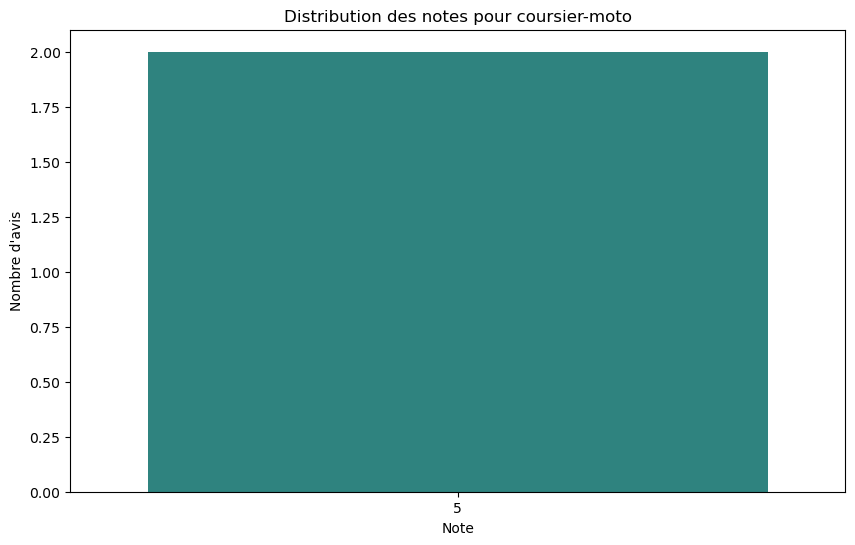

Analyse pour crogo:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


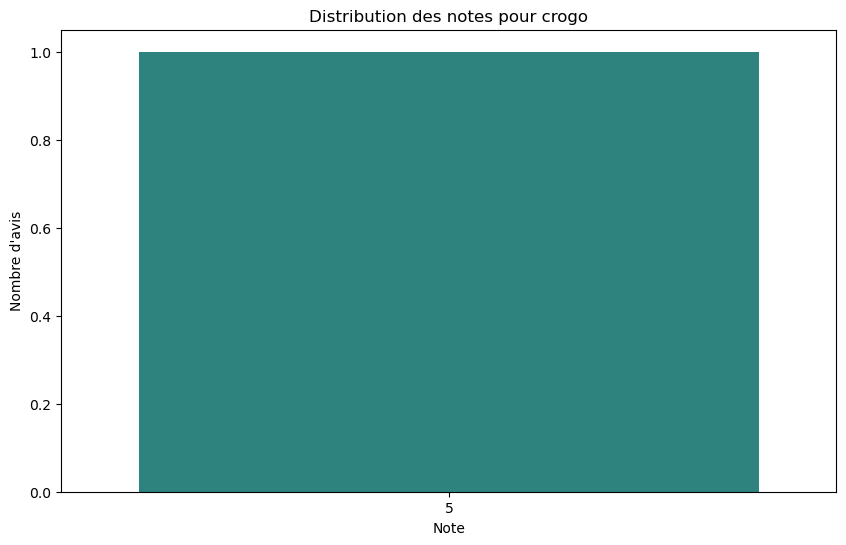

Analyse pour cros emballage:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


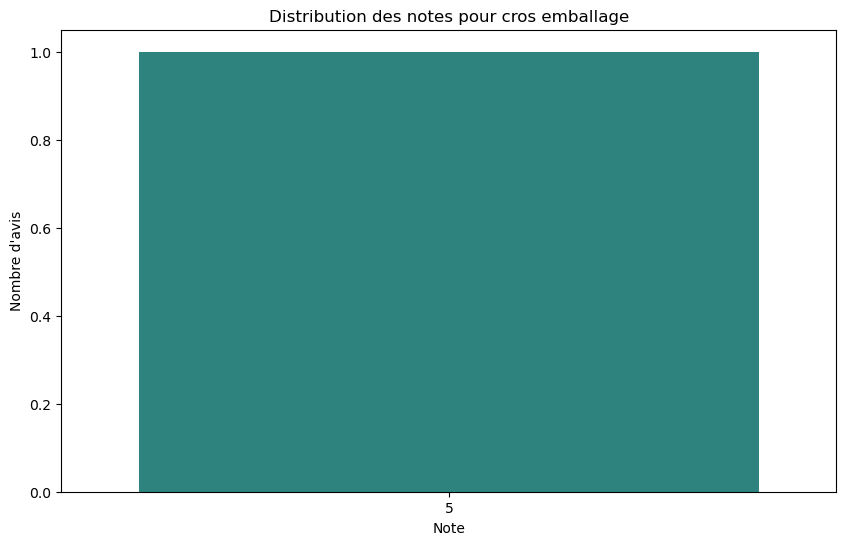

Analyse pour cubyn:
Nombre total d'avis: 9899


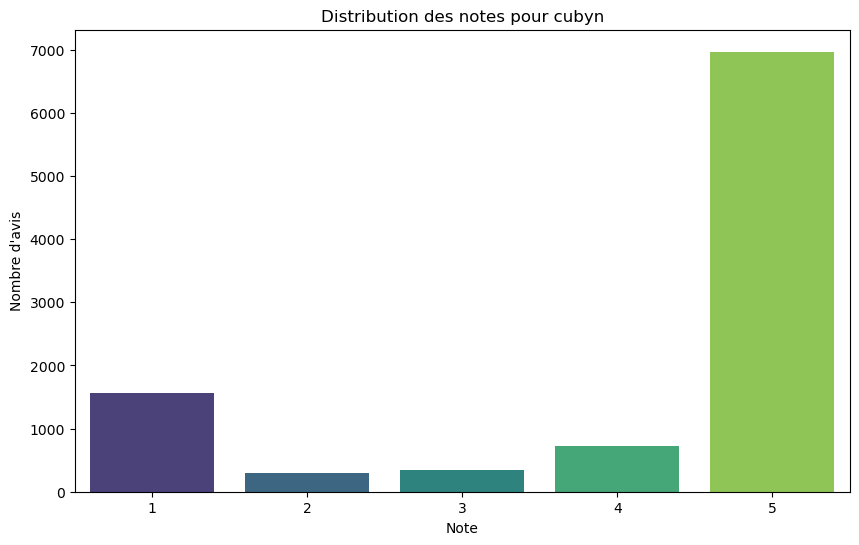

Analyse pour daklapack france:
Nombre total d'avis: 94


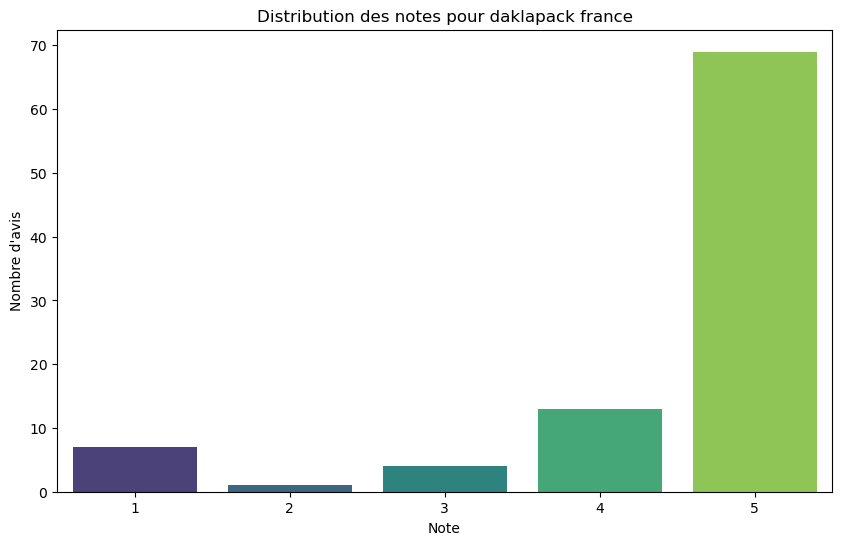

Analyse pour delight cbd:
Nombre total d'avis: 34


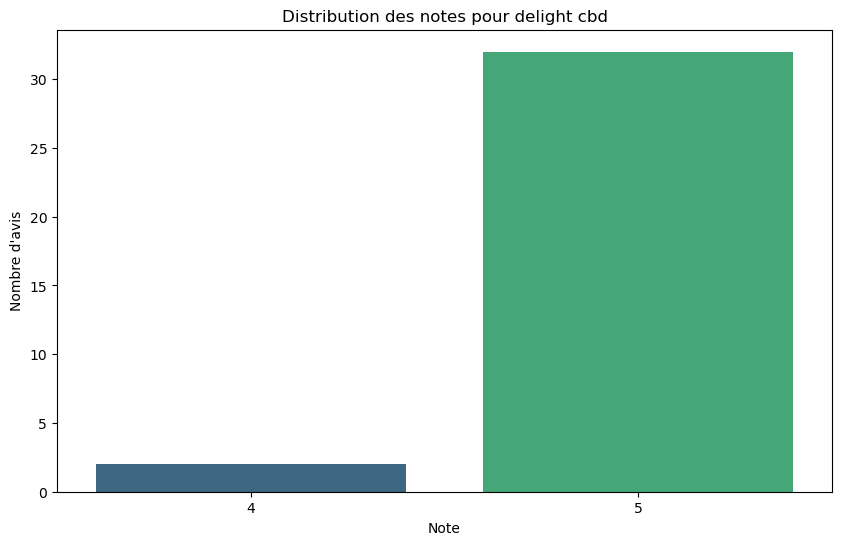

Analyse pour demeclic:
Nombre total d'avis: 1083


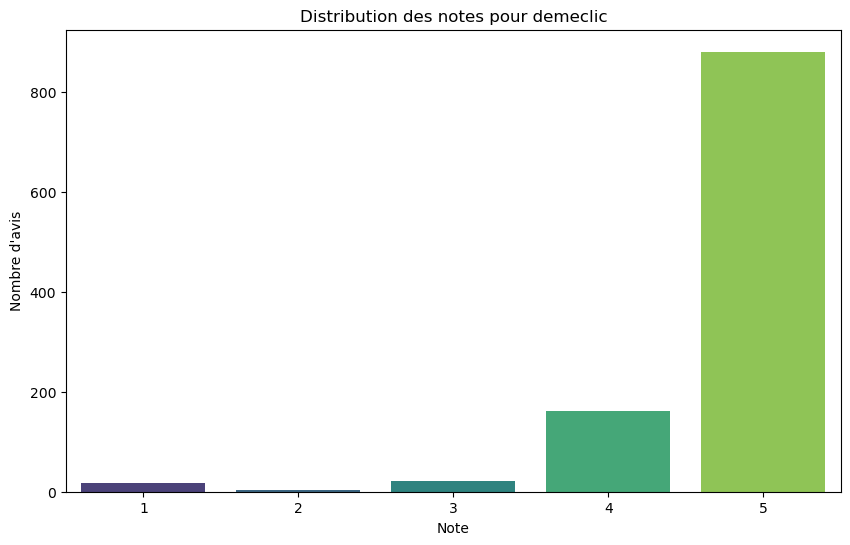

Analyse pour demeco horizon demenagement et garde- meuble:
Nombre total d'avis: 9


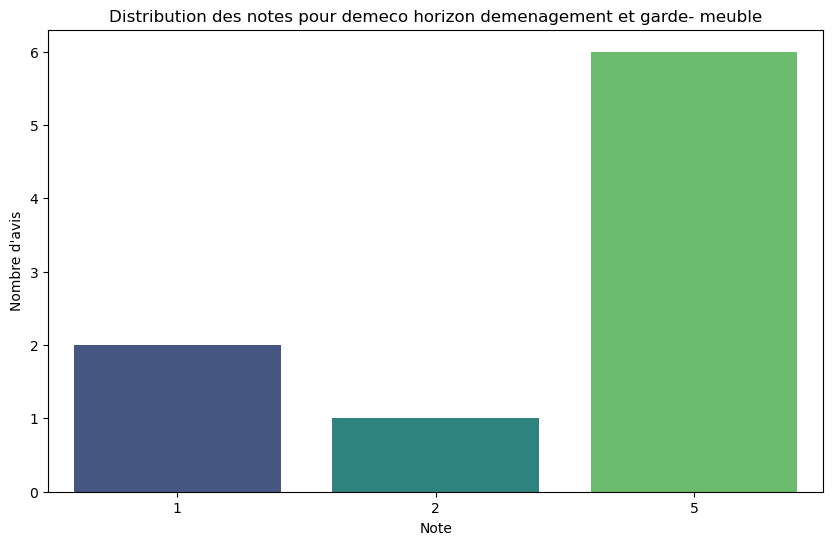

Analyse pour demenagement lefebvre:
Nombre total d'avis: 8


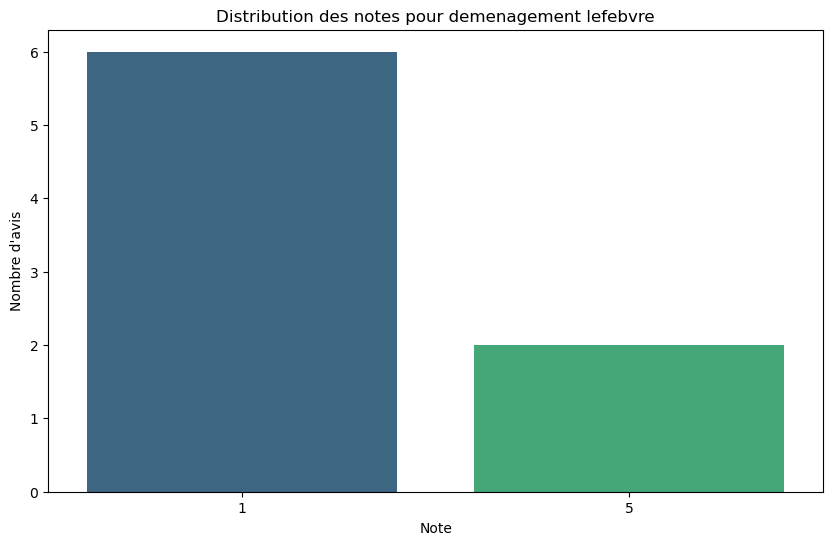

Analyse pour demenageur:
Nombre total d'avis: 137


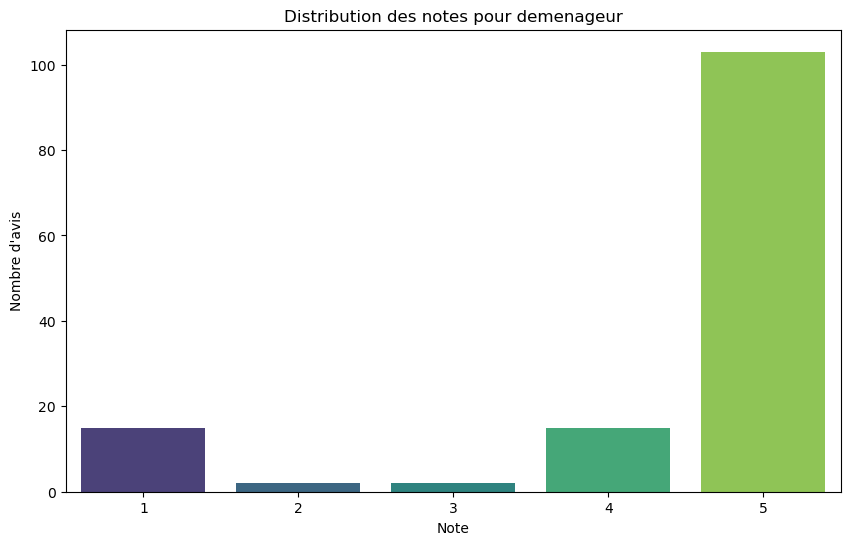

Analyse pour demepool:
Nombre total d'avis: 43


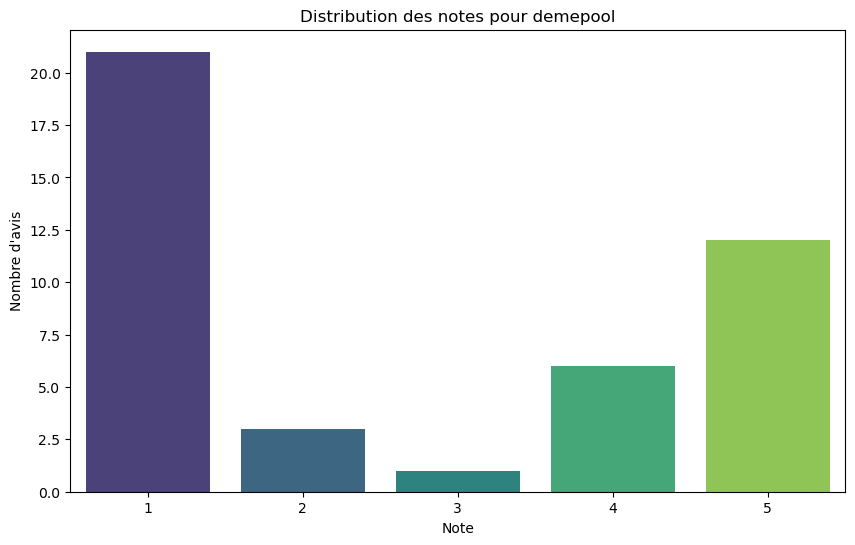

Analyse pour demtrans i2s:
Nombre total d'avis: 13


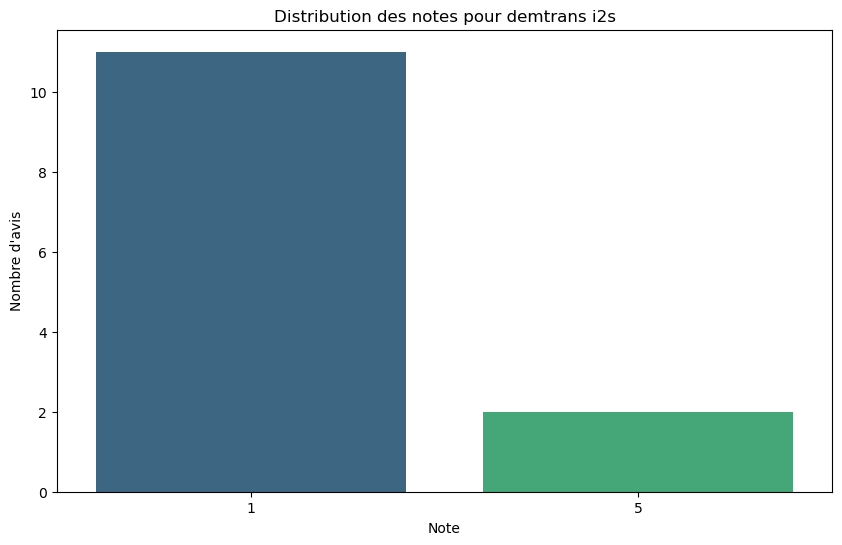

Analyse pour dhl:
Nombre total d'avis: 4014


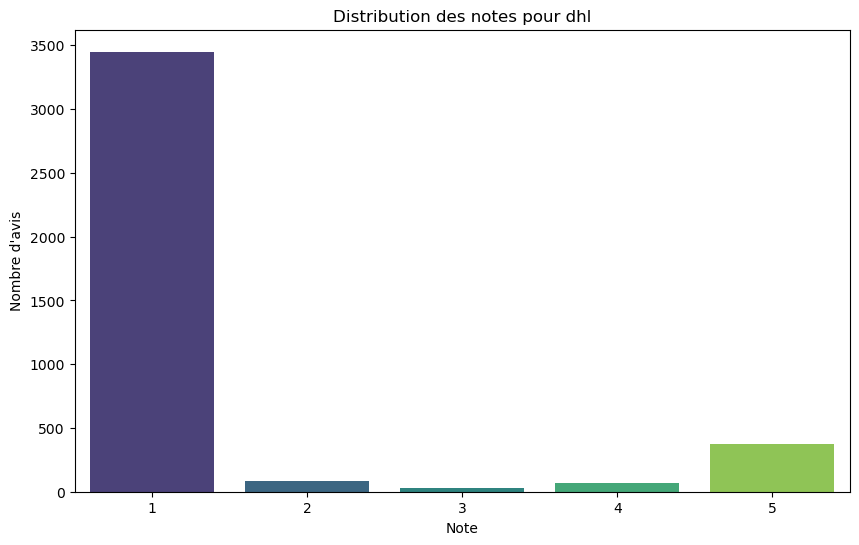

Analyse pour dpd:
Nombre total d'avis: 70804


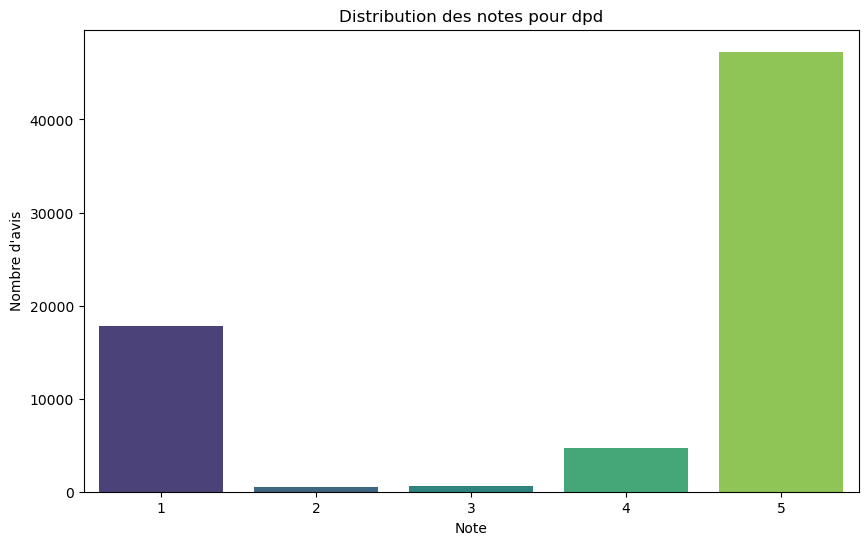

Analyse pour déménagement service:
Nombre total d'avis: 37


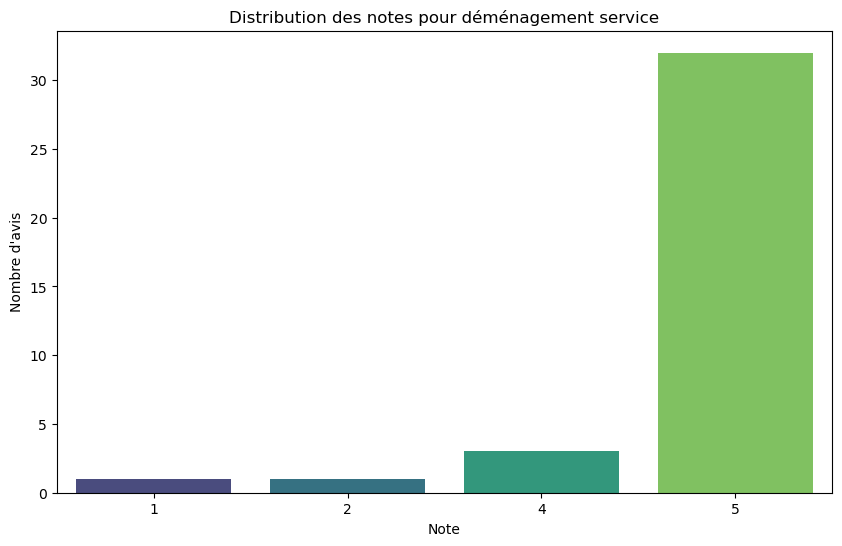

Analyse pour déménagementgabin:
Nombre total d'avis: 1341


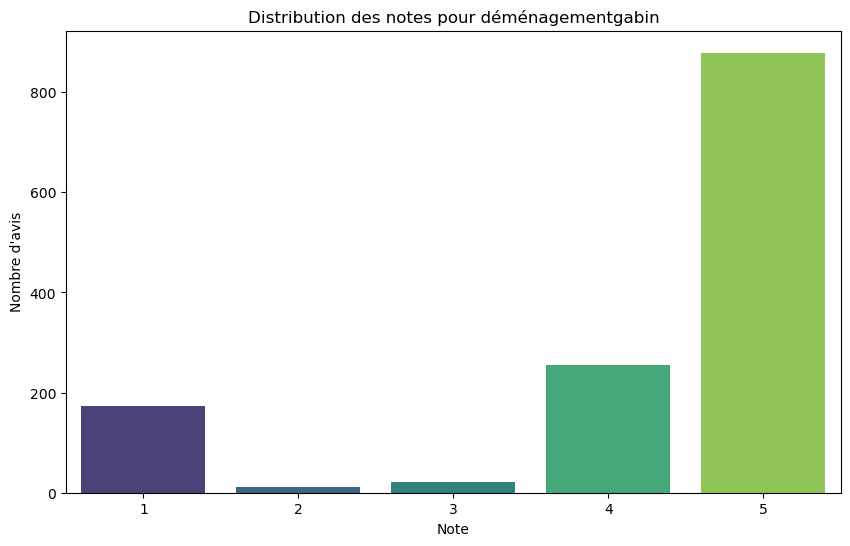

Analyse pour déménagements jézéquel:
Nombre total d'avis: 137


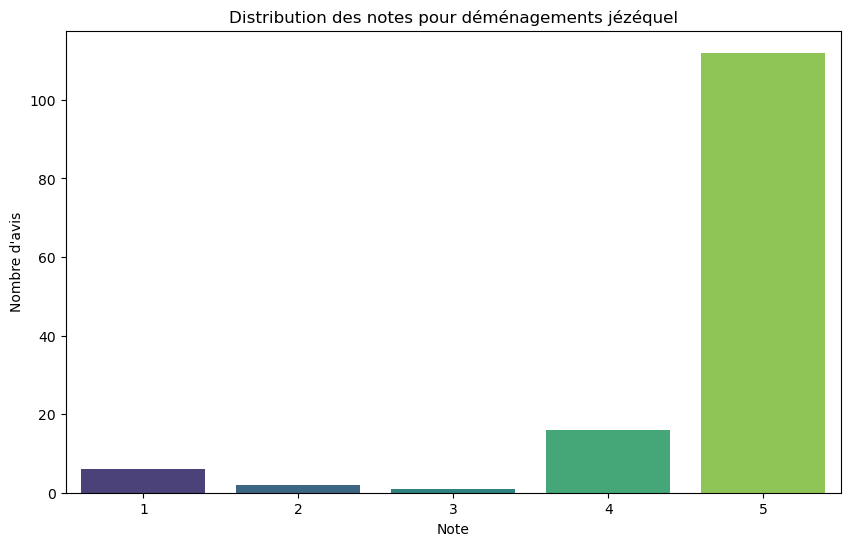

Analyse pour déménager malin:
Nombre total d'avis: 120


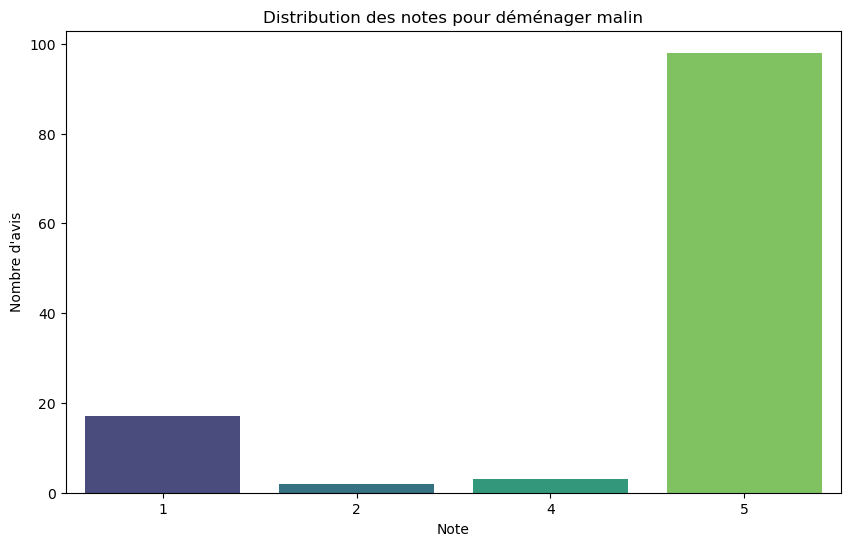

Analyse pour easy2go:
Nombre total d'avis: 5


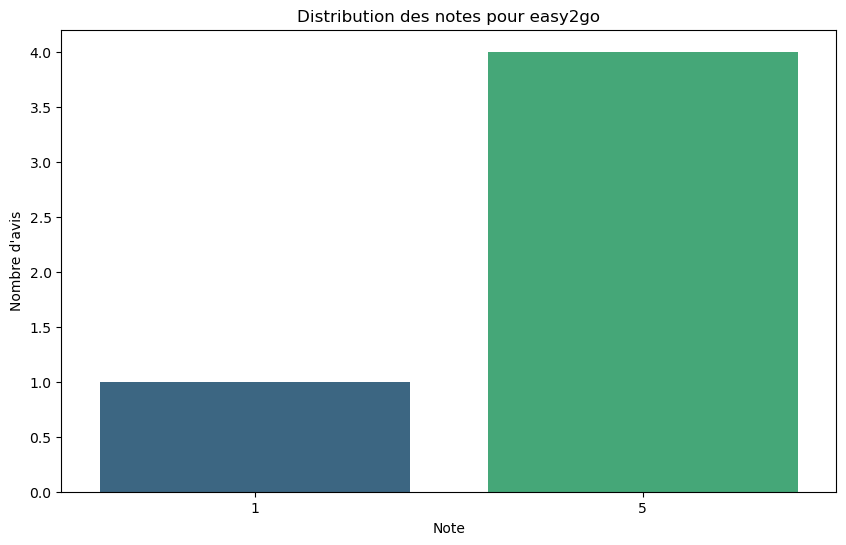

Analyse pour ecocarton:
Nombre total d'avis: 1996


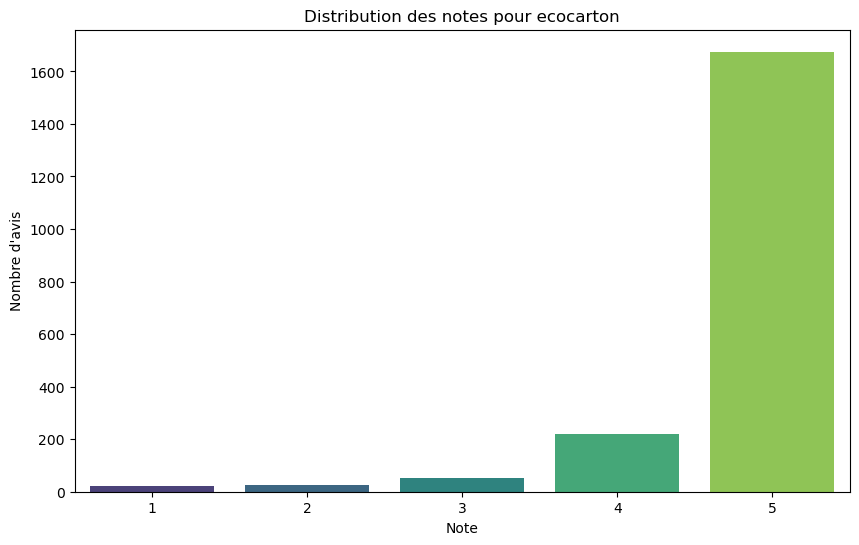

Analyse pour edilink:
Nombre total d'avis: 43


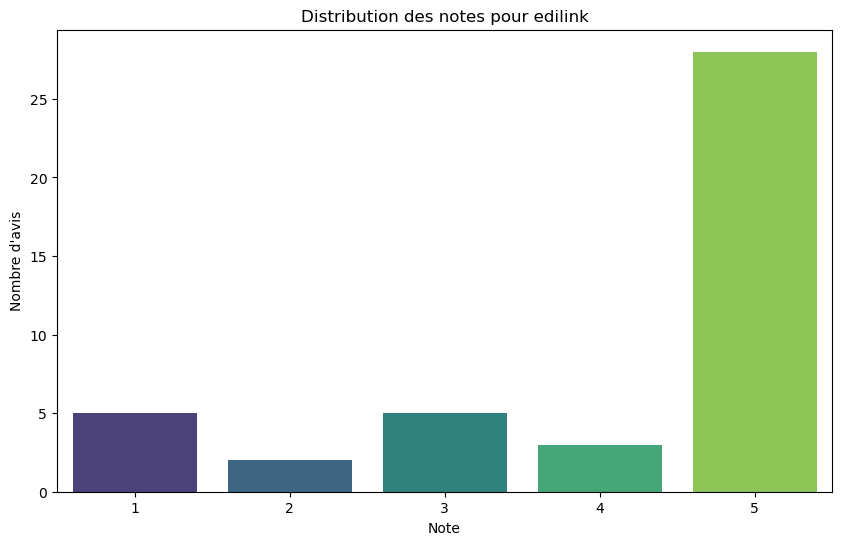

Analyse pour embaleo:
Nombre total d'avis: 40


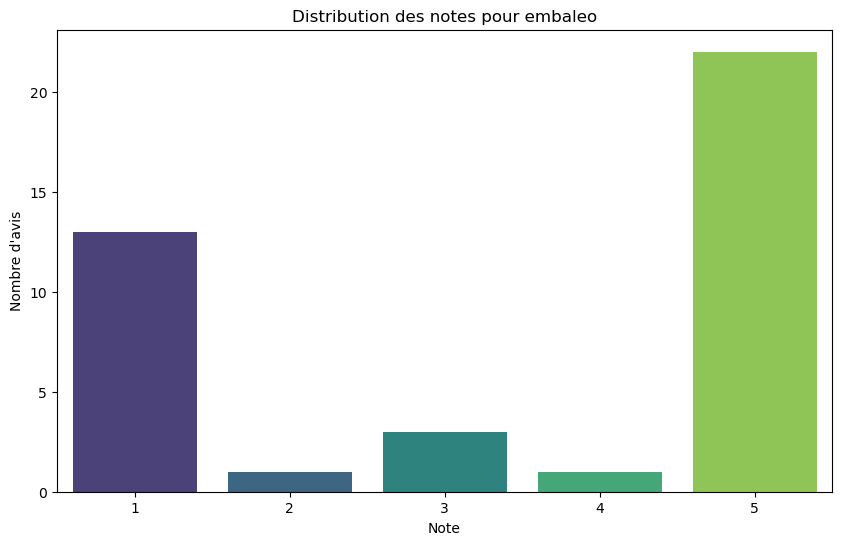

Analyse pour enveloppe-24:
Nombre total d'avis: 392


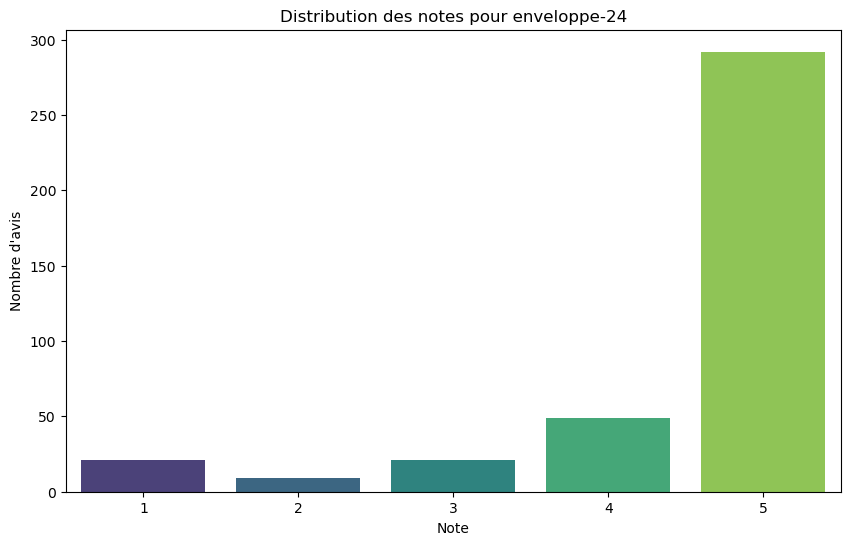

Analyse pour enveloppebulle:
Nombre total d'avis: 7


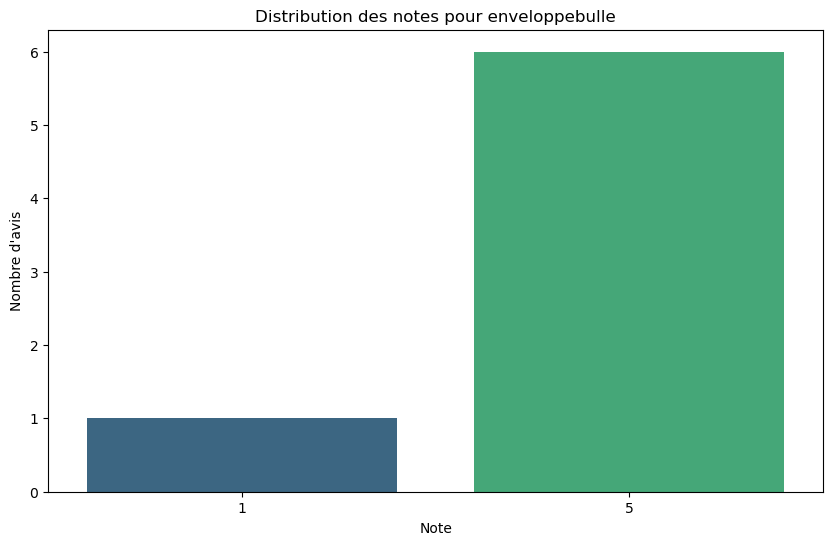

Analyse pour enveloppes france:
Nombre total d'avis: 3655


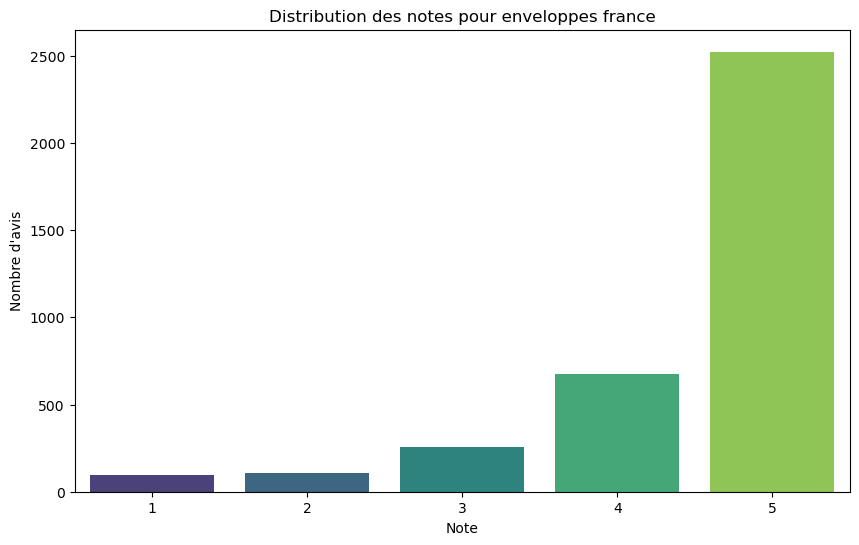

Analyse pour enveloppeshop:
Nombre total d'avis: 162


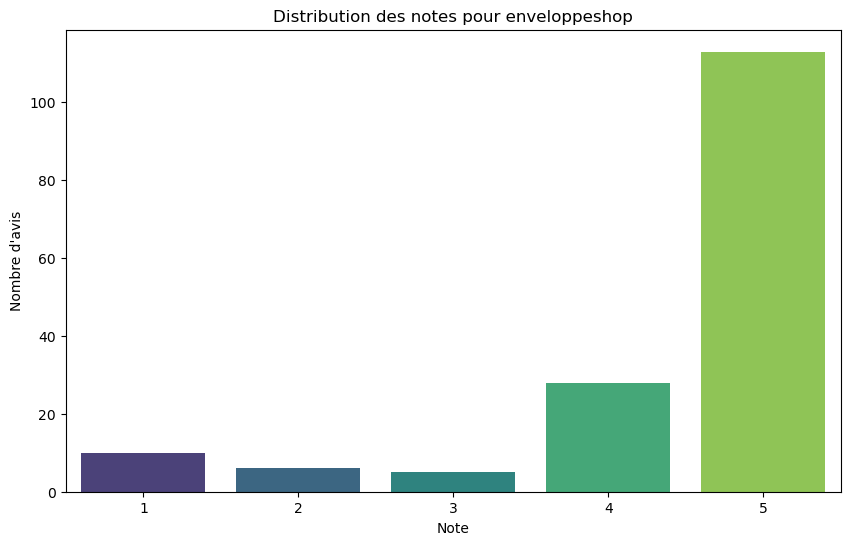

Analyse pour excello mobilis déménagement:
Nombre total d'avis: 32


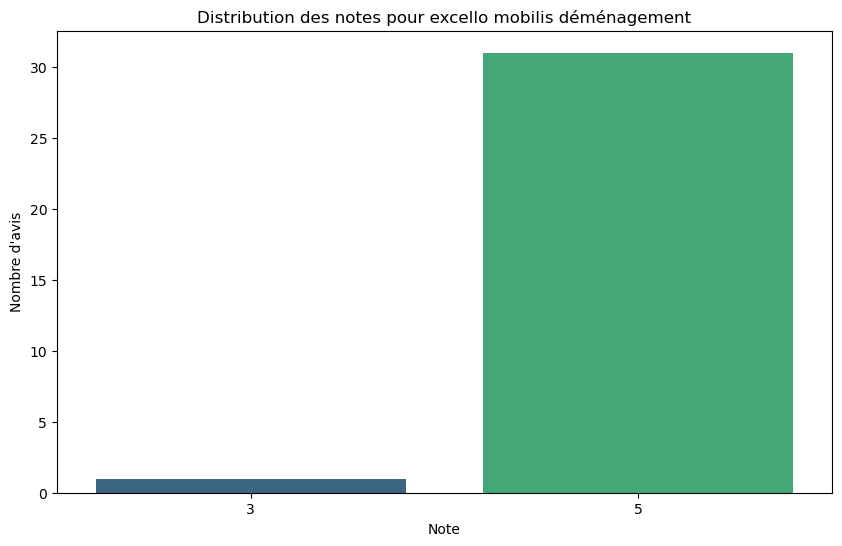

Analyse pour expedomtom:
Nombre total d'avis: 102


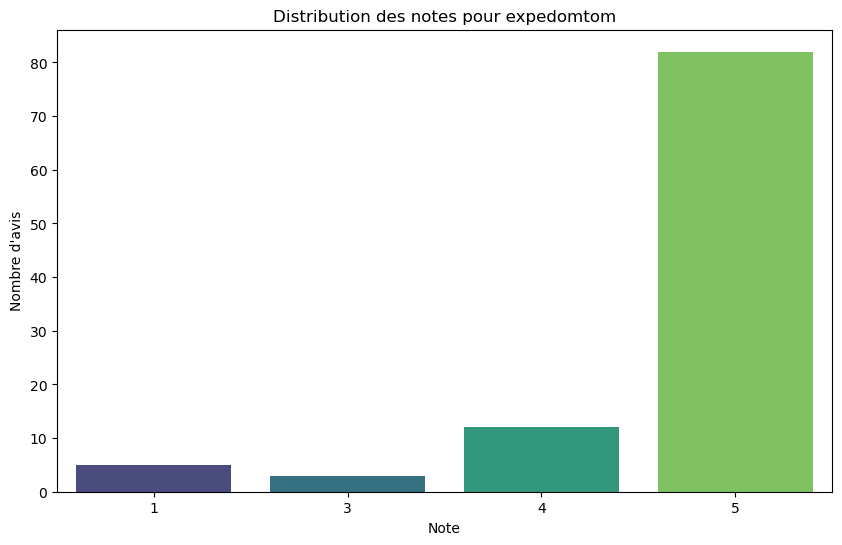

Analyse pour famileat:
Nombre total d'avis: 45


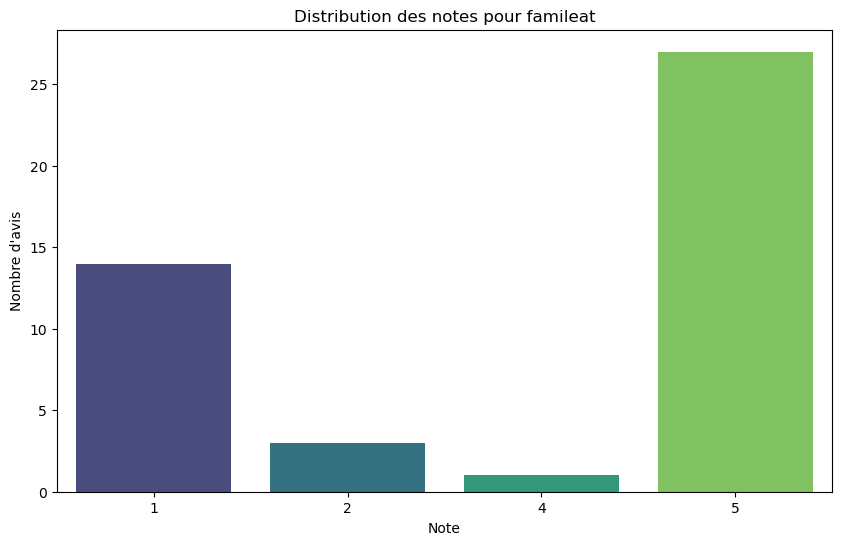

Analyse pour fastoche:
Nombre total d'avis: 6


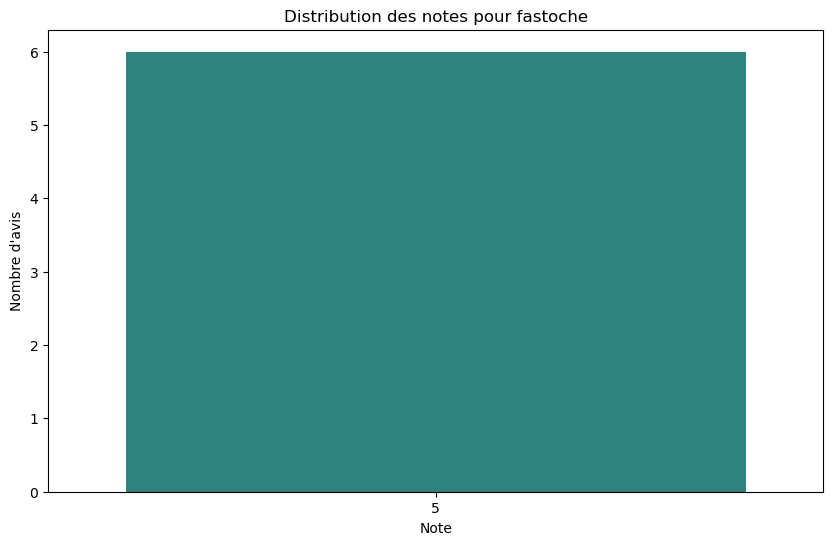

Analyse pour fideliv:
Nombre total d'avis: 5


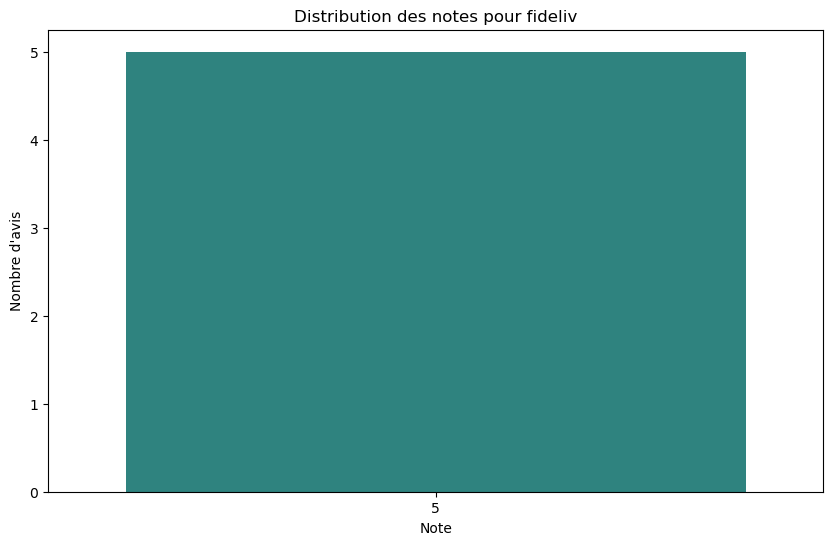

Analyse pour films-etirable:
Nombre total d'avis: 8


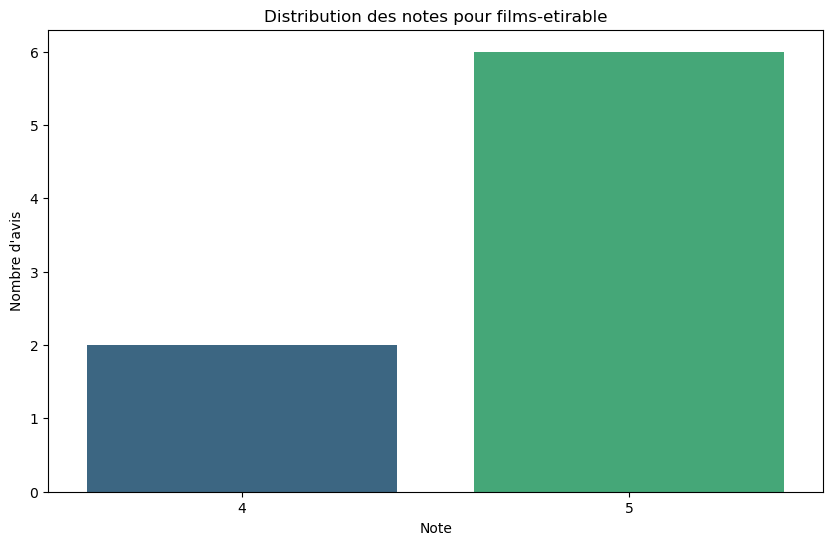

Analyse pour fraise:
Nombre total d'avis: 23


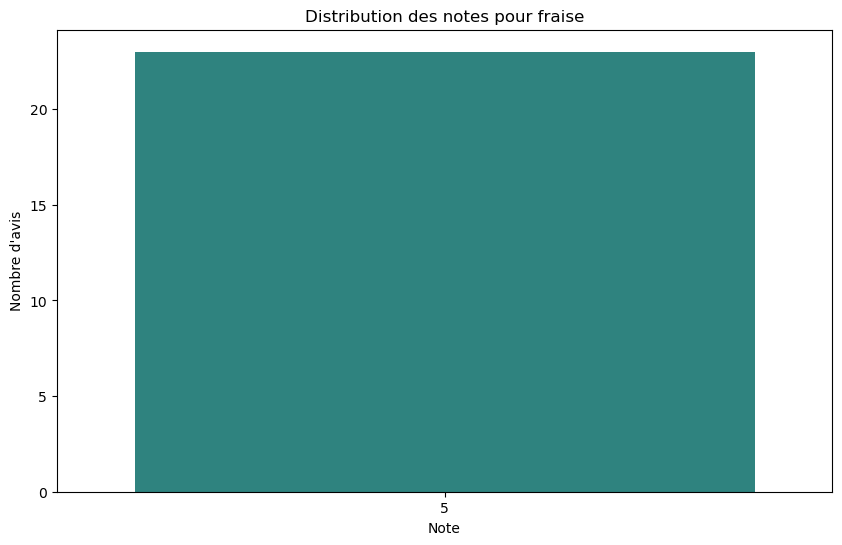

Analyse pour fretbay:
Nombre total d'avis: 5025


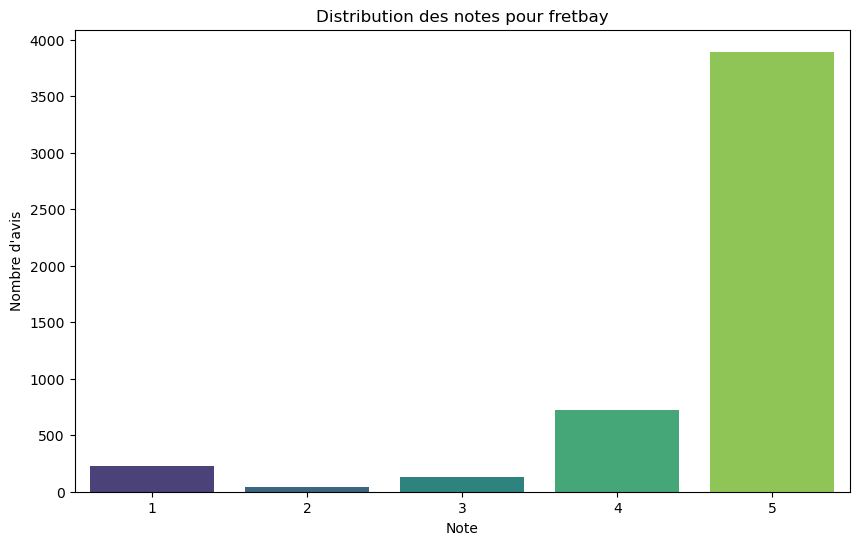

Analyse pour frichti:
Nombre total d'avis: 288


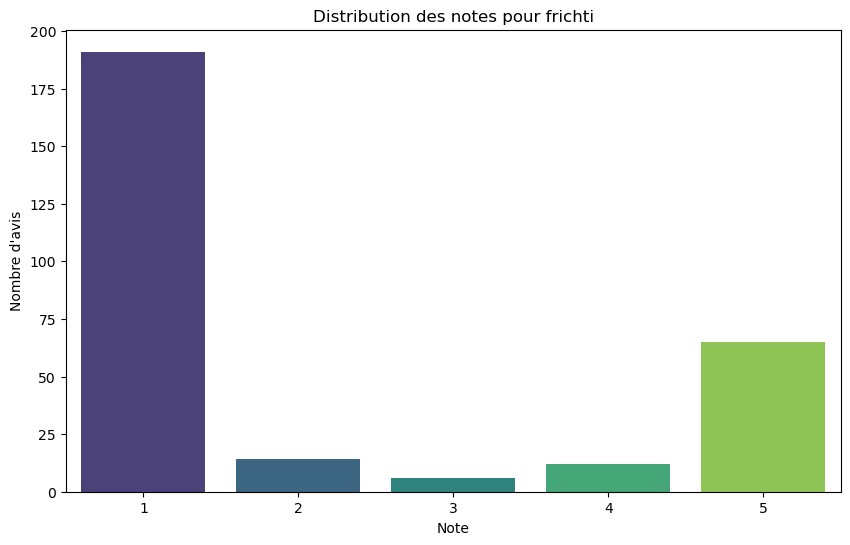

Analyse pour futurlog - logistique e-commerce:
Nombre total d'avis: 33


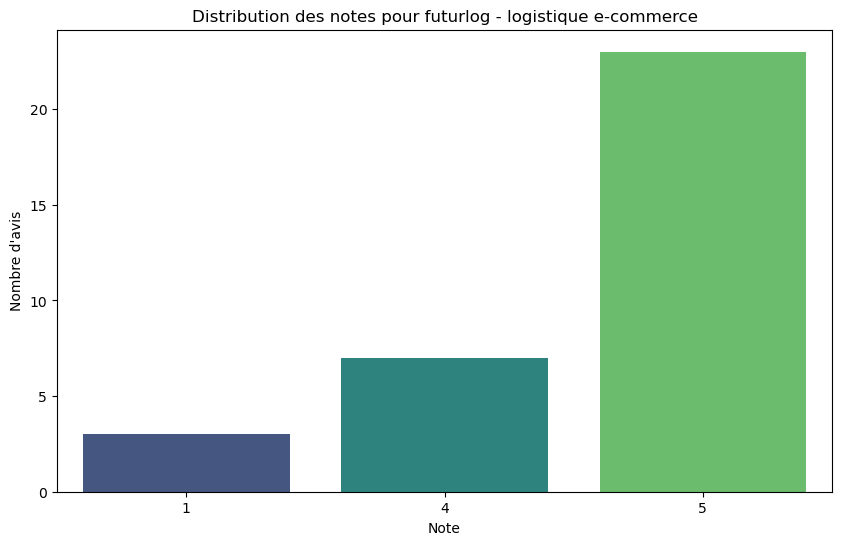

Analyse pour gls france:
Nombre total d'avis: 2203


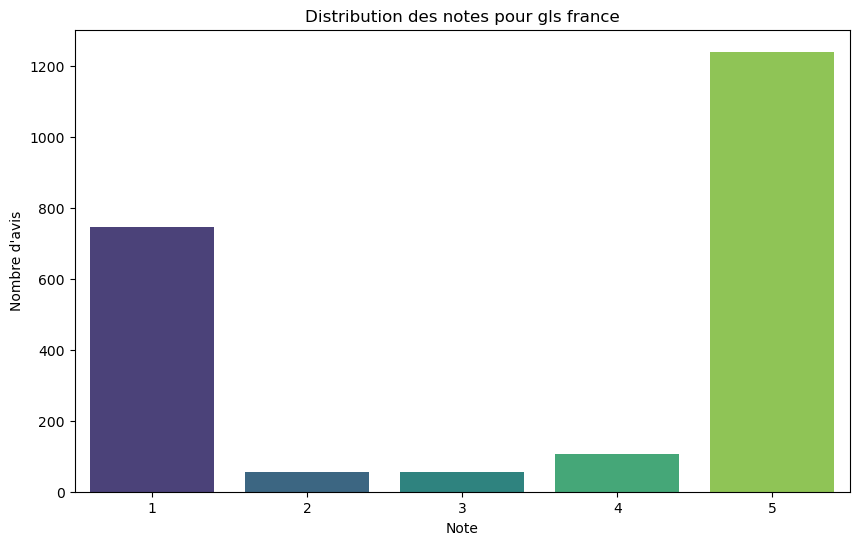

Analyse pour go pilot:
Nombre total d'avis: 2


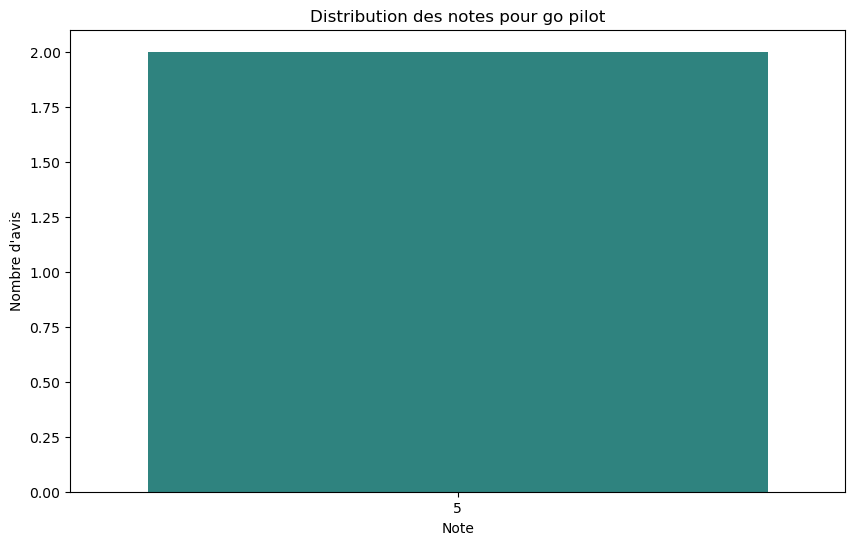

Analyse pour green kartel:
Nombre total d'avis: 99


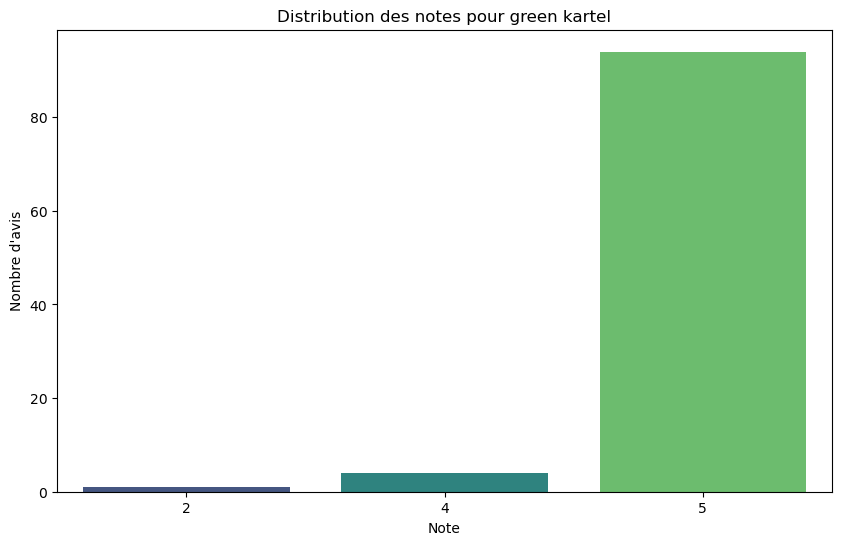

Analyse pour h2m logistique:
Nombre total d'avis: 7


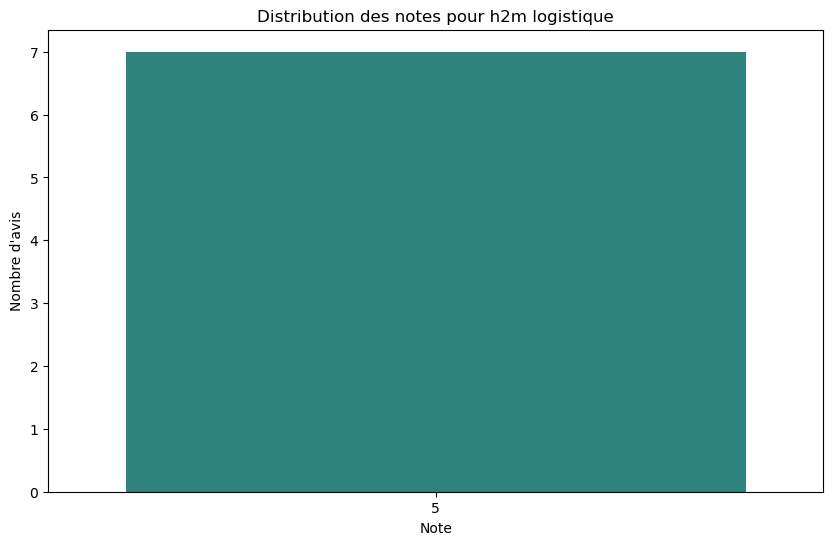

Analyse pour happy-post:
Nombre total d'avis: 2576


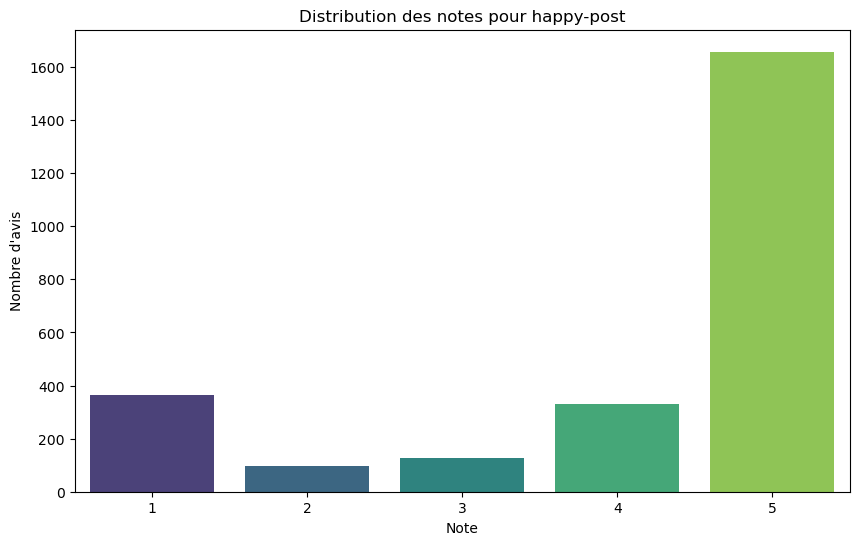

Analyse pour hoplunch:
Nombre total d'avis: 129


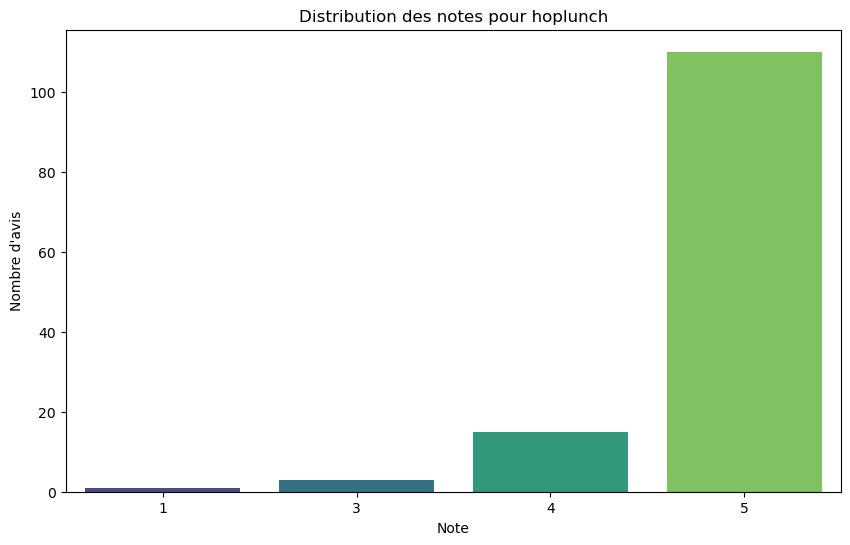

Analyse pour ht air:
Nombre total d'avis: 2


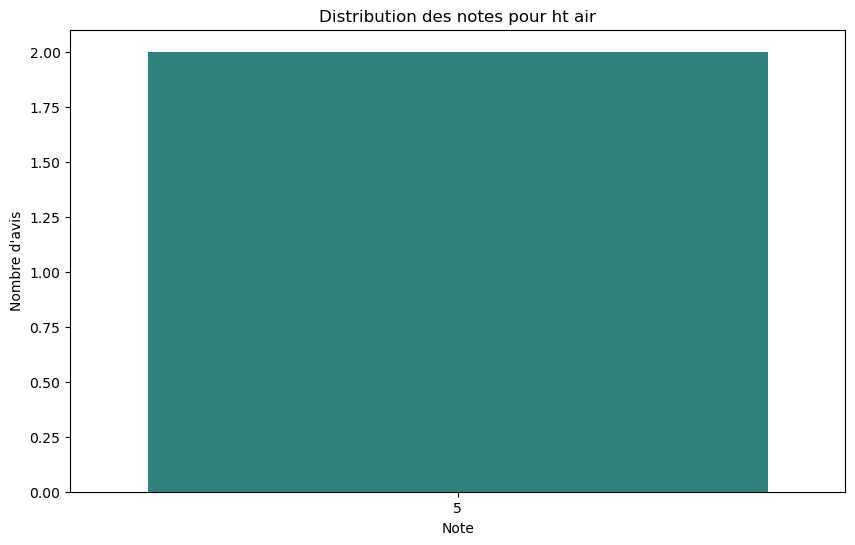

Analyse pour jenlevejelivre:
Nombre total d'avis: 18


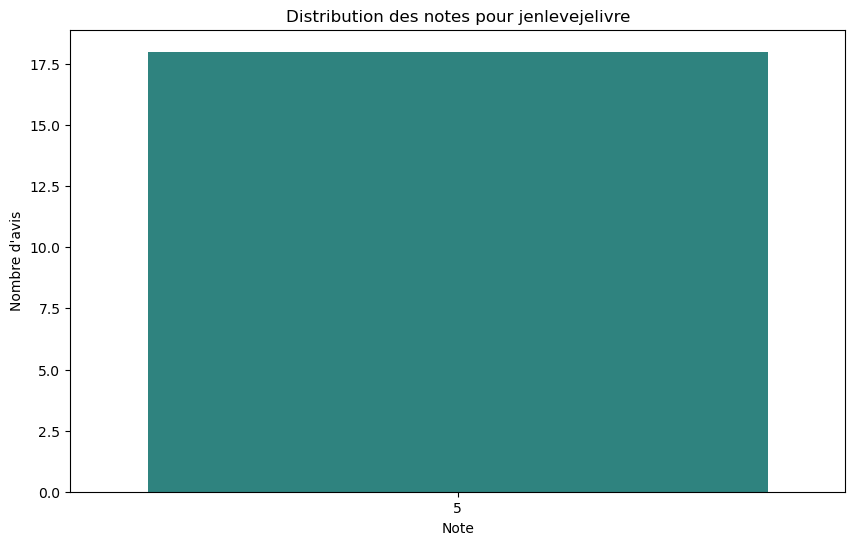

Analyse pour kingbox:
Nombre total d'avis: 170


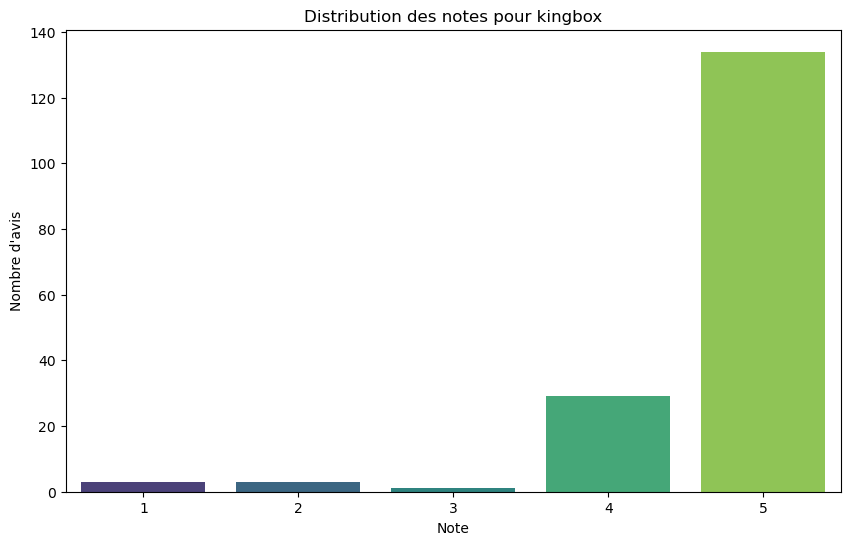

Analyse pour koulier:
Nombre total d'avis: 2


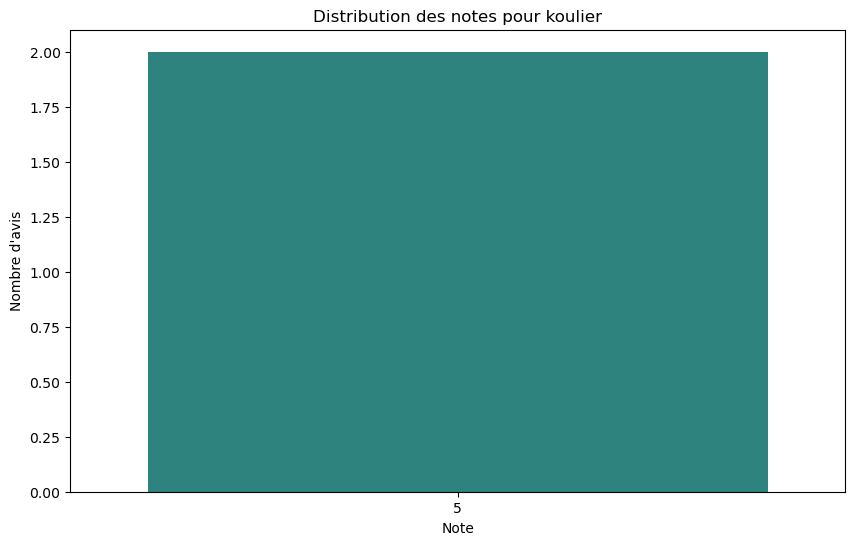

Analyse pour l'officiel du déménagement:
Nombre total d'avis: 3686


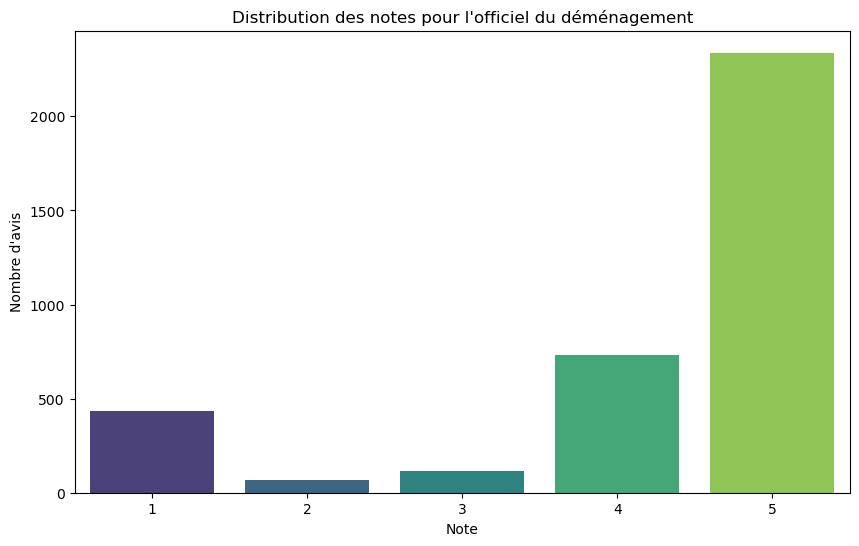

Analyse pour la bigbox:
Nombre total d'avis: 3


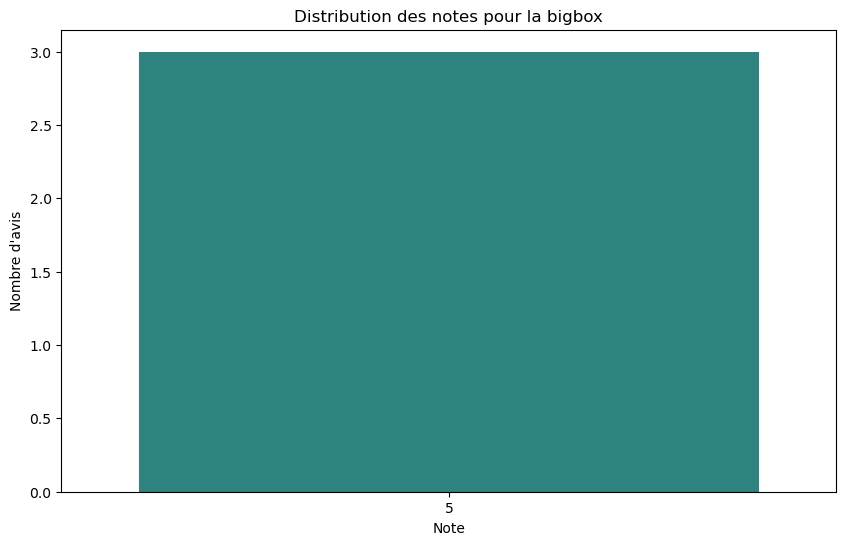

Analyse pour la poste:
Nombre total d'avis: 8420


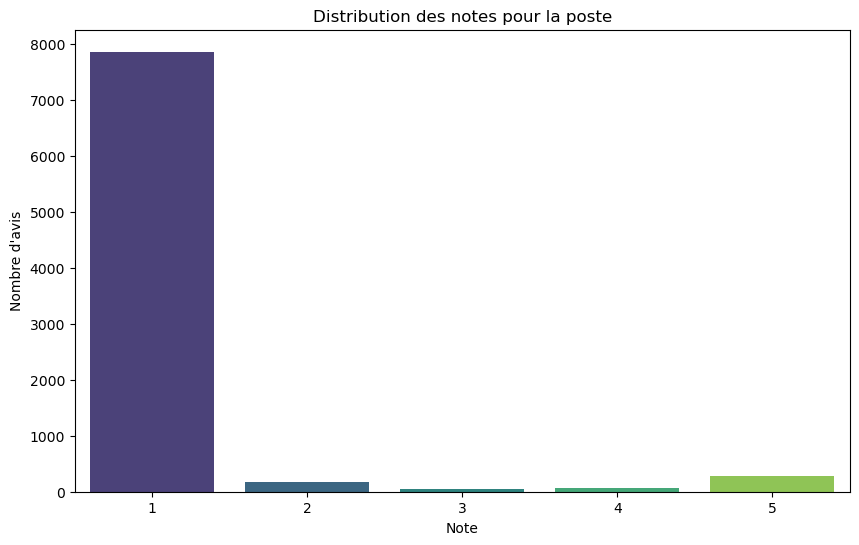

Analyse pour la tournée:
Nombre total d'avis: 437


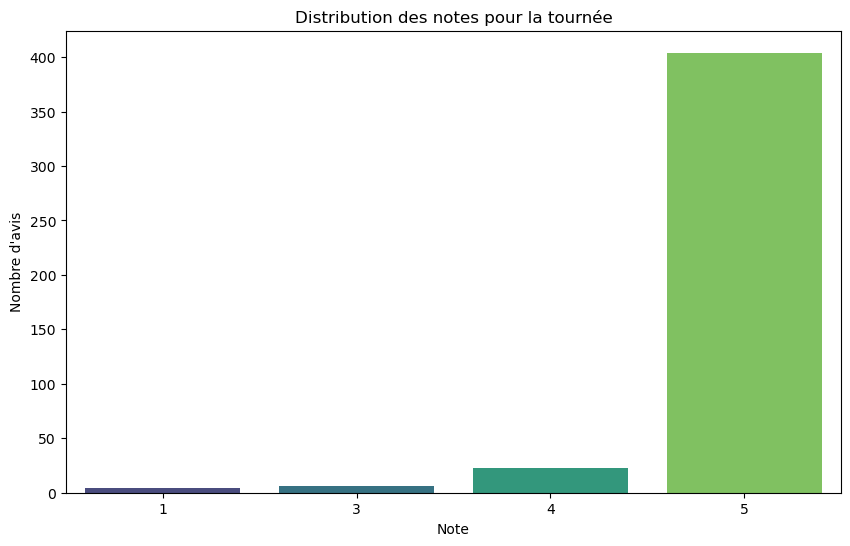

Analyse pour la tribu du carton:
Nombre total d'avis: 4692


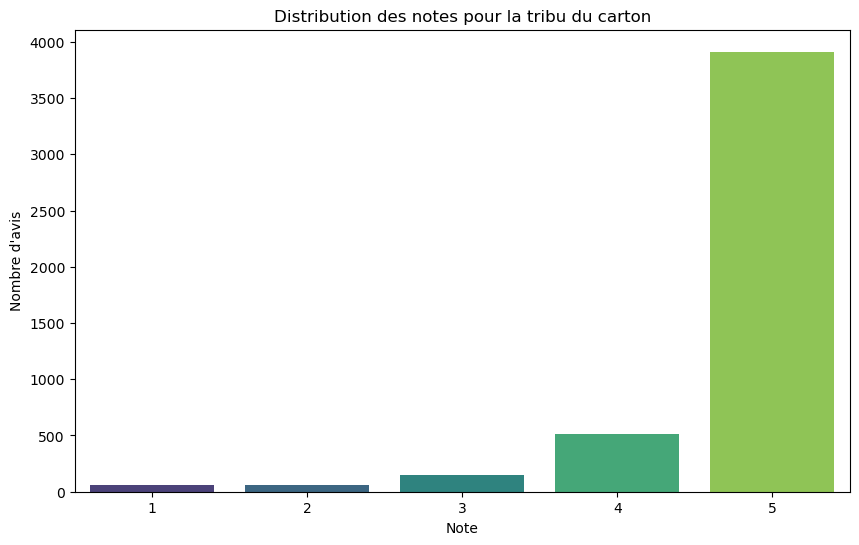

Analyse pour lacaisserie:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


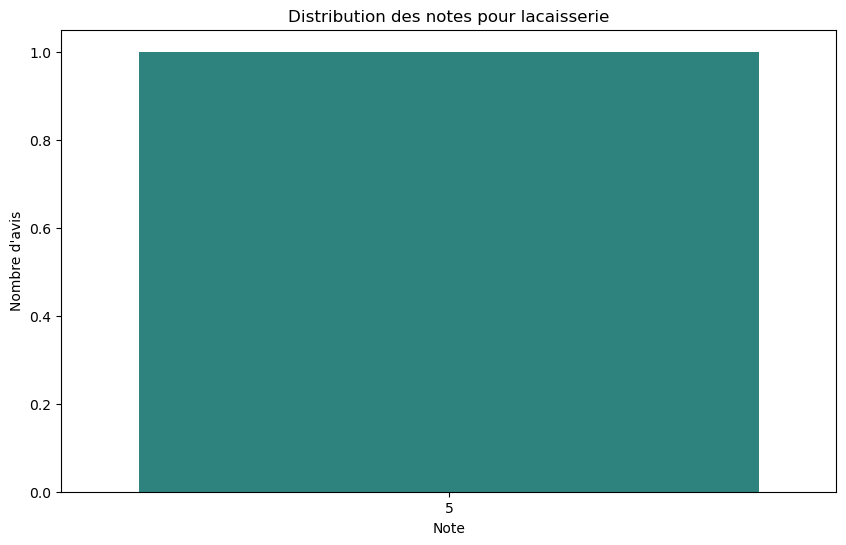

Analyse pour les ateliers du sac:
Nombre total d'avis: 4


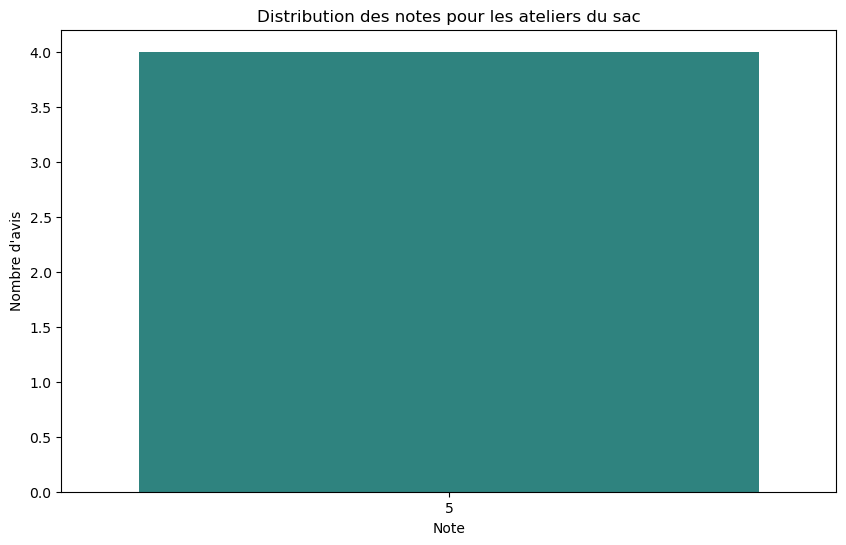

Analyse pour les déménageurs bretons:
Nombre total d'avis: 10036


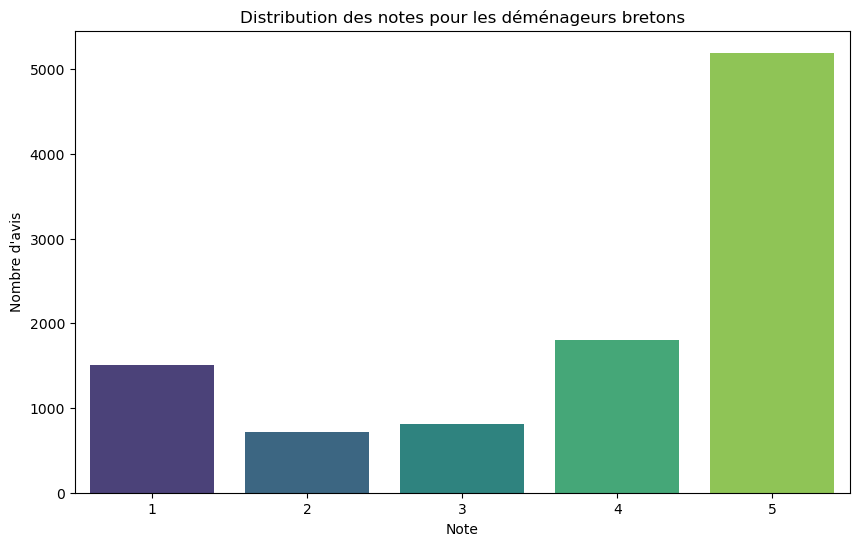

Analyse pour lessaveursdenoemie:
Nombre total d'avis: 65


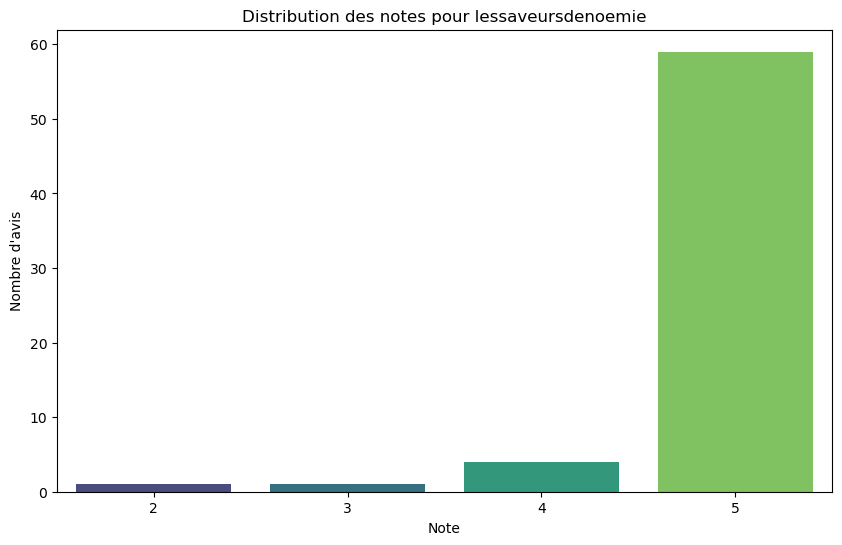

Analyse pour lettre24:
Nombre total d'avis: 277


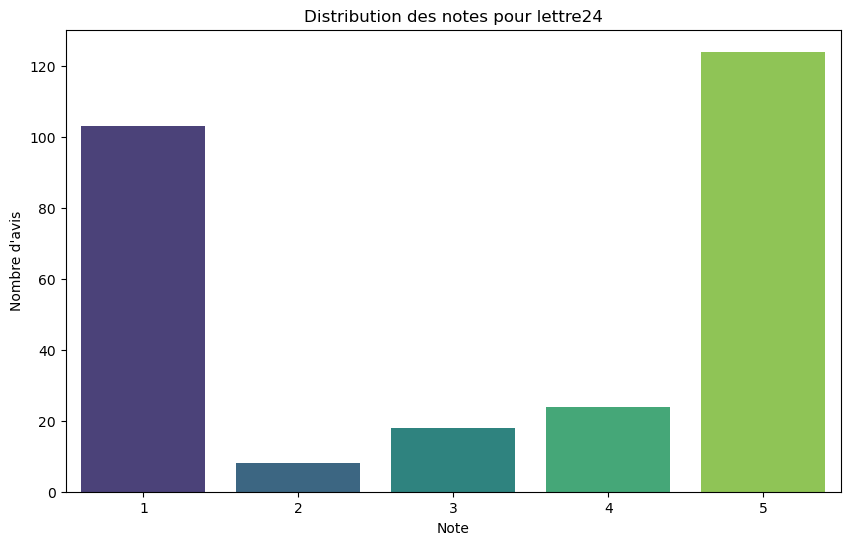

Analyse pour limited resell:
Nombre total d'avis: 239


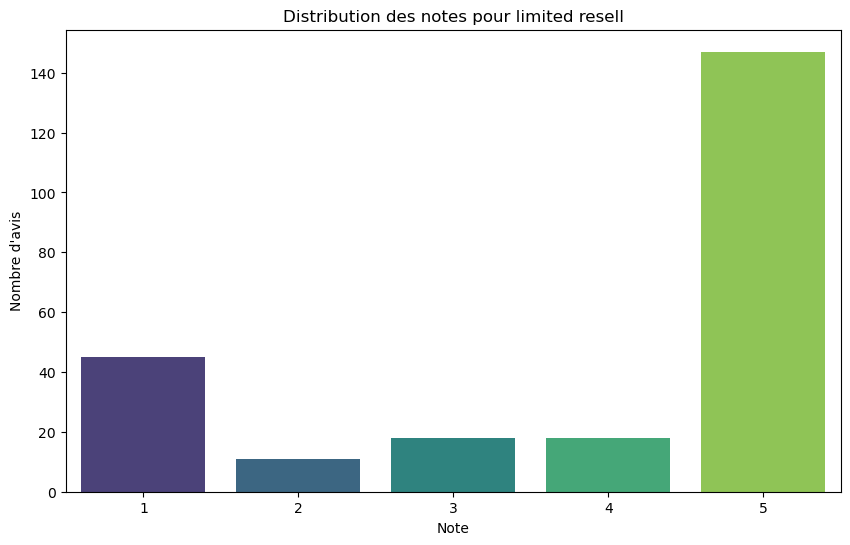

Analyse pour livraisonadomicile07:
Nombre total d'avis: 8


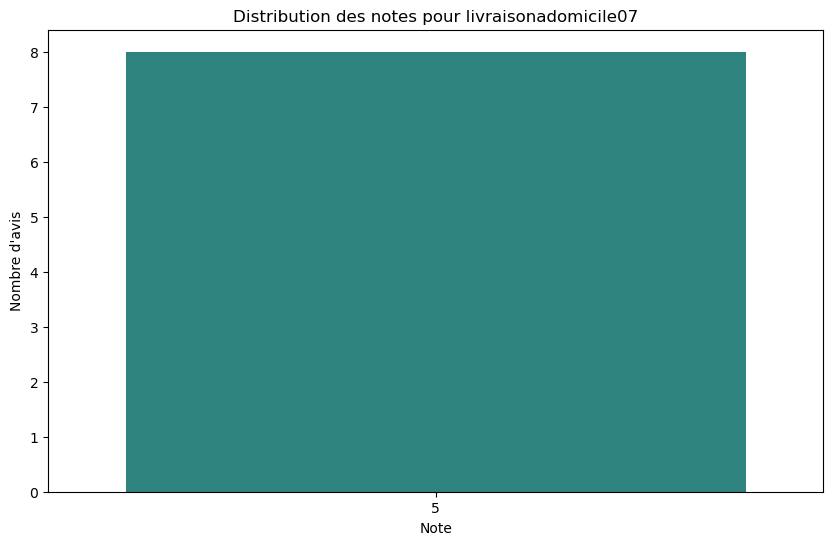

Analyse pour livreatonvoisin:
Nombre total d'avis: 7


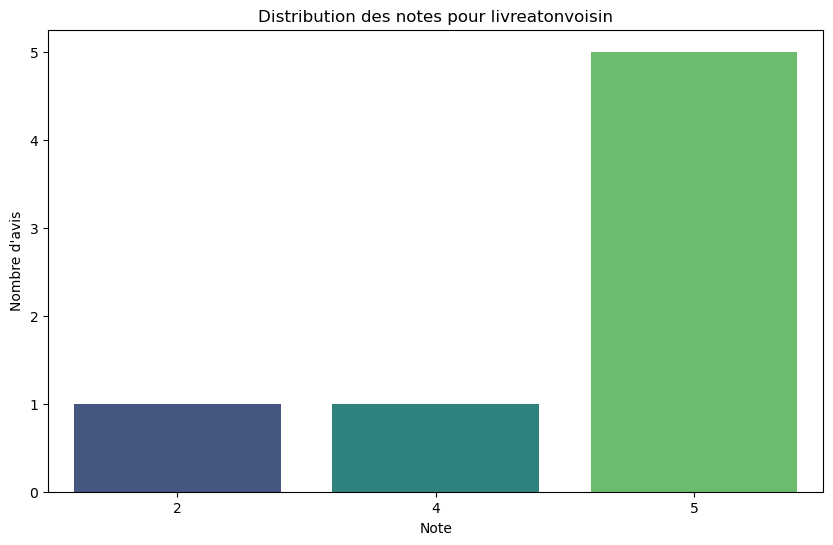

Analyse pour locabox:
Nombre total d'avis: 7034


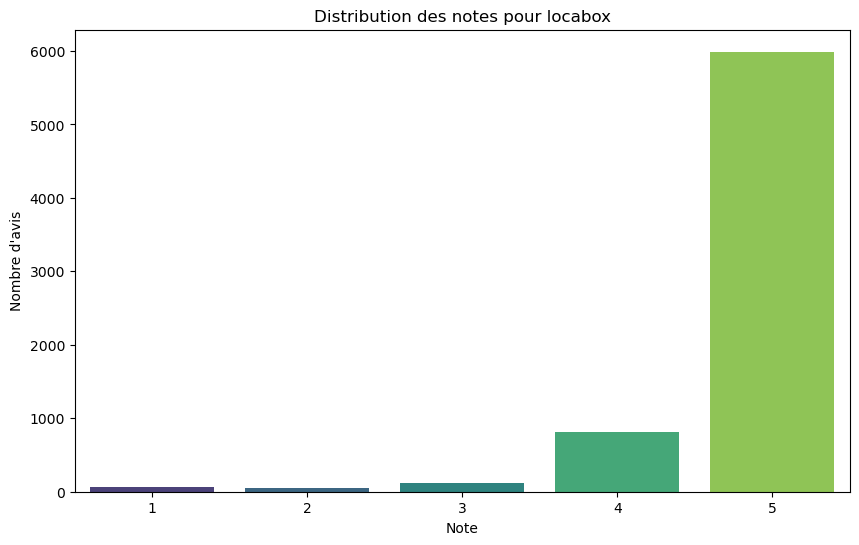

Analyse pour lockall:
Nombre total d'avis: 142


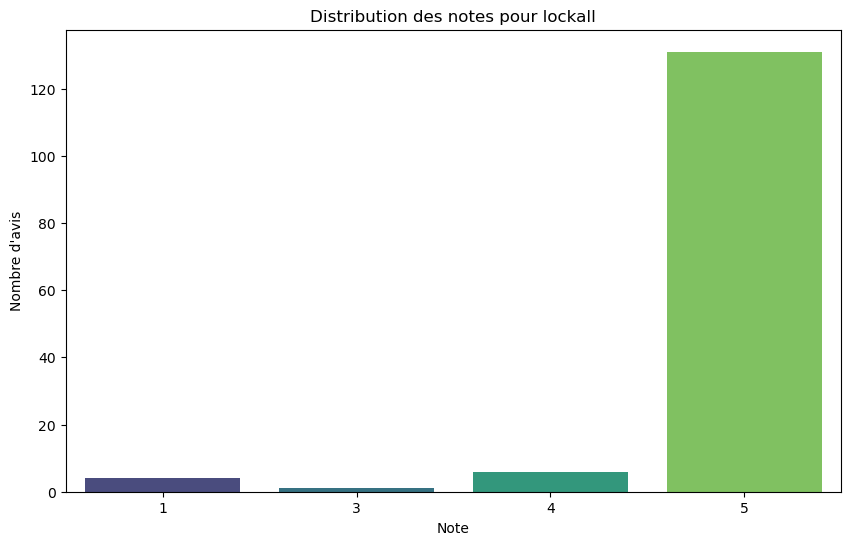

Analyse pour logist:
Nombre total d'avis: 3


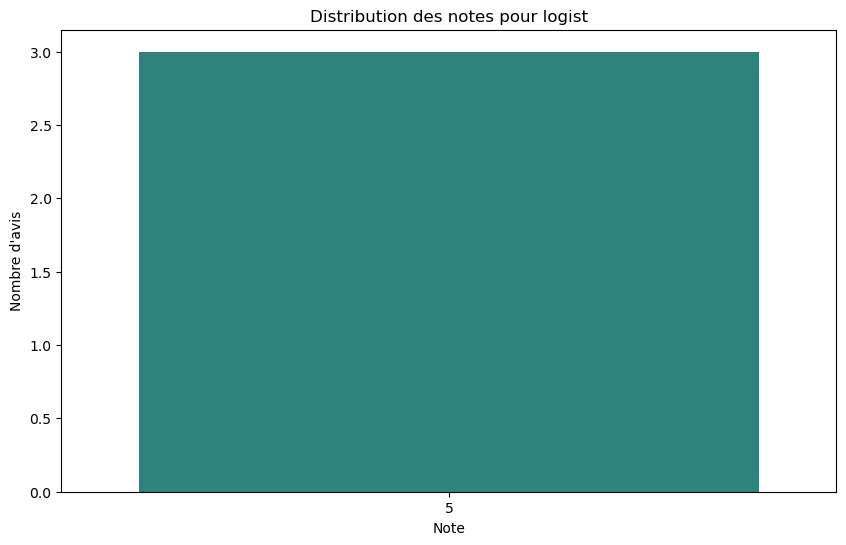

Analyse pour loubox:
Nombre total d'avis: 4


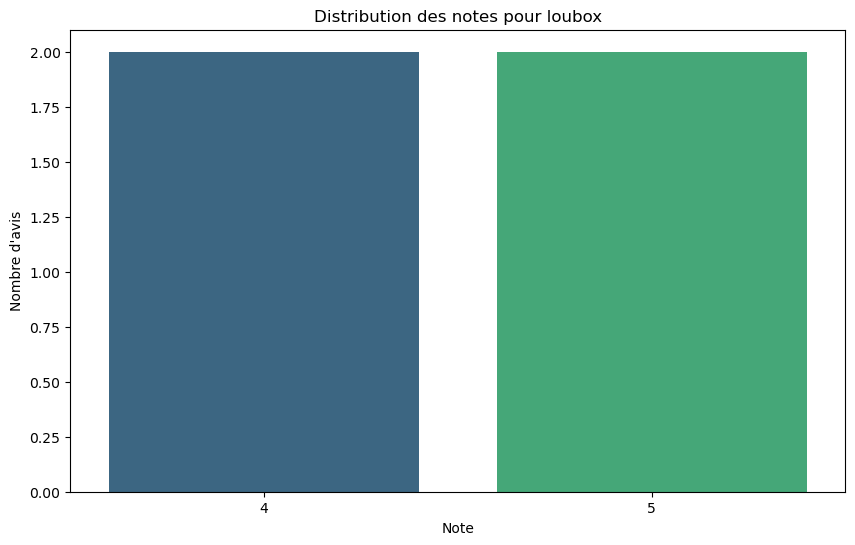

Analyse pour louez demenagez:
Nombre total d'avis: 52


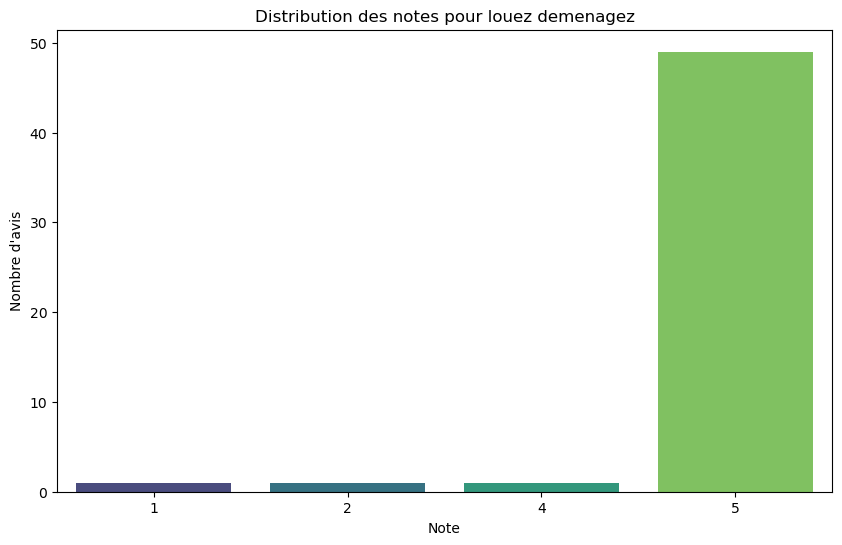

Analyse pour lyveat:
Nombre total d'avis: 239


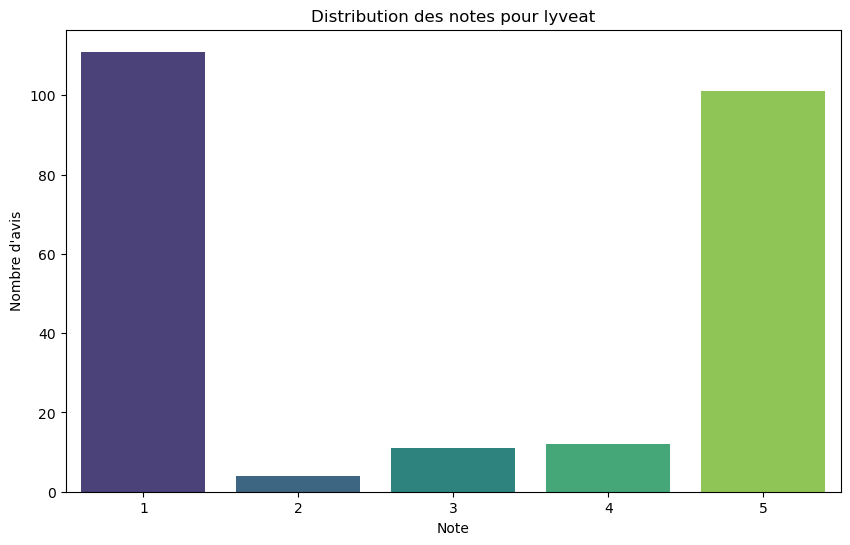

Analyse pour mail boxes etc. france:
Nombre total d'avis: 111


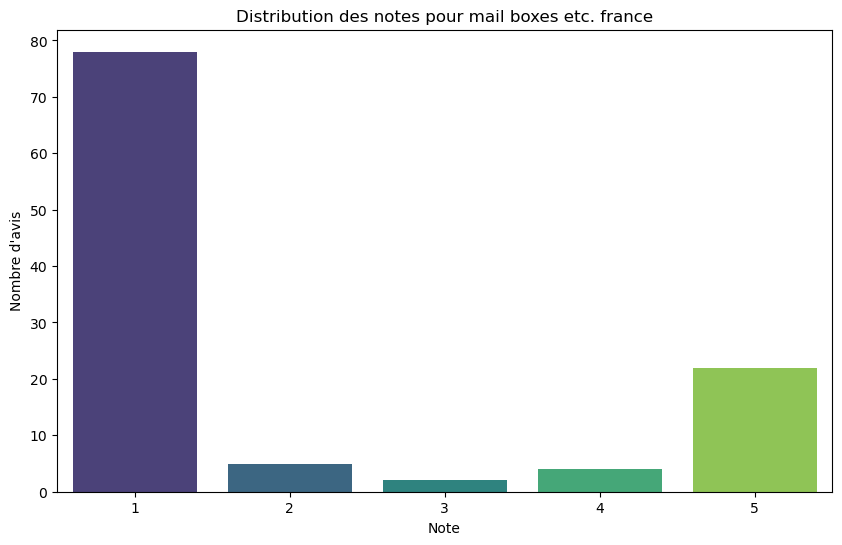

Analyse pour maison cocktail:
Nombre total d'avis: 13


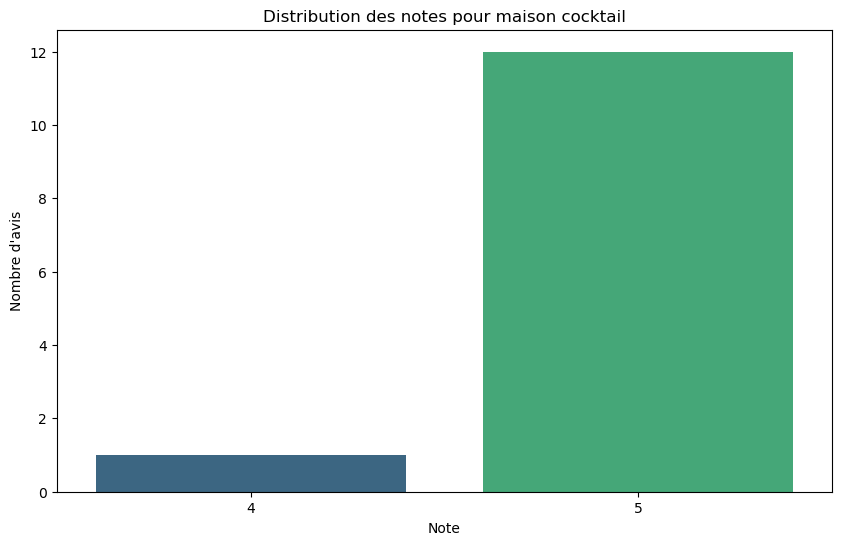

Analyse pour marne transdem:
Nombre total d'avis: 4


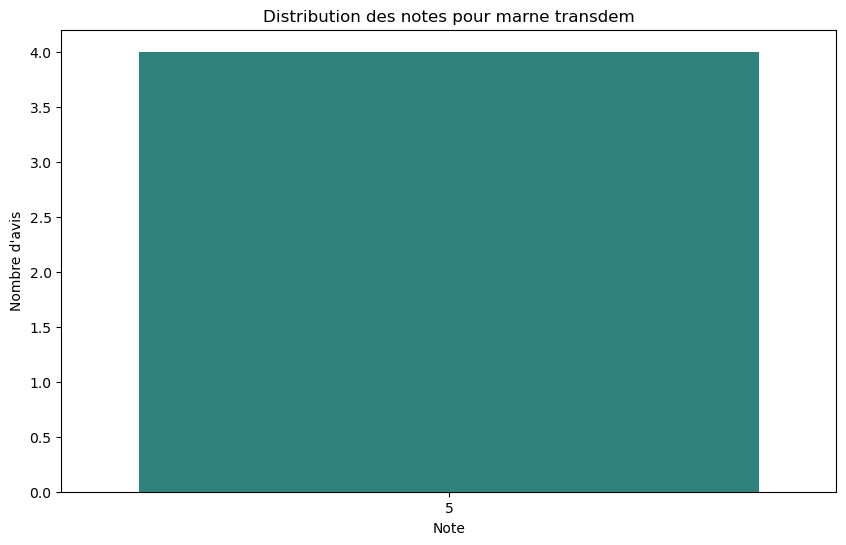

Analyse pour mcraylet:
Nombre total d'avis: 5


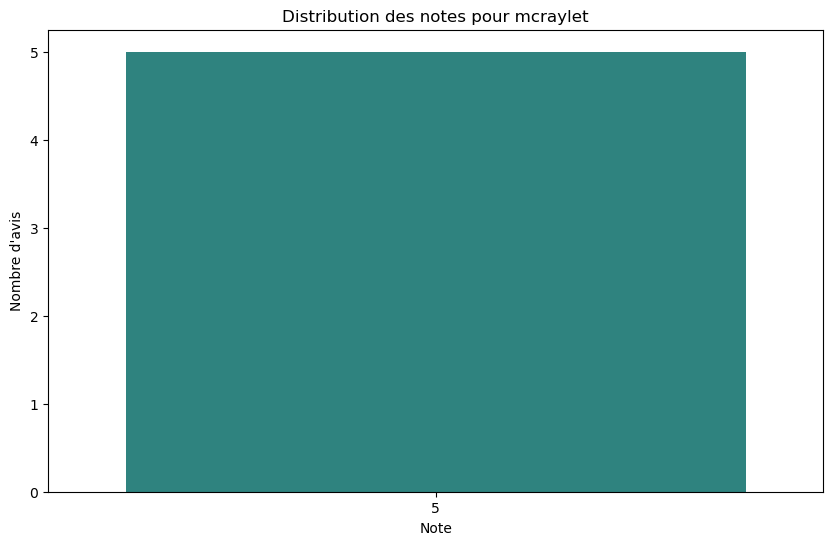

Analyse pour merci facteur:
Nombre total d'avis: 2233


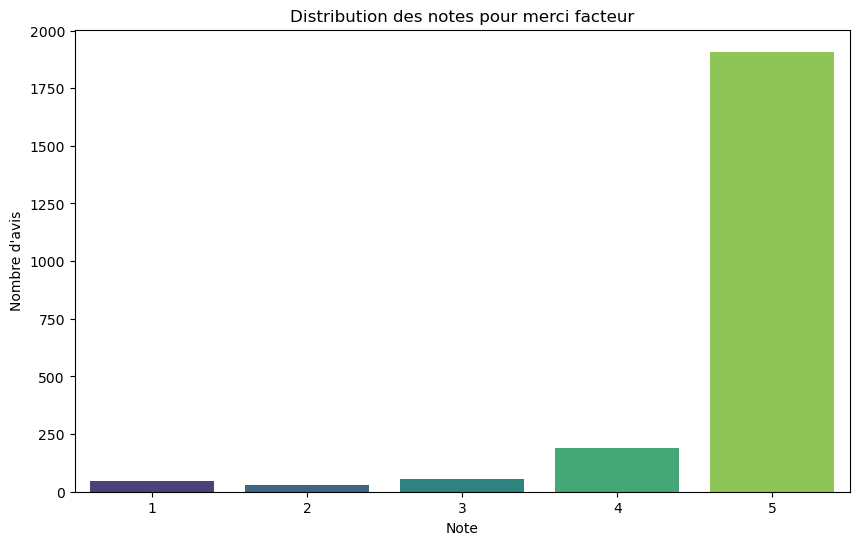

Analyse pour mib clean:
Nombre total d'avis: 7


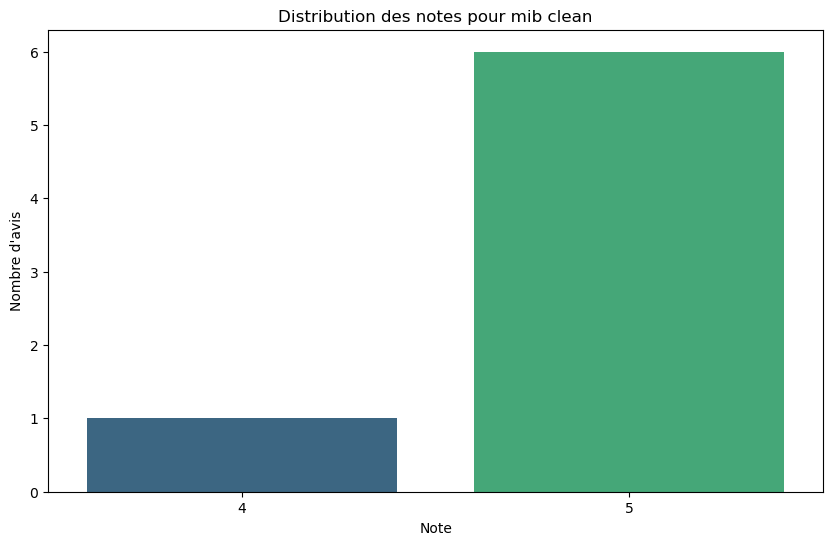

Analyse pour module³:
Nombre total d'avis: 9


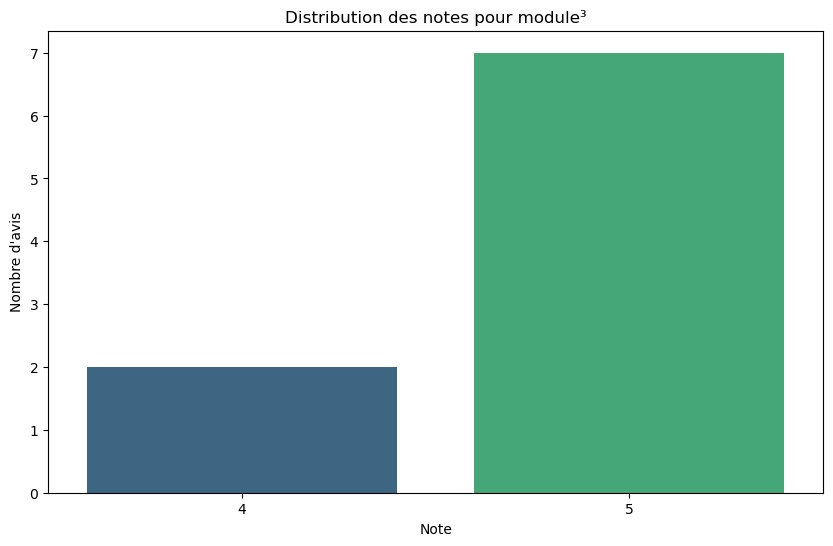

Analyse pour mon-emballage:
Nombre total d'avis: 2788


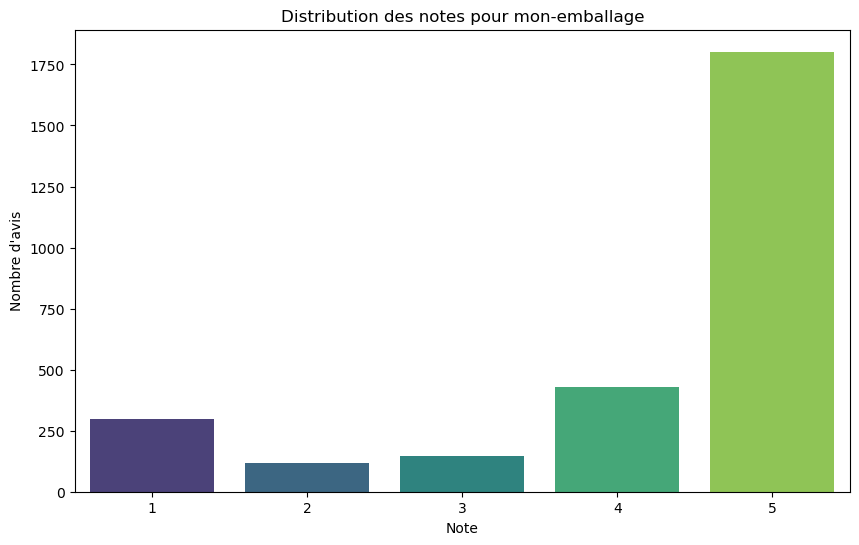

Analyse pour mondial relay:
Nombre total d'avis: 59877


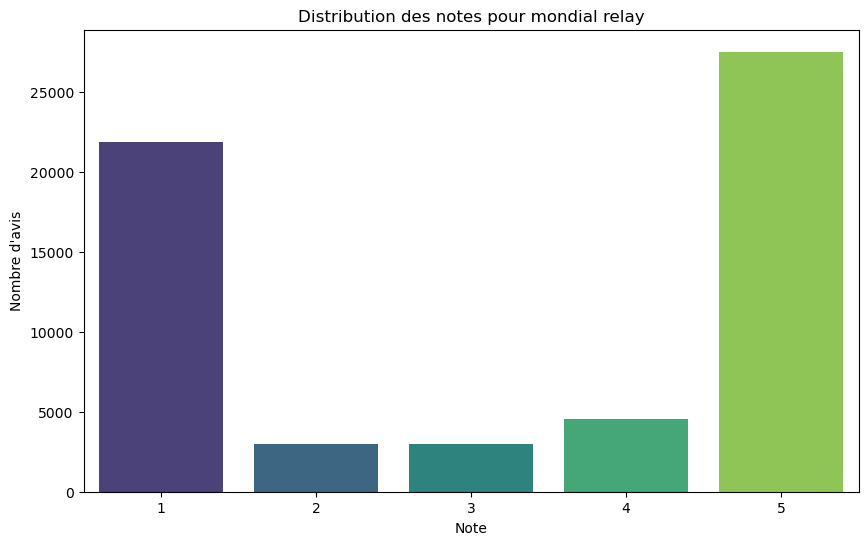

Analyse pour mou&you déménagement:
Nombre total d'avis: 4


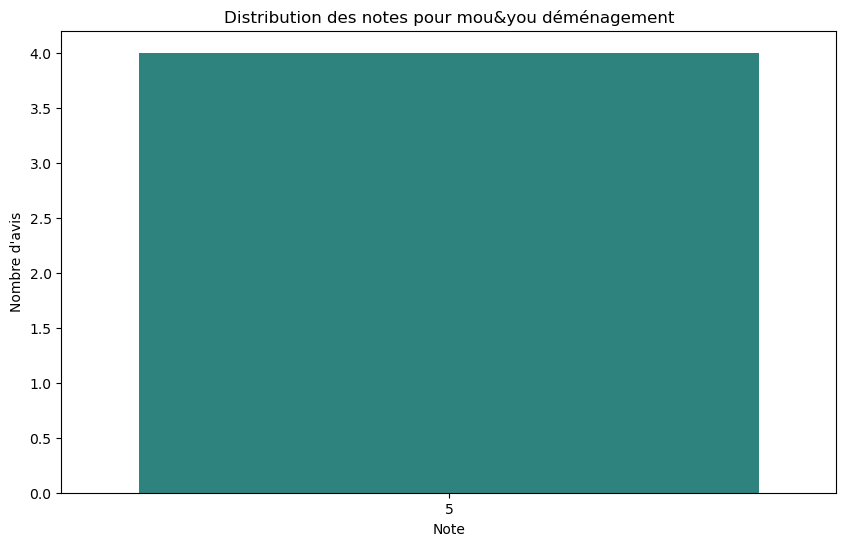

Analyse pour mytroopers:
Nombre total d'avis: 7


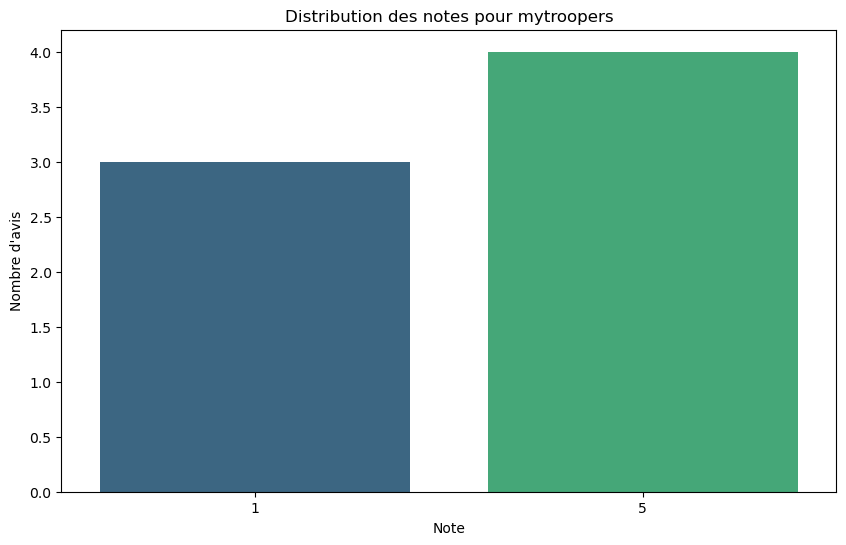

Analyse pour nextories (ex i-demenager):
Nombre total d'avis: 3214


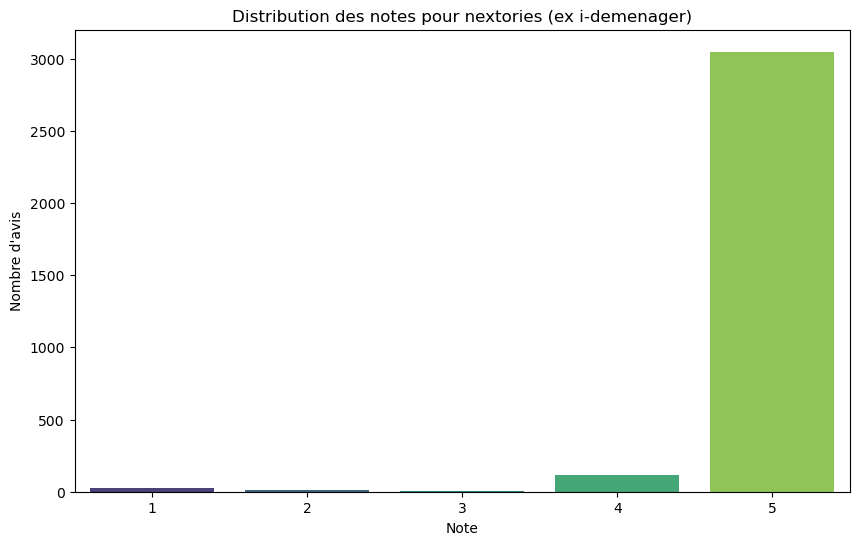

Analyse pour oracle34:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


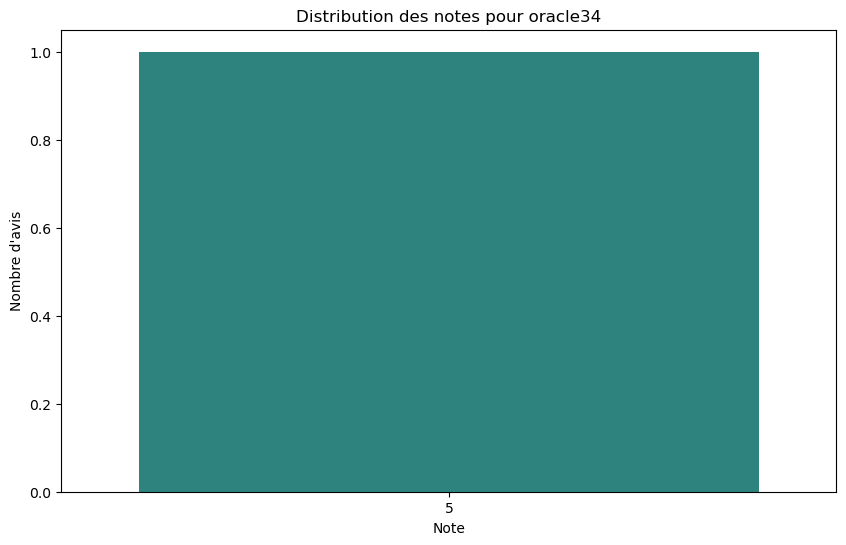

Analyse pour packhelp:
Nombre total d'avis: 647


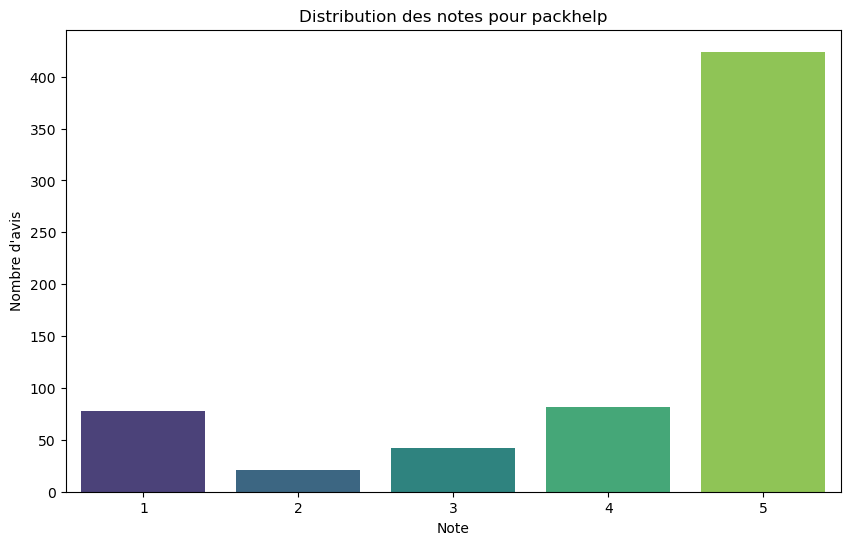

Analyse pour pakup-emballage:
Nombre total d'avis: 230


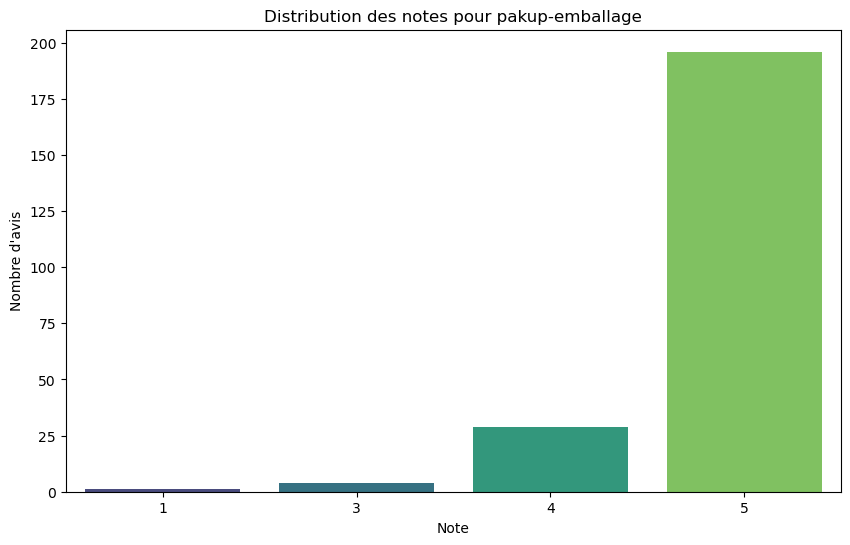

Analyse pour paperboy:
Nombre total d'avis: 8


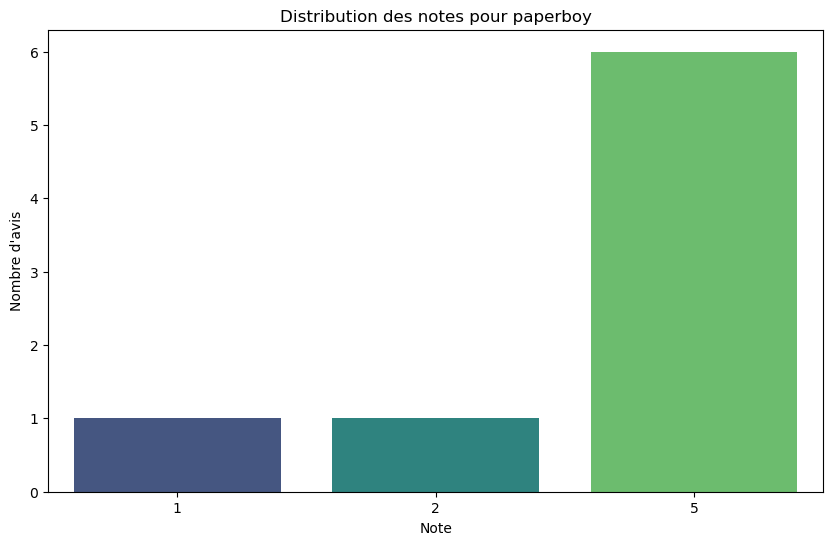

Analyse pour papernest:
Nombre total d'avis: 7641


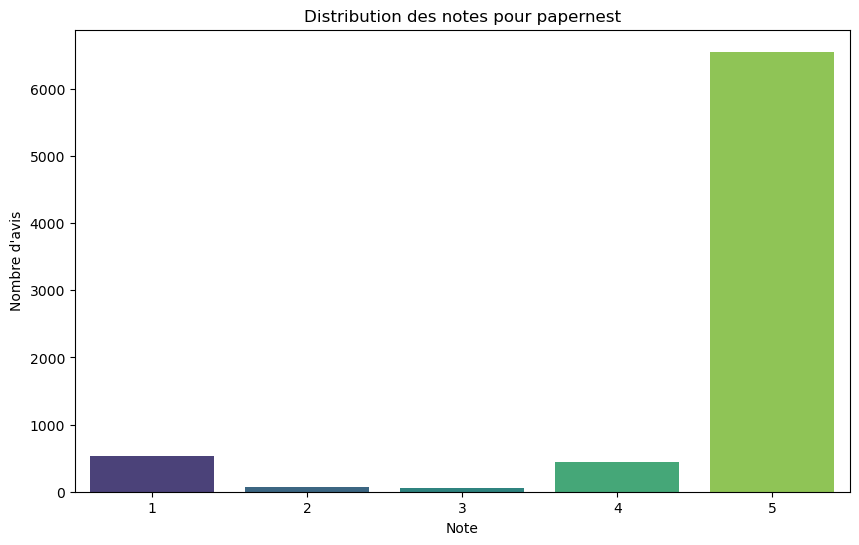

Analyse pour parcel monkey france:
Nombre total d'avis: 325


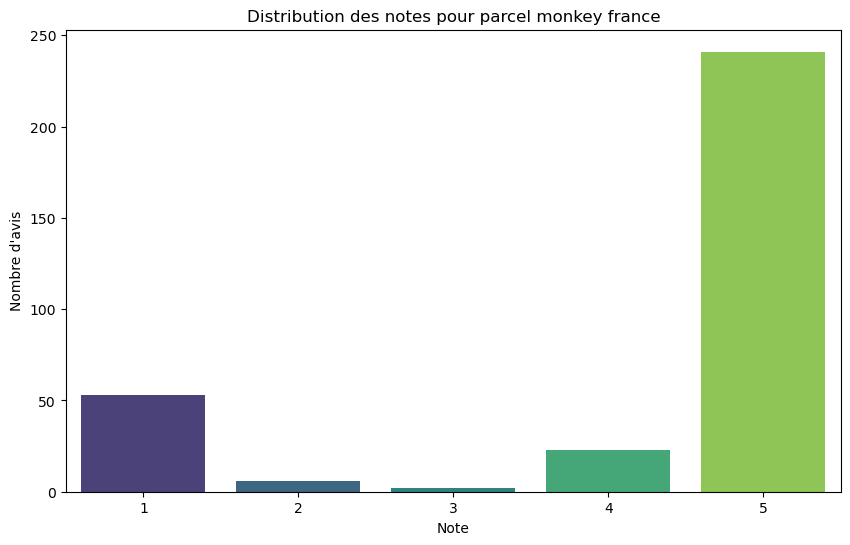

Analyse pour paysdesenveloppes:
Nombre total d'avis: 3432


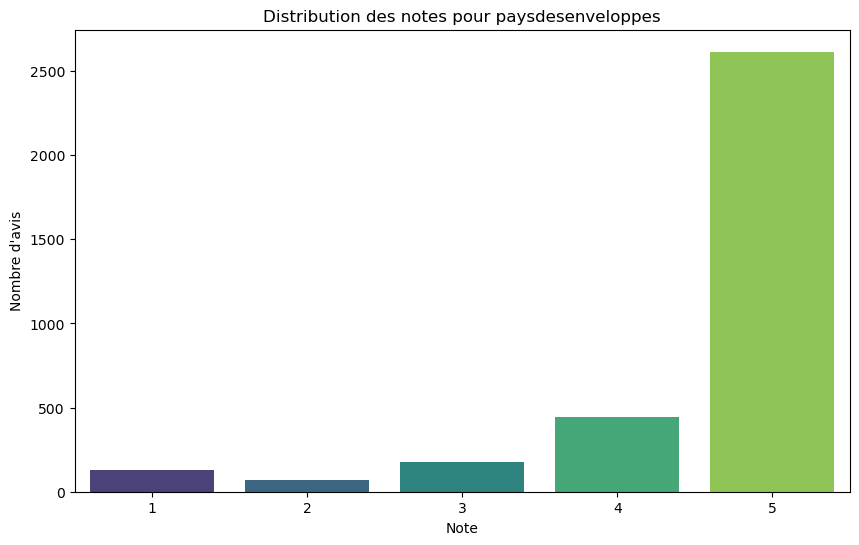

Analyse pour phacil:
Nombre total d'avis: 8


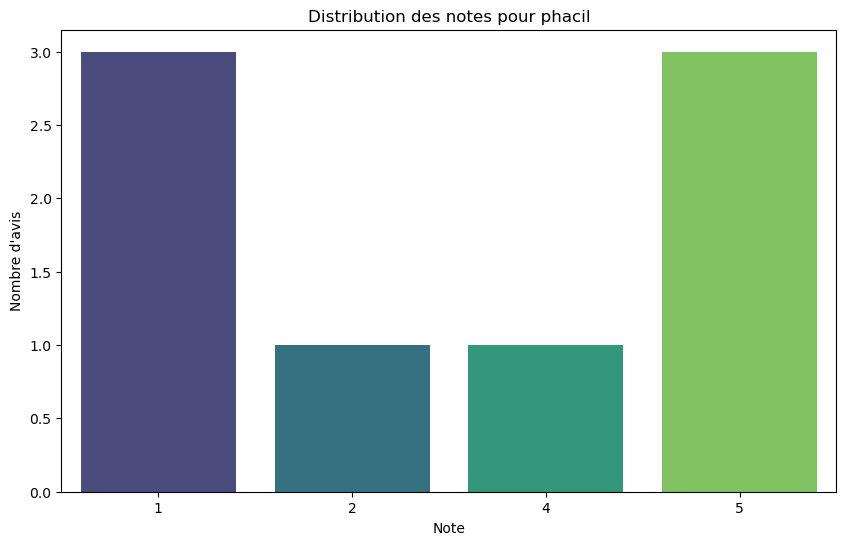

Analyse pour plaisirs fruités:
Nombre total d'avis: 179


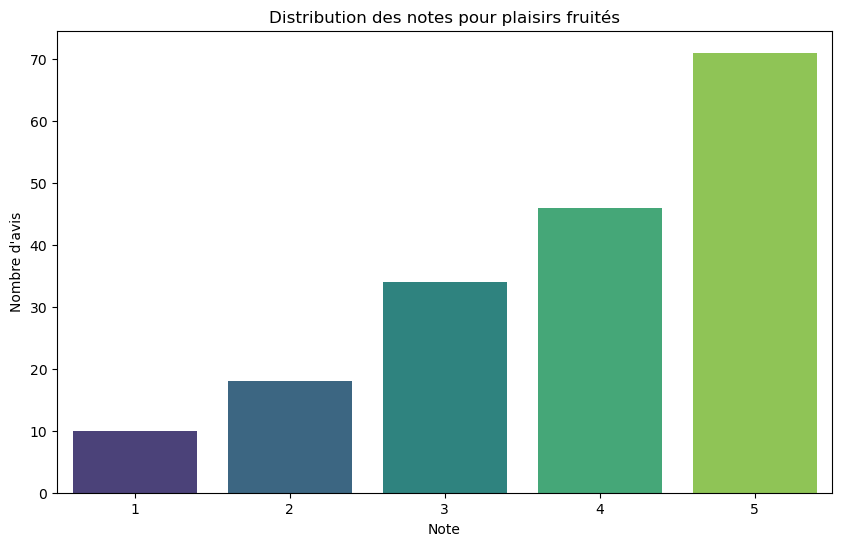

Analyse pour pubensac:
Nombre total d'avis: 68


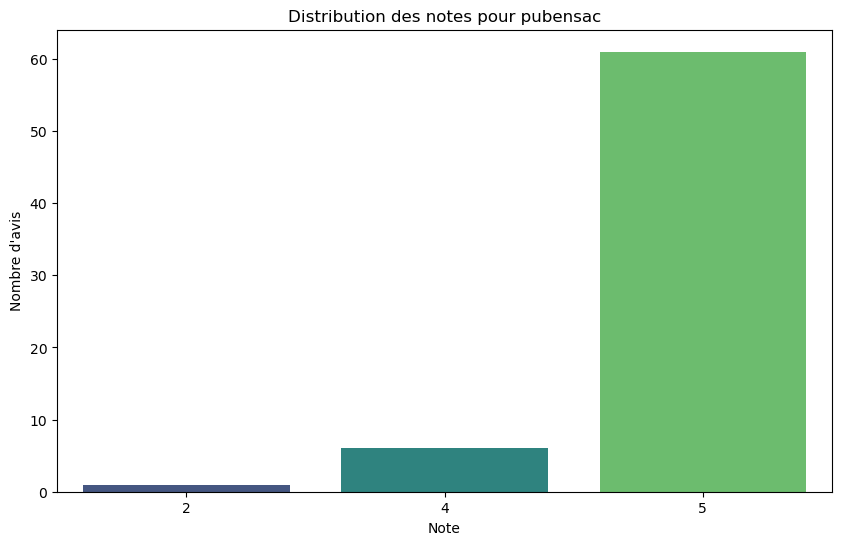

Analyse pour pégase déménagement:
Nombre total d'avis: 2


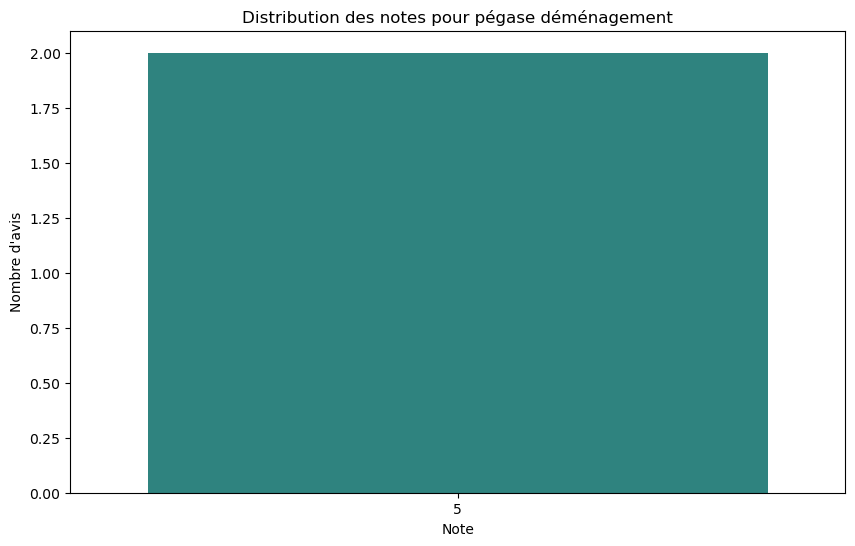

Analyse pour relaiscolis:
Nombre total d'avis: 6413


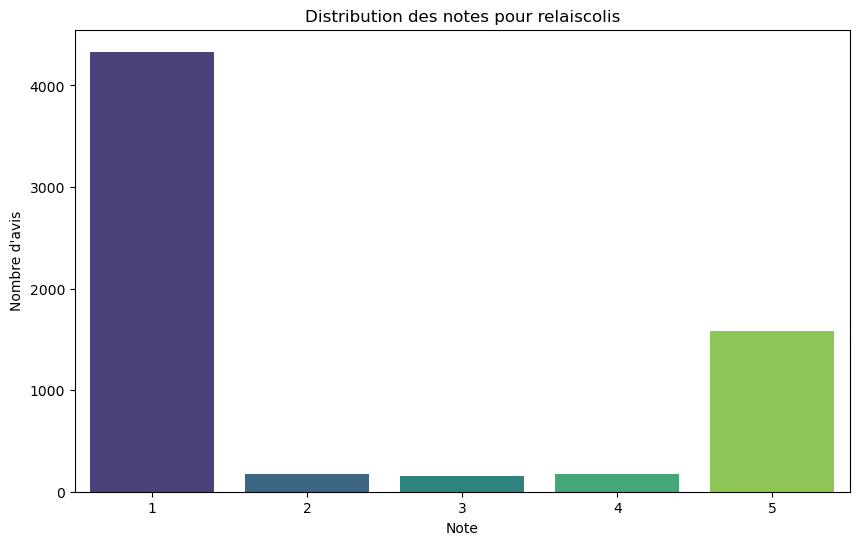

Analyse pour rotomshop:
Nombre total d'avis: 226


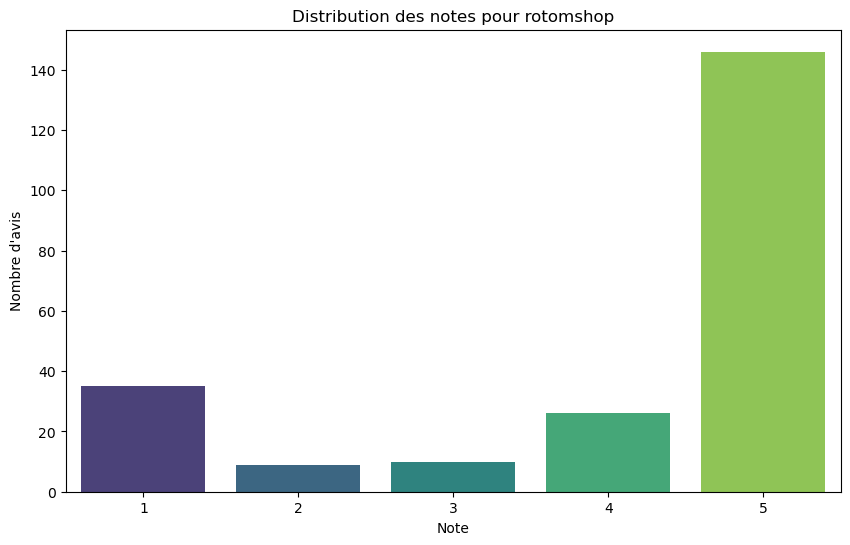

Analyse pour rubiere:
Nombre total d'avis: 7


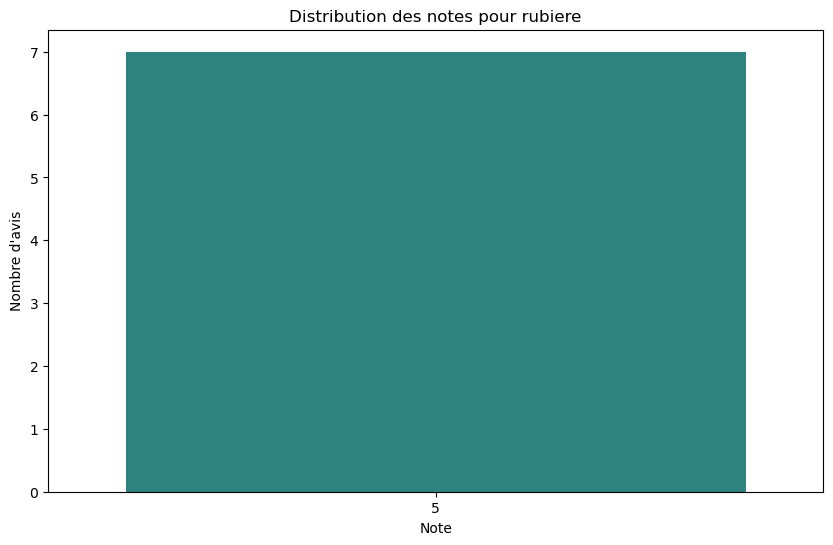

Analyse pour scutify:
Nombre total d'avis: 12


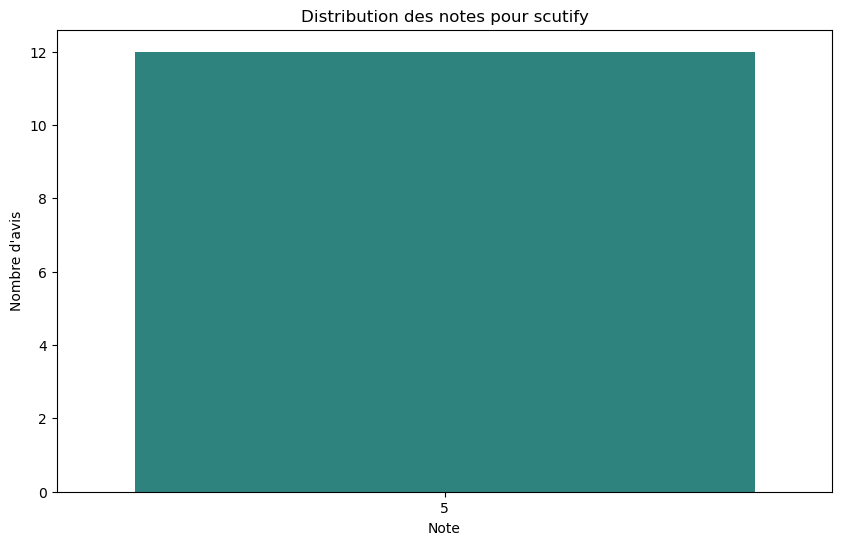

Analyse pour seegmuller:
Nombre total d'avis: 93


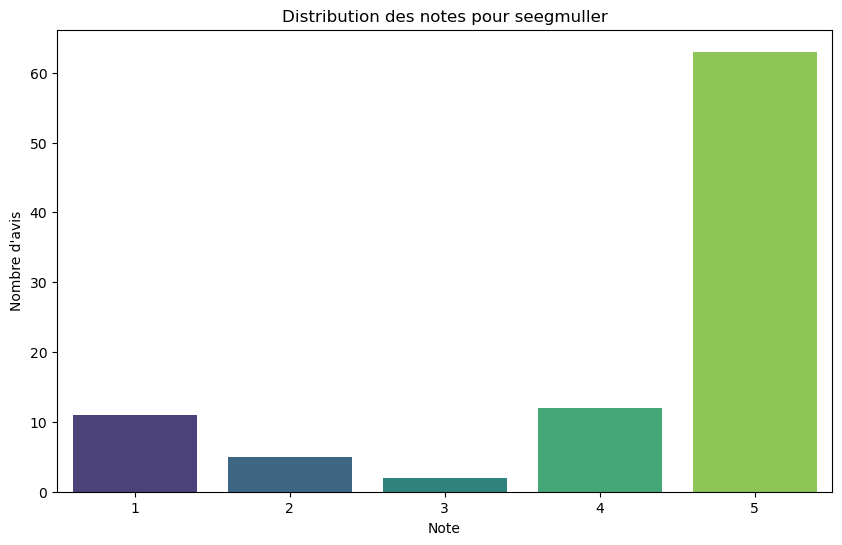

Analyse pour selfstock:
Nombre total d'avis: 16


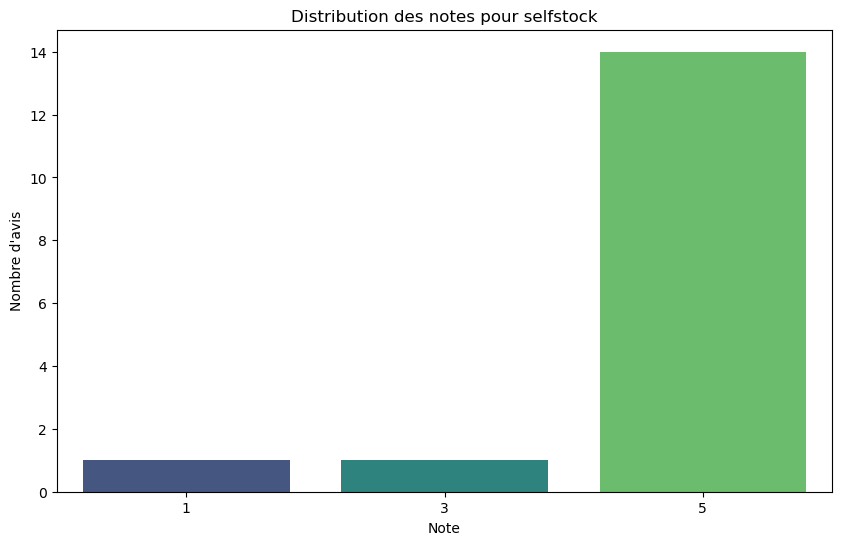

Analyse pour sendcolis:
Nombre total d'avis: 7


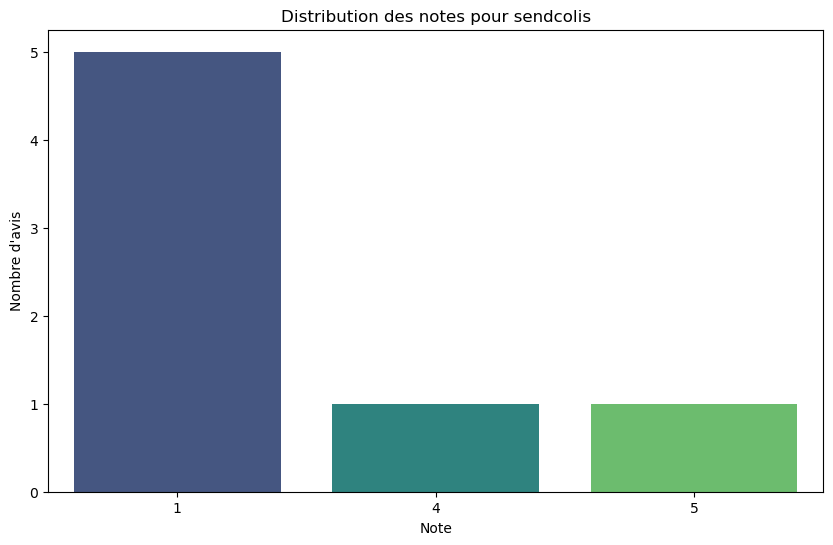

Analyse pour sendiroo france:
Nombre total d'avis: 477


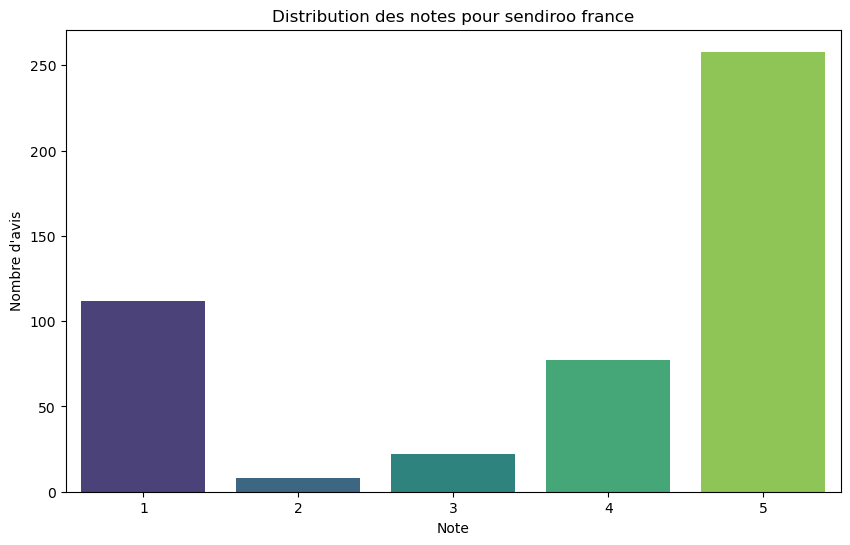

Analyse pour setinup:
Nombre total d'avis: 3


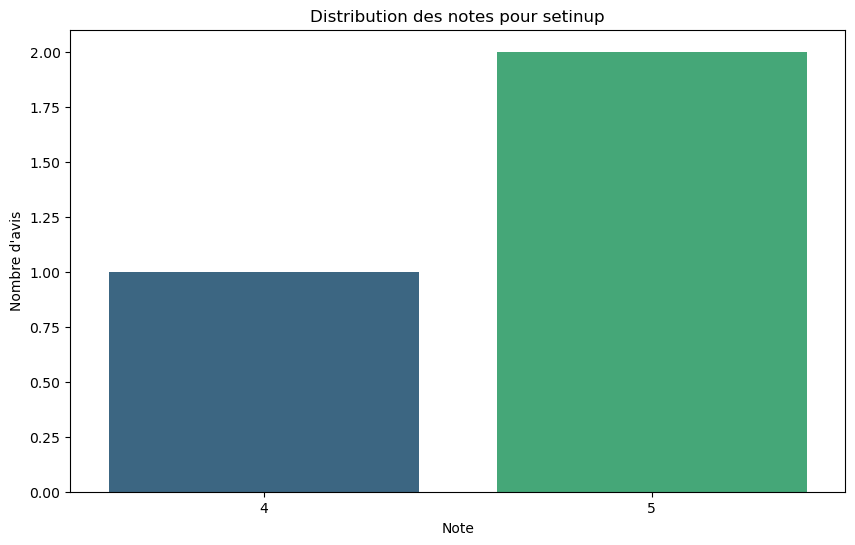

Analyse pour ship24:
Nombre total d'avis: 29


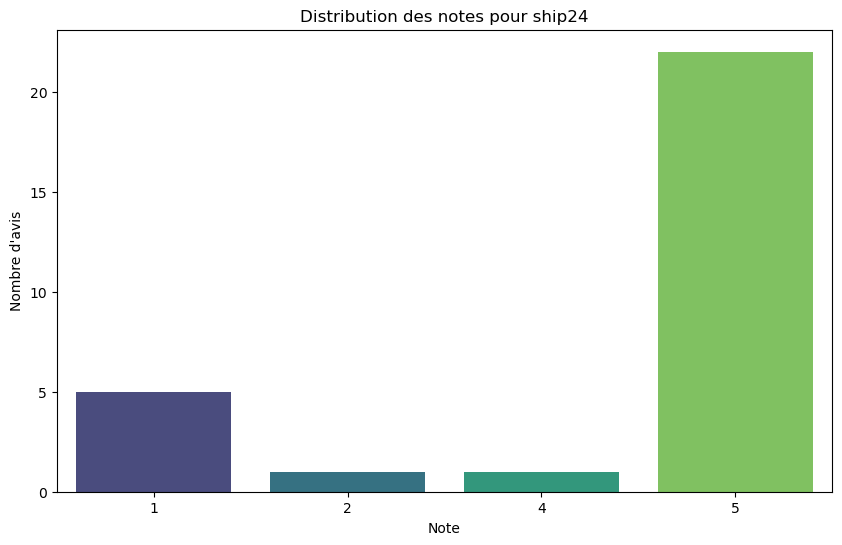

Analyse pour shop2shop by chronopost:
Nombre total d'avis: 10229


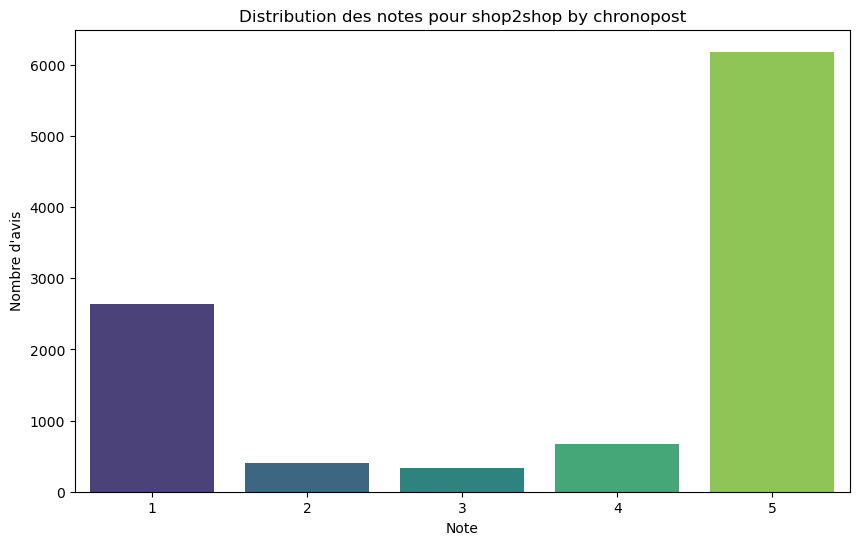

Analyse pour shopiles:
Nombre total d'avis: 1123


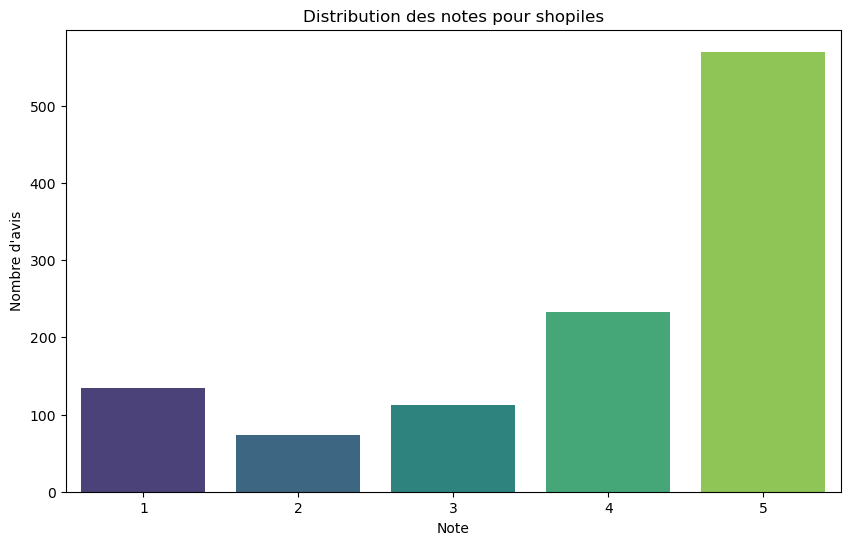

Analyse pour shopopop:
Nombre total d'avis: 10125


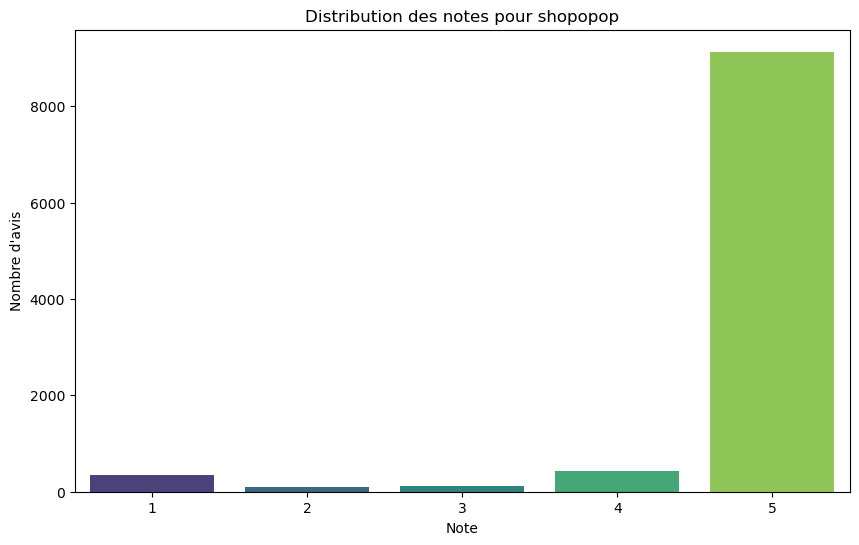

Analyse pour sosea_automotive logistics:
Nombre total d'avis: 31


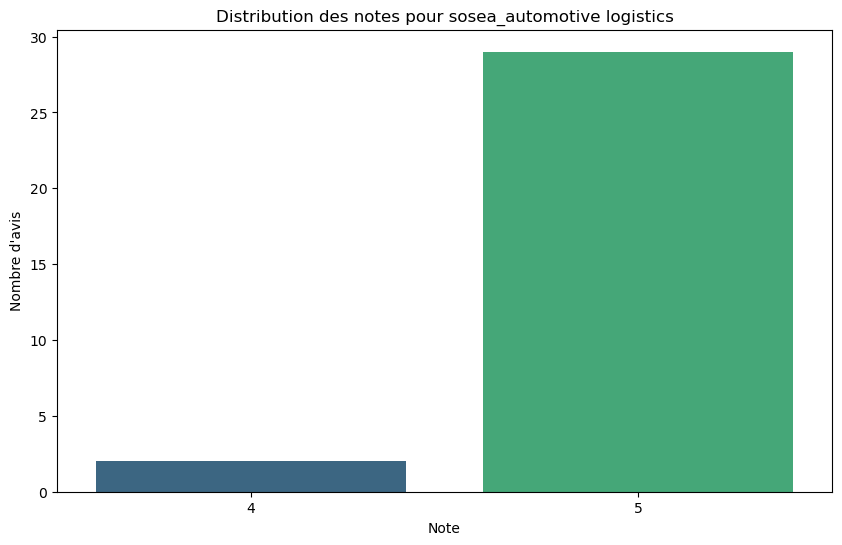

Analyse pour sqy drivers:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


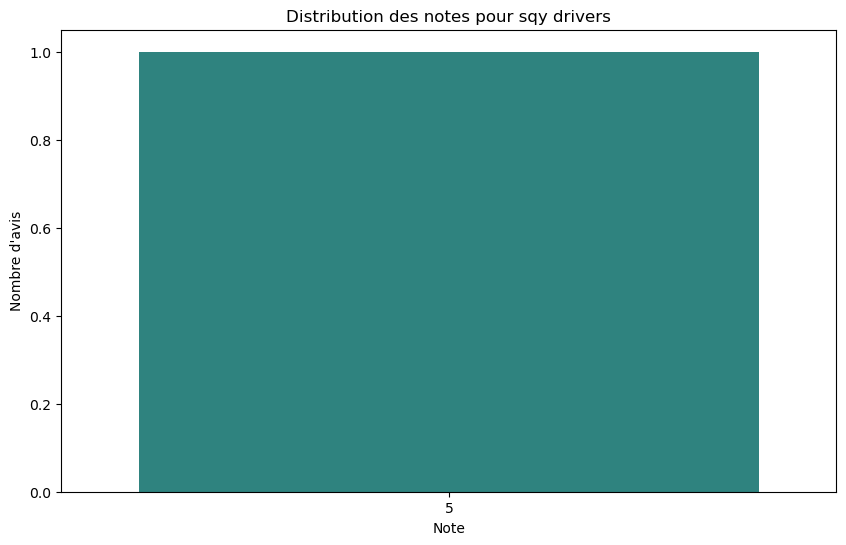

Analyse pour stls - société de transport, livraison et stockage:
Nombre total d'avis: 216


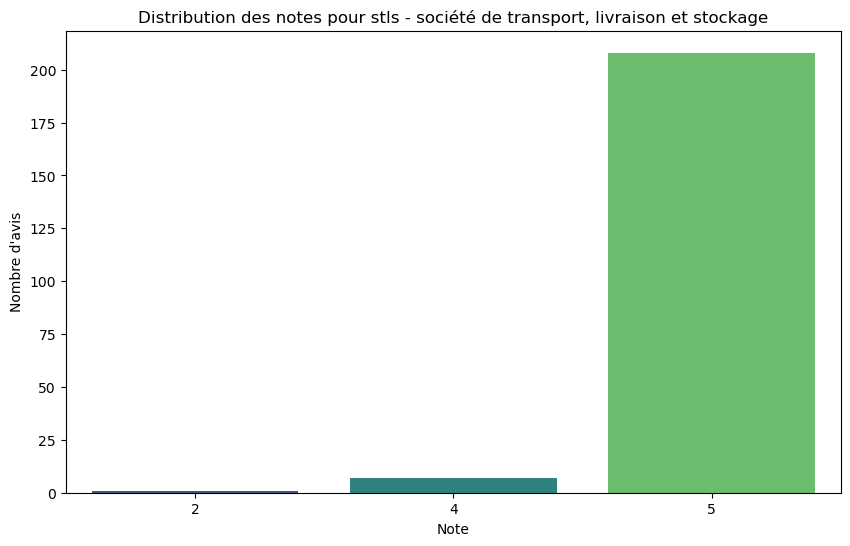

Analyse pour swoopin:
Nombre total d'avis: 2630


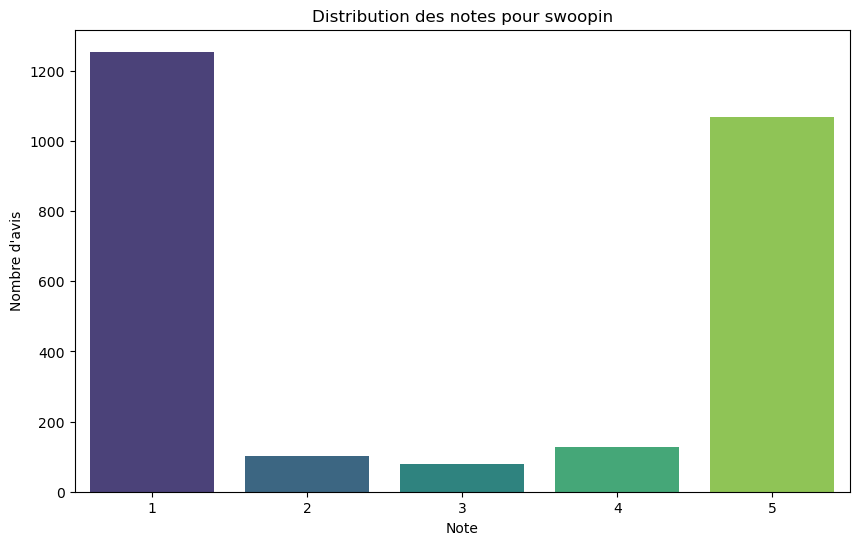

Analyse pour synergie cbd shop:
Nombre total d'avis: 2


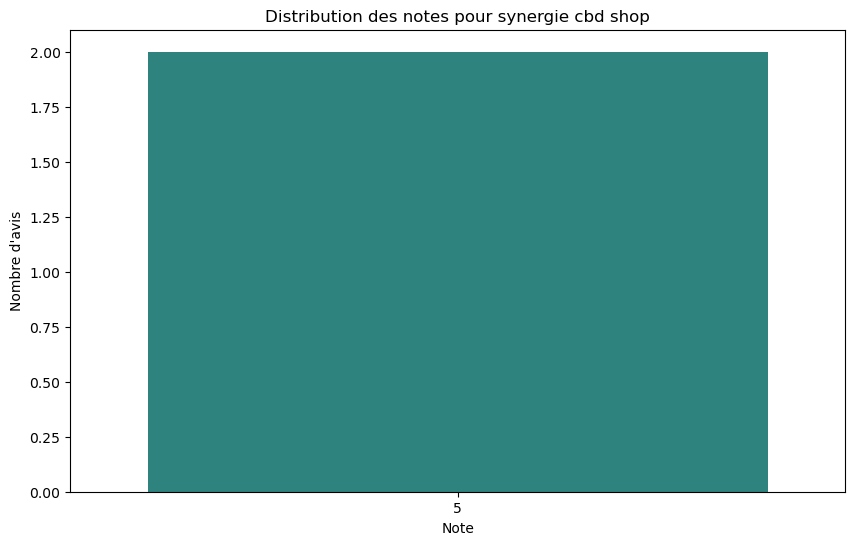

Analyse pour tarif-colis:
Nombre total d'avis: 2


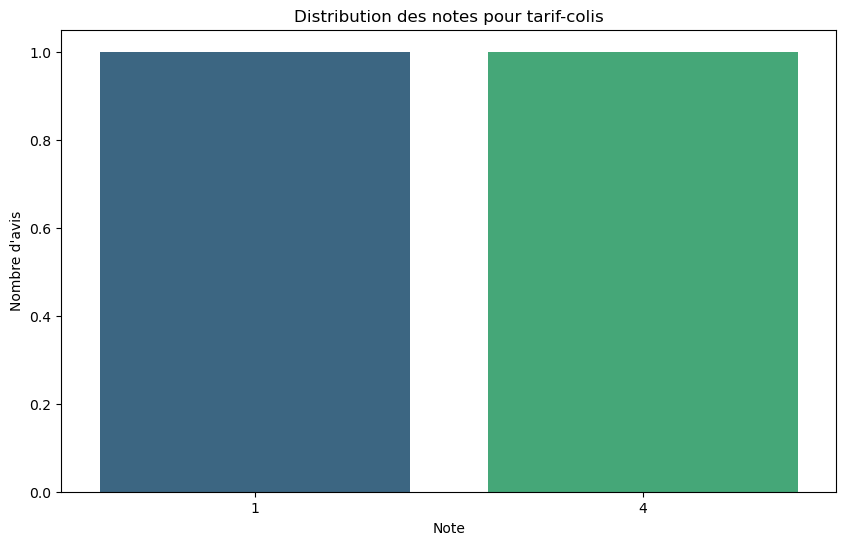

Analyse pour thamarys déménagement:
Nombre total d'avis: 49


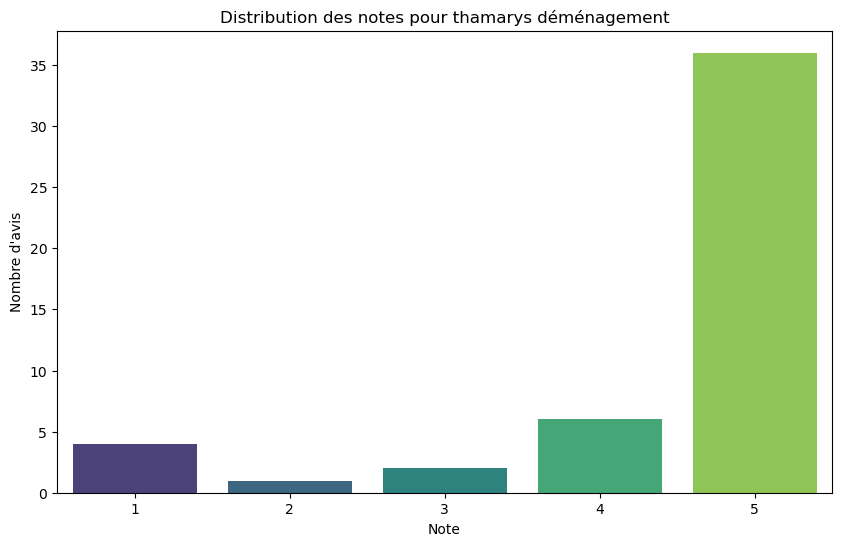

Analyse pour thepackengers:
Nombre total d'avis: 1217


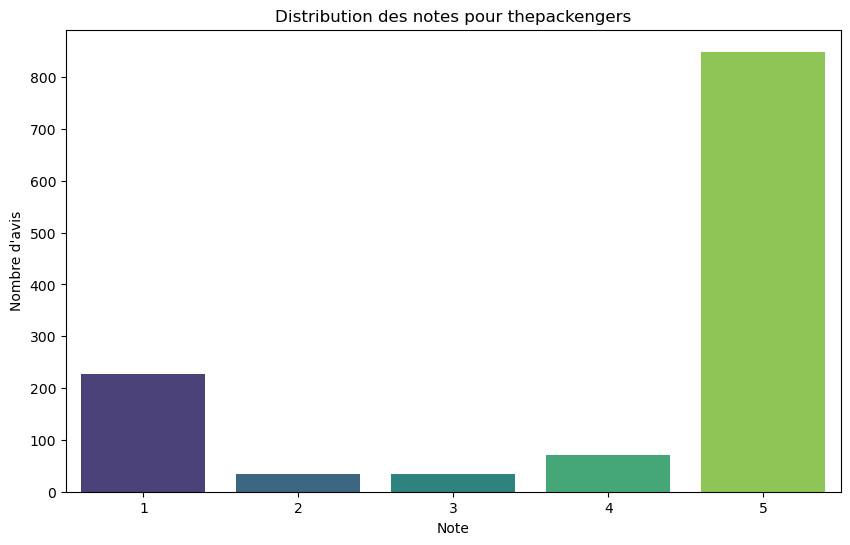

Analyse pour tnt:
Nombre total d'avis: 5688


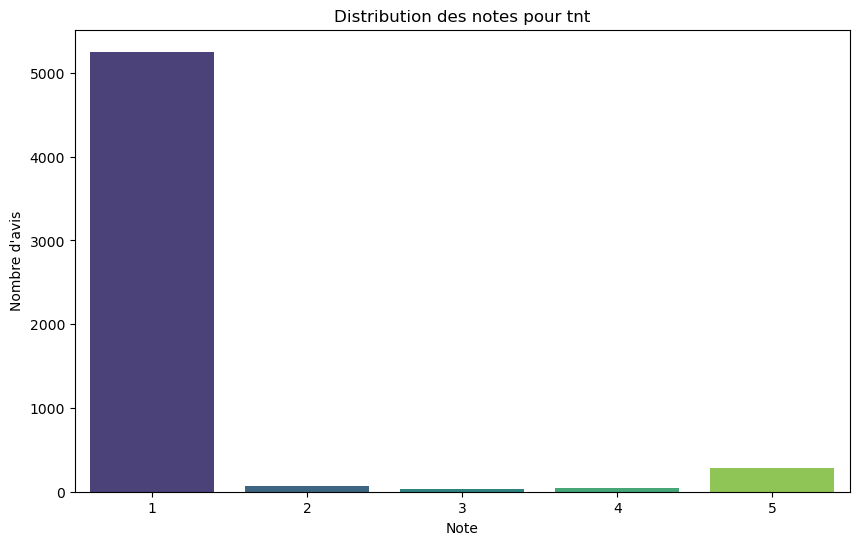

Analyse pour top carton:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


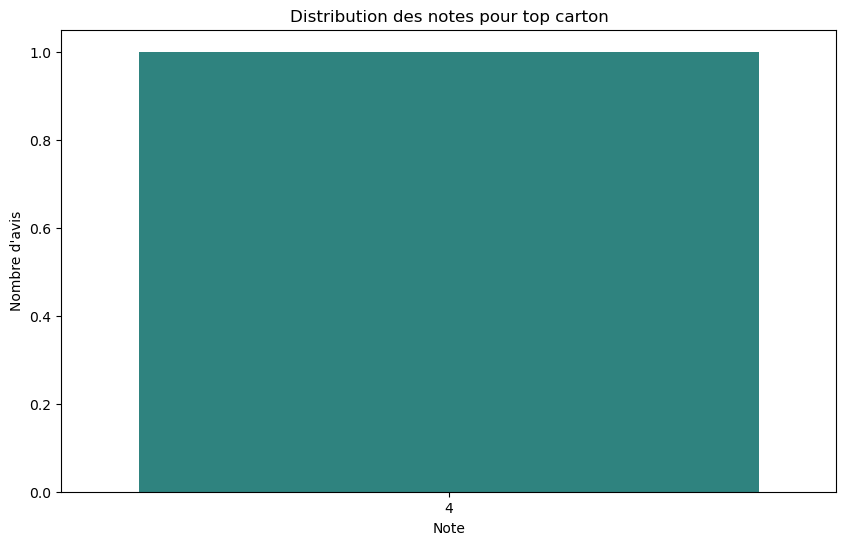

Analyse pour top transport déménagement:
Nombre total d'avis: 30


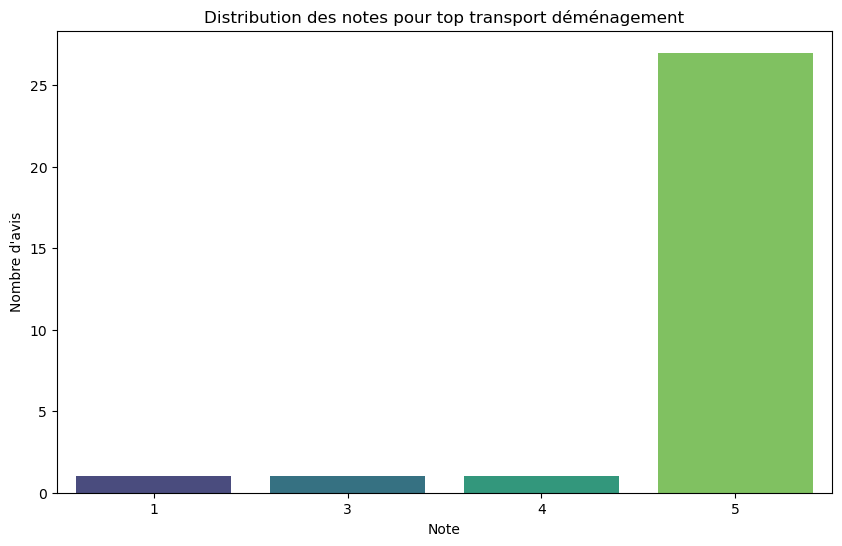

Analyse pour toupain:
Nombre total d'avis: 9


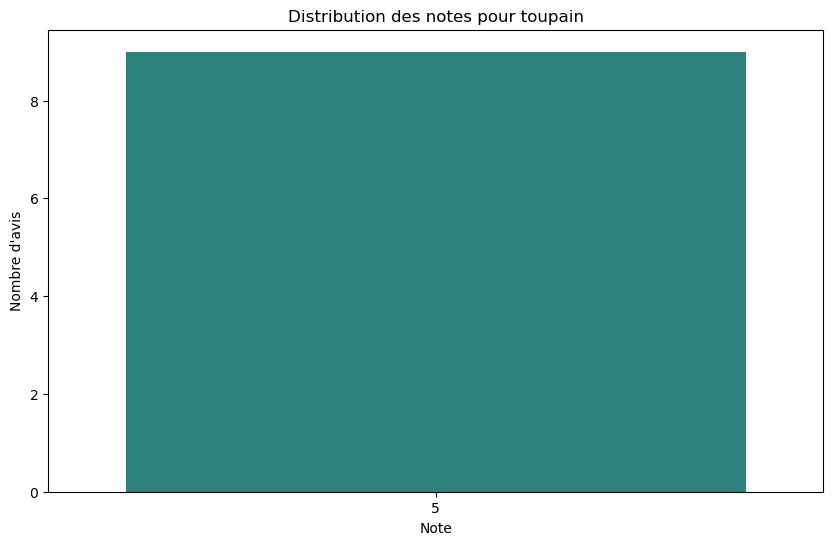

Analyse pour toutemballage:
Nombre total d'avis: 47


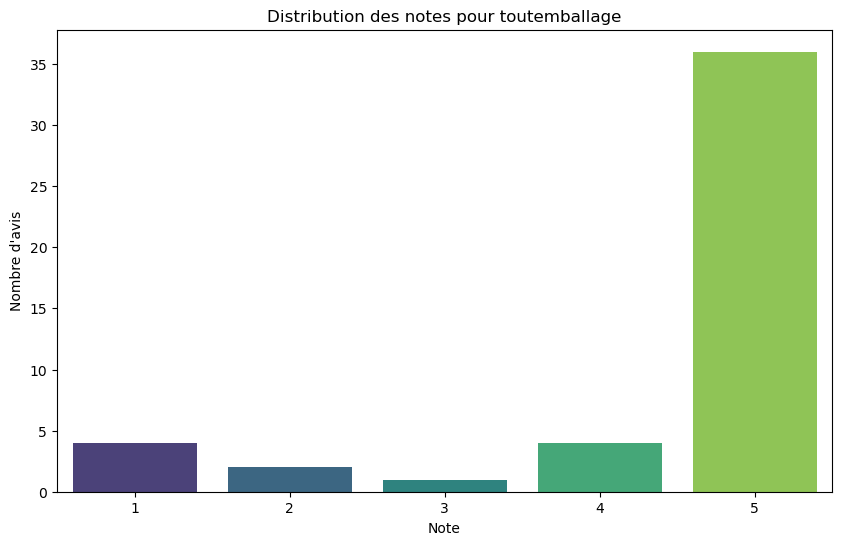

Analyse pour tpop:
Nombre total d'avis: 212


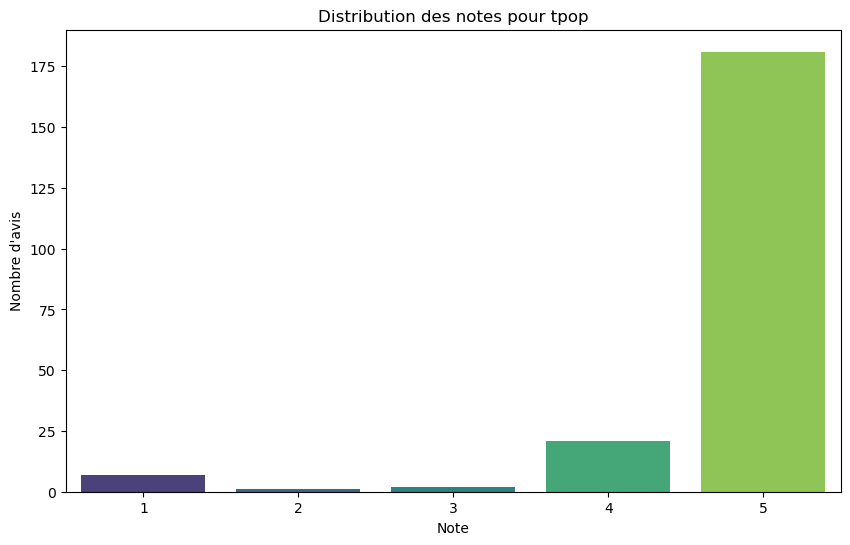

Analyse pour translider demenagement:
Nombre total d'avis: 3


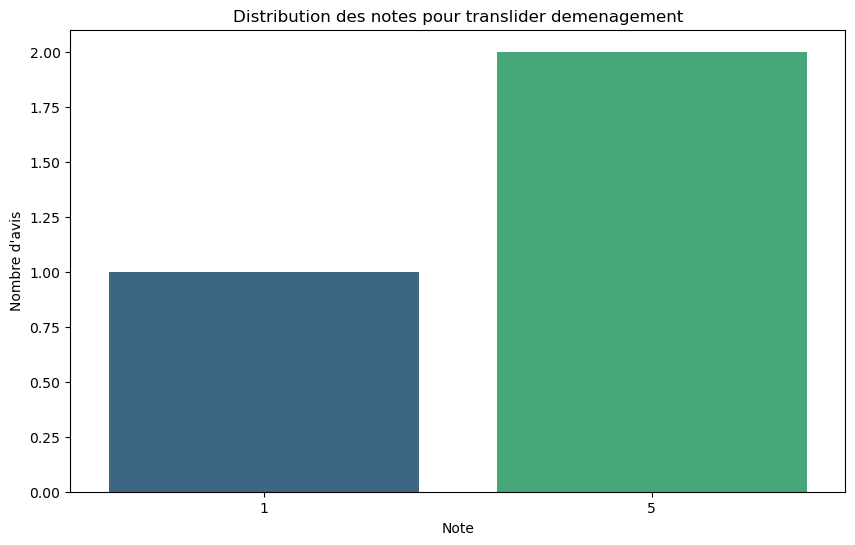

Analyse pour transporta:
Nombre total d'avis: 1


C:\ProgramData\anaconda3\envs\Pojet_supplychain\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


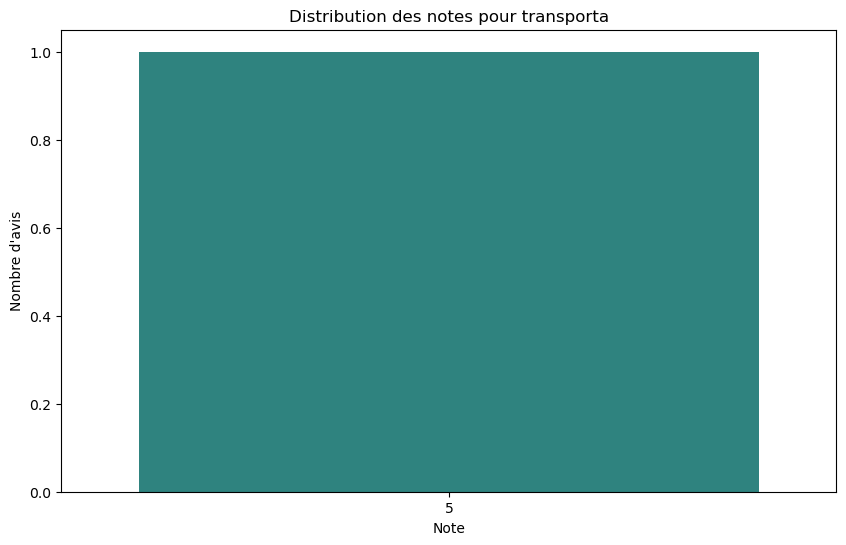

Analyse pour trustdem - déménagement pas cher:
Nombre total d'avis: 119


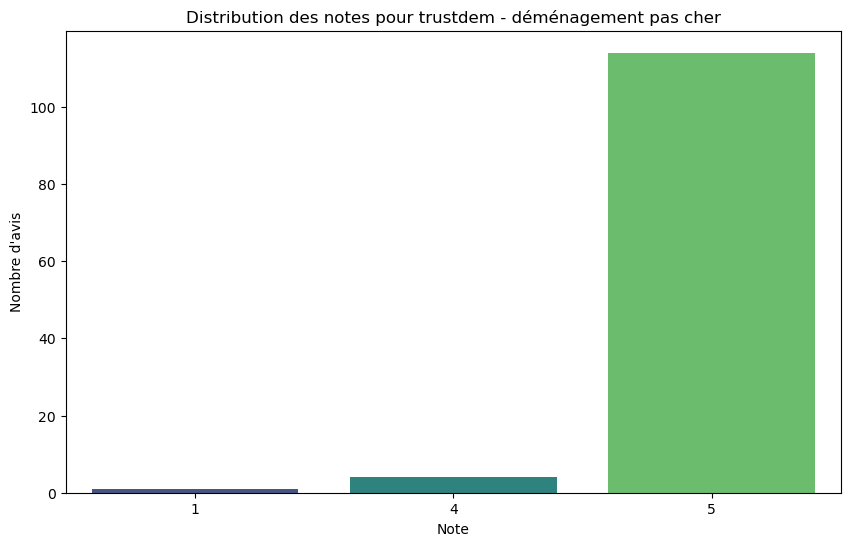

Analyse pour tut-tut:
Nombre total d'avis: 408


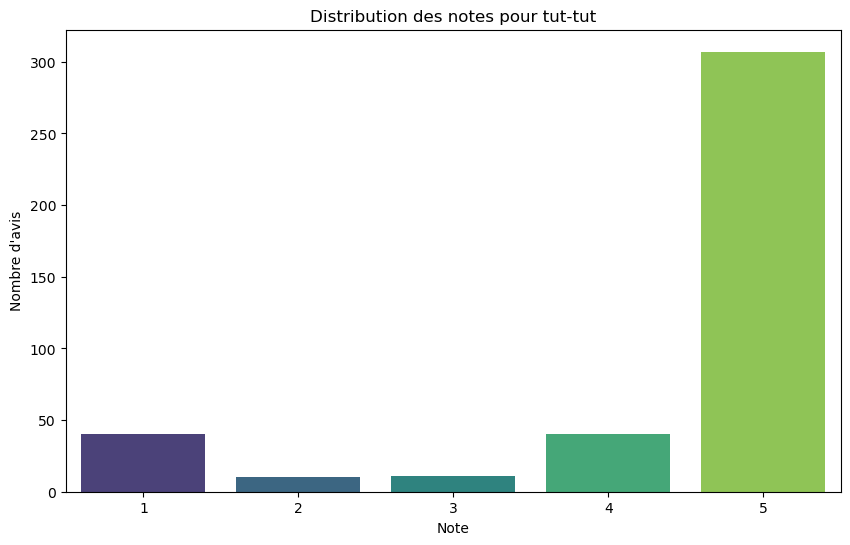

Analyse pour ubbabio:
Nombre total d'avis: 33


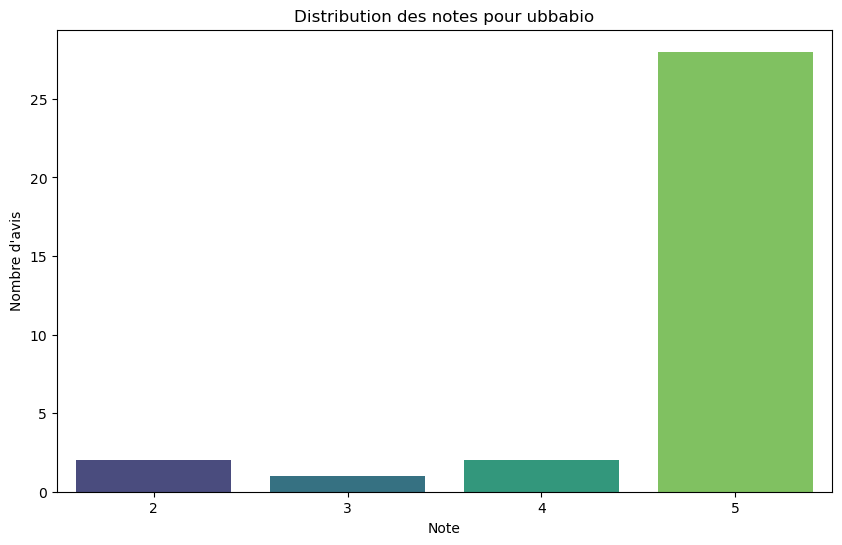

Analyse pour ukprefulfillment:
Nombre total d'avis: 2


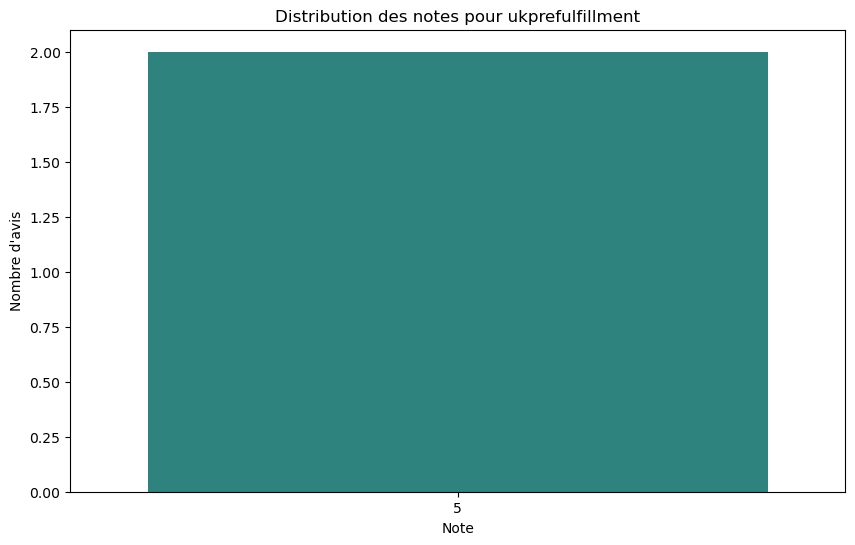

Analyse pour upela:
Nombre total d'avis: 1092


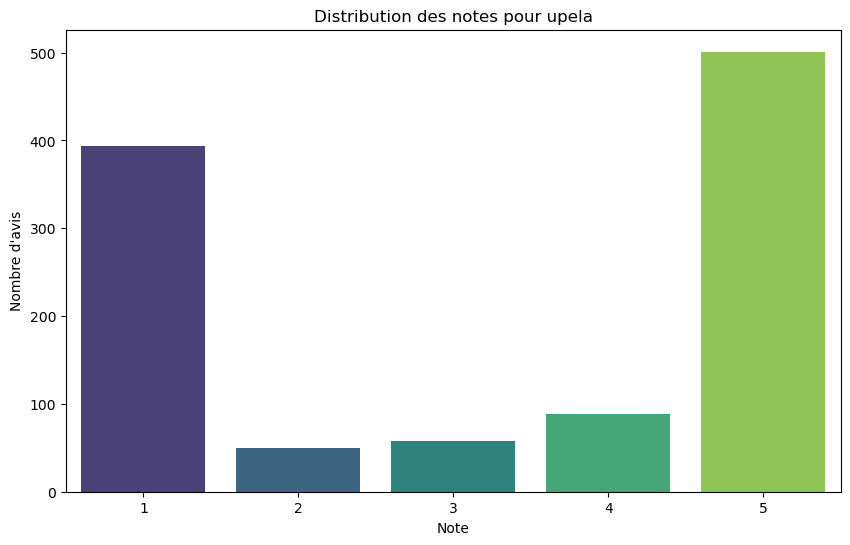

Analyse pour utily:
Nombre total d'avis: 21


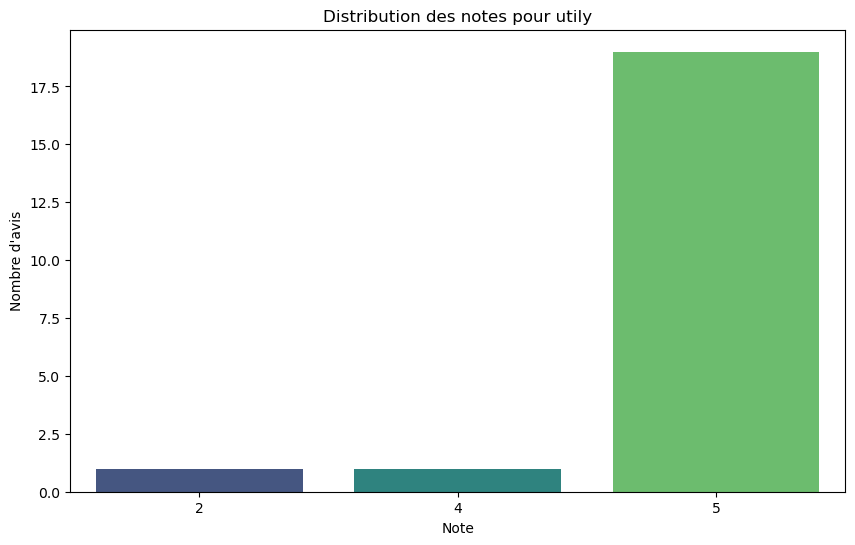

Analyse pour utopya:
Nombre total d'avis: 304


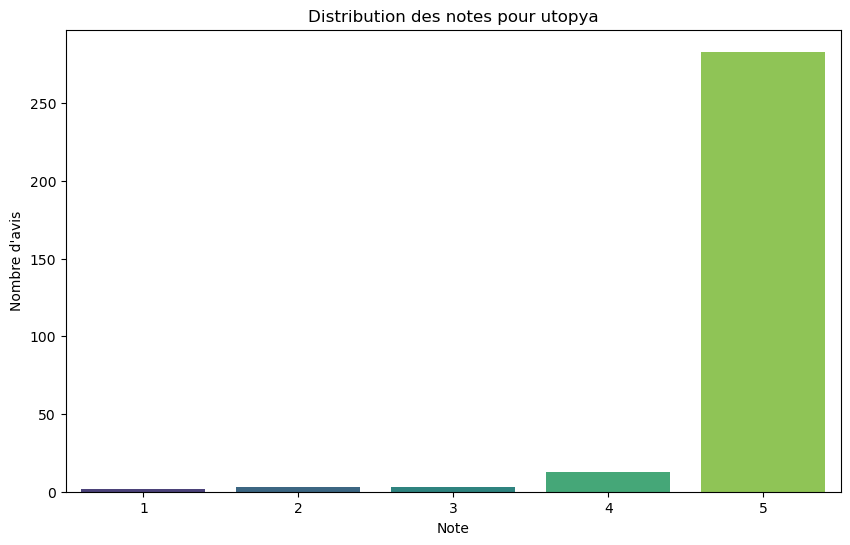

Analyse pour verpacking:
Nombre total d'avis: 4


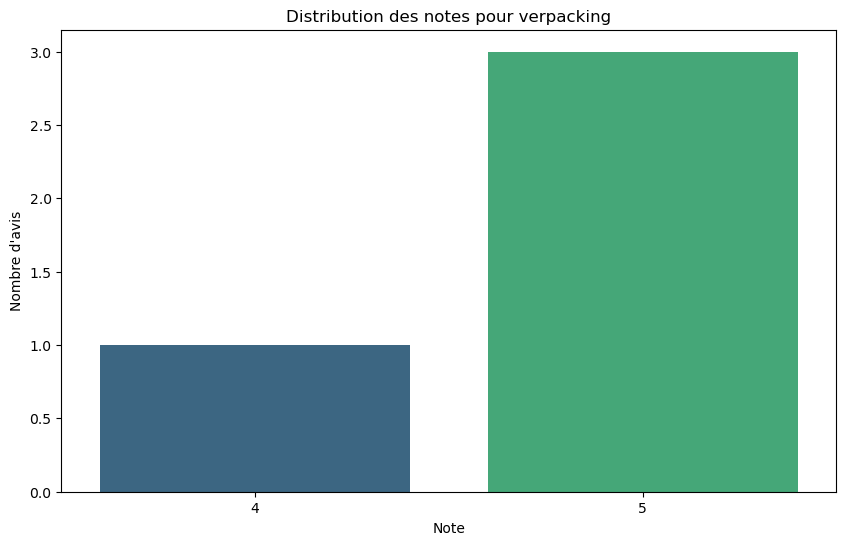

Analyse pour warning group:
Nombre total d'avis: 3551


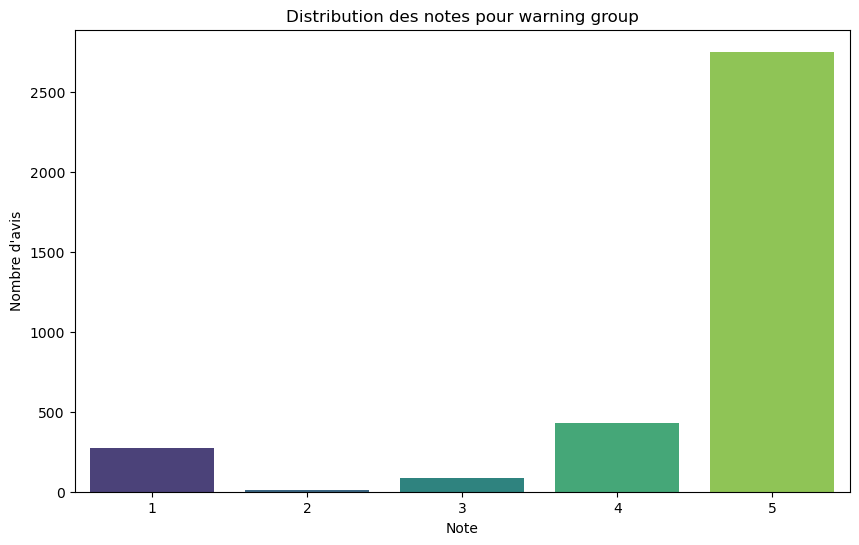

Analyse pour weed side story:
Nombre total d'avis: 2760


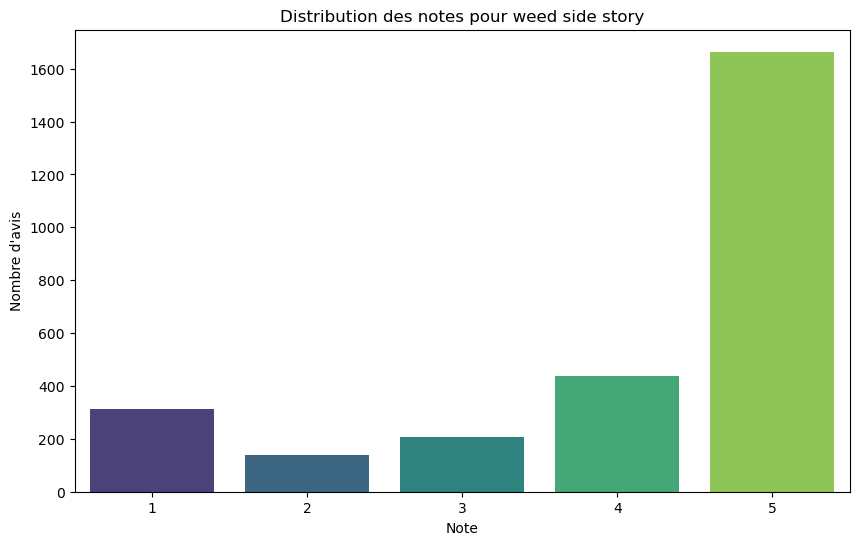

Analyse pour welkit:
Nombre total d'avis: 3096


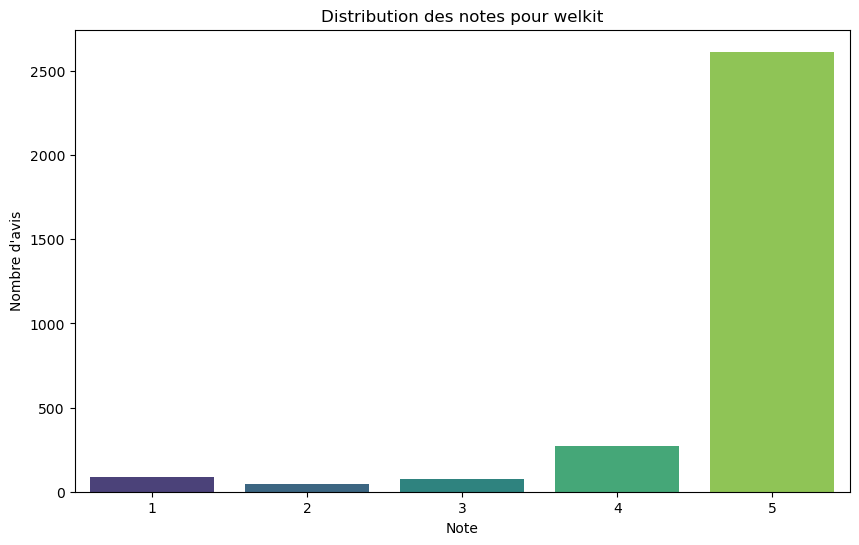

Analyse pour wimoove:
Nombre total d'avis: 10


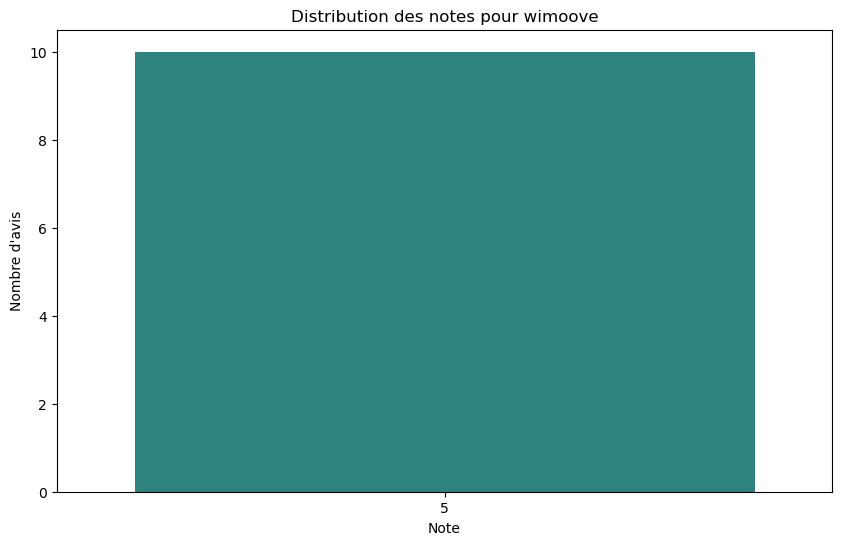

Analyse pour youstock:
Nombre total d'avis: 783


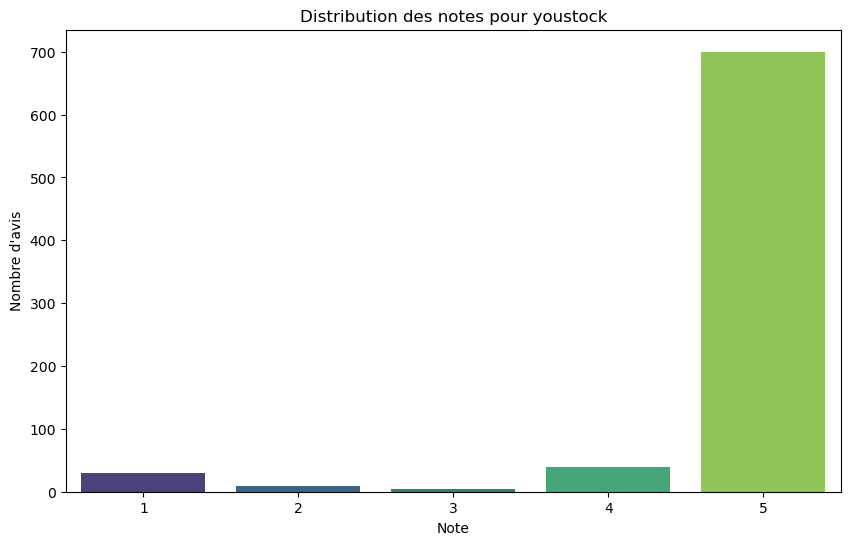

Analyse pour yper:
Nombre total d'avis: 716


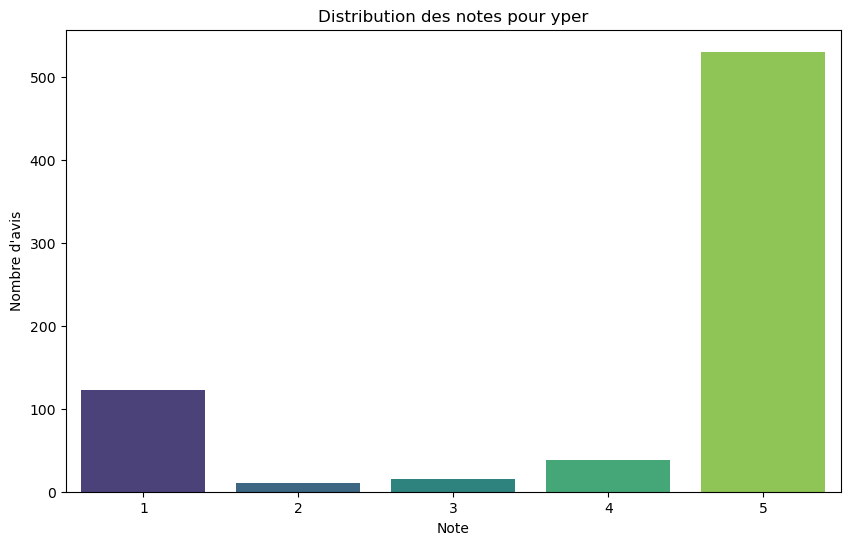

Analyse pour zolemba fr:
Nombre total d'avis: 224


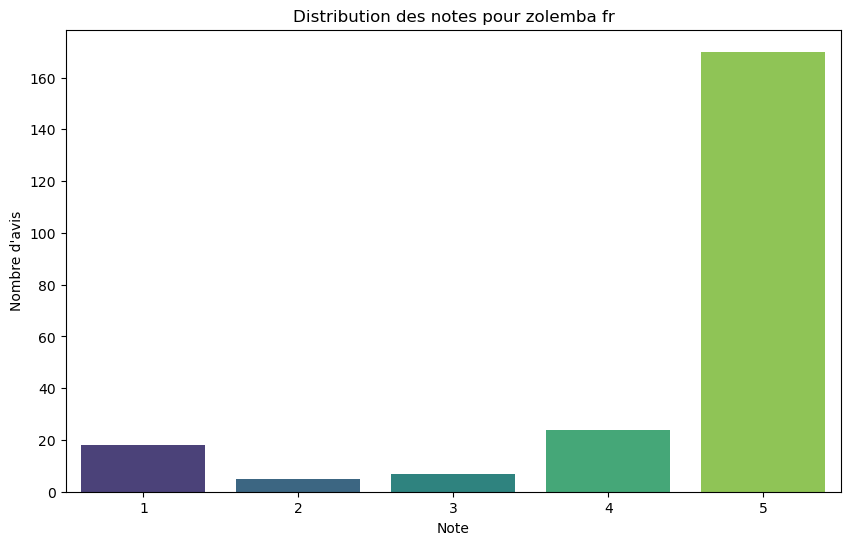

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns


for name, group in transformedAvis_df.groupby('Nom_Entreprise'):
    print(f"Analyse pour {name}:")
    print(f"Nombre total d'avis: {group.shape[0]}")

    # Exemple de visualisation pour chaque groupe
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Note', data=group, palette='viridis')
    plt.title(f"Distribution des notes pour {name}")
    plt.xlabel('Note')
    plt.ylabel('Nombre d\'avis')
    plt.show()





In [121]:
display(df_avis1['emojis'].value_counts())

emojis
👍           2101
👌            484
😡            458
😊            434
😉            353
            ... 
👍📦☺️👍👍         1
💖💖             1
🙏👍💖            1
👍🏻👏🏻           1
🤗😃👍🙏🙏😍👌👋       1
Name: count, Length: 2202, dtype: int64

In [122]:
display(df_avis1['Langue'].unique())

array(['fr', 'hu', 'ca', 'es', 'it', 'et', 'ro', 'lt', 'fi', 'en', 'ar',
       'sk', 'nl', 'lv', 'pt', 'Unknown', 'tl', 'de', 'hr', 'sq', 'no',
       'sv', 'af', 'cs', 'pl', 'vi', 'so', 'da', 'cy', 'sw', 'id', 'sl',
       'tr', 'uk', 'ru', 'bn'], dtype=object)

In [123]:
df_avis_class_test[df_avis1['Langue']=='en']

Nom_Entreprise              Nom_Client  Nombre_avis Pays  Note  \
492              airselli       mokhtar bouchikhi           20   DZ     5   
648     all transporteurs                 charles            2   FR     4   
732     all transporteurs           manuel rubalo            1   FR     5   
1777               boxtal  tijara discountexpress            4   FR     5   
2353               boxtal        aurelien benoist            1   FR     4   
...                   ...                     ...          ...  ...   ...   
504173           youstock          riviello paola            1   FR     5   
504347               yper           sylvie brauns            1   FR     5   
504808               yper                 buisset            1   FR     5   
505041         zolemba fr    m francois hermeline            9   FR     5   
505098         zolemba fr      laboratoires vitys            1   FR     5   

                             Date                              Titre_avis  \
492     2024-03-13 00:27:29+00:00  the best in maghreb and spcial algeria   
648     2021-12-30 11:56:29+00:00                                    bien   
732     2018-12-12 11:59:06+00:00                             bon contact   
1777    2023-06-29 11:24:59+00:00                        good with boxtal   
2353    2021-07-28 06:08:53+00:00               belle interface intuitive   
...                           ...                                     ...   
504173  2020-05-16 15:18:45+00:00                             bon service   
504347  2024-03-04 16:19:12+00:00                        tres bon service   
504808  2022-04-11 11:56:54+00:00                                     top   
505041  2020-10-12 09:11:46+00:00                                 tout ok   
505098  2018-04-04 15:40:18+00:00                             rien a dire   

                                          Contenu_avis  \
492     the best in maghreb and spcial algeria is good   
648                     bien rapide efficace bon tarif   
732                             bon contactbien a vous   
1777                                  good with boxtal   
2353                         belle interface intuitive   
...                                                ...   
504173                  bon service bon service client   
504347                                tres bon service   
504808                                             top   
505041                          tout ok prix attractif   
505098                            rien a dire the best   

                                         Réponse_Entrpris  year  month  \
492                                                   Non  2024      3   
648                                                   Non  2021     12   
732                                                   Non  2018     12   
1777    Hello Khalid, Thank you for taking the time to...  2023      6   
2353    Bonjour,Je vous remercie pour votre message de...  2021      7   
...                                                   ...   ...    ...   
504173                                                Non  2020      5   
504347   Nous en sommes yper-ravis, merci de ce retour :)  2024      3   
504808                                   Bonjour, merci !  2022      4   
505041  Merci beaucoup. Nous sommes fiers de notre pro...  2020     10   
505098                                                Non  2018      4   

        weekday  weekend  day  hour emojis  emojis_text Langue  \
492           2        0   13     0    NaN          NaN     en   
648           3        0   30    11    NaN          NaN     es   
732           2        0   12    11    NaN          NaN     es   
1777          3        0   29    11    NaN          NaN     en   
2353          2        0   28     6    NaN          NaN     en   
...         ...      ...  ...   ...    ...          ...    ...   
504173        5        1   16    15    NaN          NaN     en   
504347        0        0    4    16    NaN     

In [124]:
df_avis_class_test[df_avis1['Langue']=='et']



Nom_Entreprise        Nom_Client  Nombre_avis Pays  Note  \
155      ags dmnagement        mazdo maza           10   FR     3   
9983      carton market   jose dos santos            4   FR     5   
14061     carton market     william jouan            5   FR     5   
14916     carton market  sylvain vadeboin            8   FR     5   
26377     carton market            client            1   FR     5   
...                 ...               ...          ...  ...   ...   
473192         shopopop       le creusois           13   FR     5   
473322         shopopop              jcda            3   FR     5   
480387         shopopop          nj darri            1   FR     5   
487278              tnt               tkd            4   FR     1   
500115  weed side story      steven dupas            1   FR     5   

                             Date                  Titre_avis  \
155     2020-12-22 20:47:44+00:00           mauvaise surprise   
9983    2022-04-19 04:25:01+00:00                ok satisfait   
14061   2021-01-29 16:44:28+00:00                       nikel   
14916   2020-11-19 20:47:29+00:00                       nikel   
26377   2017-01-18 21:40:01+00:00  livraison rapide et suivie   
...                           ...                         ...   
473192  2023-12-30 13:42:59+00:00                     trs bon   
473322  2023-12-19 21:31:27+00:00              aimable rapide   
480387  2022-01-27 15:16:59+00:00                       nikel   
487278  2021-10-08 08:44:38+00:00                inadmissible   
500115  2019-11-29 15:45:03+00:00                      nickel   

                        Contenu_avis  \
155                mauvaise surprise   
9983                    ok satisfait   
14061                          nikel   
14916                          nikel   
26377        je suis satisfaitehadet   
...                              ...   
473192    bbbbbbiiiiiiiieeeeeeennnnn   
473322                aimable rapide   
480387          nikel livreur au top   
487278                  inadmissible   
500115  nickel bonne mes salutations   

                                         Réponse_Entrpris  year  month  \
155                                                   Non  2020     12   
9983                                                  Non  2022      4   
14061                                                 Non  2021      1   
14916                                                 Non  2020     11   
26377                                                 Non  2017      1   
...                                                   ...   ...    ...   
473192                                                Non  2023     12   
473322                                                Non  2023     12   
480387  Bonjour,Merci pour cette très jolie note.Belle...  2022      1   
487278                                                Non  2021     10   
500115  Bonjour Steven, Merci pour votre avis positif ...  2019     11   

        weekday  weekend  day  hour emojis  emojis_text Langue  \
155           1        0   22    20    NaN          NaN     et   
9983          1        0   19     4    NaN          NaN     et   
14061         4        0   29    16    NaN          NaN     et   
14916         3        0   19    20    NaN          NaN     et   
26377         2        0   18    21    NaN          NaN     et   
...         ...      ...  ...   ...    ...          ...    ...   
473192        5        1   30    13    NaN          NaN     et   
473322        1        0   19    21    NaN          NaN     et   
480387        3        0   27    15    NaN          NaN     et   
487278        4        0    8     8    NaN          NaN     et   
500115        4        0   29    15    NaN          NaN     et   

        extracted_emojis  
155                  NaN  
9983                 NaN  
14061                NaN  
14916                NaN  
26377                NaN  
...                  ...  
473192               NaN  
473322              

In [125]:
df_avis_class_test[df_avis1['Langue']=='sq']

Nom_Entreprise             Nom_Client  Nombre_avis Pays  Note  \
7025      carton market  m jendraszczak michel            2   FR     1   
7093      carton market        daniel dutrieux            3   FR     5   
9569      carton market          corine koenen            1   FR     4   
9670      carton market      stphane torossian            1   FR     5   
10178     carton market          michel perrey            2   FR     4   
...                 ...                    ...          ...  ...   ...   
496659    warning group    jean marie simonnet            3   FR     1   
498775  weed side story        nicolas romieux            1   FR     4   
500637           welkit          xavier careme            1   FR     3   
502788           welkit       nicolas brasseur            2   FR     3   
505077       zolemba fr          selim duzenli            2   FR     4   

                             Date          Titre_avis        Contenu_avis  \
7025    2023-09-03 15:21:23+00:00             bonjour             bonjour   
7093    2023-08-21 17:17:38+00:00  parfait tout nikel  parfait tout nikel   
9569    2022-06-09 12:13:44+00:00             bonjour             bonjour   
9670    2022-05-30 08:16:46+00:00             bonjour             bonjour   
10178   2022-03-28 18:42:19+00:00         adhesif pvc         adhesif pvc   
...                           ...                 ...                 ...   
496659  2022-07-01 17:04:40+00:00             bonjour             bonjour   
498775  2021-03-25 08:09:52+00:00             bonjour             bonjour   
500637  2023-12-04 12:57:35+00:00             bonjour             bonjour   
502788  2022-04-17 17:12:48+00:00             bonjour             bonjour   
505077  2020-01-06 09:24:56+00:00               merci       bonjour merci   

                                         Réponse_Entrpris  year  month  \
7025                                                  Non  2023      9   
7093                                                  Non  2023      8   
9569                                                  Non  2022      6   
9670                                                  Non  2022      5   
10178                                                 Non  2022      3   
...                                                   ...   ...    ...   
496659                                                Non  2022      7   
498775  Bonjour Nicolas,Nous vous remercions pour votr...  2021      3   
500637  Bonjour Monsieur,Je souhaitais tout d'abord vo...  2023     12   
502788  Bonjour monsieurNous vous remercions pour votr...  2022      4   
505077                                                Non  2020      1   

        weekday  weekend  day  hour emojis  emojis_text Langue  \
7025          6        1    3    15    NaN          NaN     hr   
7093          0        0   21    17    NaN          NaN     sq   
9569          3        0    9    12    NaN          NaN     hr   
9670          0        0   30     8    NaN          NaN     hr   
10178         0        0   28    18    NaN          NaN     sq   
...         ...      ...  ...   ...    ...          ...    ...   
496659        4        0    1    17    NaN          NaN     hr   
498775        3        0   25     8    NaN          NaN     hr   
500637        0        0    4    12    NaN          NaN     hr   
502788        6        1   17    17    NaN          NaN     hr   
505077        0        0    6     9    NaN          NaN     sq   

        extracted_emojis  
7025                 NaN  
7093                 NaN  
9569                 NaN  
9670                 NaN  
10178                NaN  
...                  ...  
496659               NaN  
498775               NaN  
500637               NaN  
502788               NaN  
505077               NaN  

[118 rows x 19 columns]

In [126]:
df_avis_class_test[df_avis1['Langue']=='tl']

Nom_Entreprise                 Nom_Client  Nombre_avis Pays  \
4983                    boxtal           thibault mercier            1   FR   
7112             carton market            denis waxweiler            5   FR   
13088            carton market                  betty cme            2   FR   
18788            carton market            stphane travers            2   FR   
19381            carton market  christian samuel boissier            2   FR   
...                        ...                        ...          ...  ...   
470164  shopshop by chronopost                      melba            3   FR   
484201                 swoopin          sarah bettencourt            1   FR   
487801                     tnt               laurent fert            7   FR   
497932         weed side story                    manakia           17   FR   
500317                  welkit                    anonyme            1   FR   

        Note                       Date          Titre_avis  \
4983       4  2014-02-12 13:57:10+00:00             bon sav   
7112       5  2023-08-15 15:12:14+00:00     ok satisfaisant   
13088      3  2021-04-07 15:03:21+00:00        satisfaisant   
18788      4  2020-02-03 16:18:06+00:00   packaging parfait   
19381      3  2019-11-12 15:31:26+00:00  bon mais sans trop   
...      ...                        ...                 ...   
470164     1  2022-04-23 09:39:12+00:00           pitoyable   
484201     1  2021-11-21 19:00:03+00:00           pitoyable   
487801     3  2021-01-15 18:42:53+00:00      non mais sinon   
497932     1  2022-11-05 07:13:21+00:00      pas arrangeant   
500317     5  2024-02-26 12:50:12+00:00              toiles   

              Contenu_avis                                   Réponse_Entrpris  \
4983               bon sav                                                Non   
7112          satisfaisant                                                Non   
13088         satisfaisant                                                Non   
18788    packaging parfait                                                Non   
19381   bon mais sans trop                                                Non   
...                    ...                                                ...   
470164           pitoyable                                                Non   
484201           pitoyable  Bonjour Sarah,Nous sommes navrés pour cette si...   
487801      non mais sinon                                                Non   
497932      pas arrangeant  Bonjour,On vous remercie pour votre message. C...   
500317     trs bon magasin                                                Non   

        year  month  weekday  weekend  day  hour emojis  emojis_text Langue  \
4983    2014      2        2        0   12    13    NaN          NaN     tl   
7112    2023      8        1        0   15    15    NaN          NaN     tl   
13088   2021      4        2        0    7    15    NaN          NaN     tl   
18788   2020      2        0        0    3    16    NaN          NaN     tl   
19381   2019     11        1        0   12    15    NaN          NaN     tl   
...      ...    ...      ...      ...  ...   ...    ...          ...    ...   
470164  2022      4        5        1   23     9    NaN          NaN     tl   
484201  2021     11        6        1   21    19    NaN          NaN     tl   
487801  2021      1        4        0   15    18    NaN          NaN     tl   
497932  2022     11        5        1    5     7    NaN          NaN     tl   
500317  2024      2        0        0   26    12    NaN          NaN     tl   

        extracted_emojis  
4983                 NaN  
7112                 NaN  
13088                NaN  
18788                NaN  
19381                NaN  
...                  ...  
470164               NaN  
484201               NaN  
487801               NaN  
497932               NaN  
500317               NaN  

[113 rows x 19 columns]

In [127]:
df_avis_class_test[df_avis1['Langue']=='Unknown']

Nom_Entreprise             Nom_Client  Nombre_avis Pays  Note  \
4731             boxtal                 celine            1   FR     4   
6906      carton market             sandrine j            2   FR     5   
8142      carton market              patrice i            5   FR     5   
12221     carton market          odile borrego            2   FR     5   
17884     carton market          michel seguin            1   FR     5   
...                 ...                    ...          ...  ...   ...   
498941  weed side story                quentin            4   FR     5   
501999           welkit       louis delplanque            1   FR     5   
503176           welkit          mamadou samba            3   FR     5   
503956         youstock                 julien            3   FR     4   
504112         youstock  vin et maree voltaire            1   FR     5   

                             Date  \
4731    2014-03-03 09:56:59+00:00   
6906    2023-09-28 09:32:17+00:00   
8142    2023-02-21 00:05:57+00:00   
12221   2021-06-15 15:43:10+00:00   
17884   2020-04-25 05:53:15+00:00   
...                           ...   
498941  2021-01-18 19:05:38+00:00   
501999  2022-10-30 15:46:29+00:00   
503176  2022-03-07 11:53:40+00:00   
503956  2021-07-18 21:33:34+00:00   
504112  2020-12-04 17:43:53+00:00   

                                         Titre_avis Contenu_avis  \
4731                         envoimoincher cest rel          NaN   
6906                                            NaN          NaN   
8142                                            NaN          NaN   
12221   service rapide livreur courtois rien redire          NaN   
17884                                           NaN          NaN   
...                                             ...          ...   
498941                                          NaN          NaN   
501999                                          NaN          NaN   
503176                        comme toujours nickel          NaN   
503956                                          NaN          NaN   
504112                                          NaN          NaN   

                                         Réponse_Entrpris  year  month  \
4731                                                  Non  2014      3   
6906                                                  Non  2023      9   
8142                                                  Non  2023      2   
12221                                                 Non  2021      6   
17884                                                 Non  2020      4   
...                                                   ...   ...    ...   
498941  Bonjour QuentinNous vous remercions pour votre...  2021      1   
501999                                                Non  2022     10   
503176                                                Non  2022      3   
503956                                                Non  2021      7   
504112                                                Non  2020     12   

        weekday  weekend  day  hour          emojis  emojis_text   Langue  \
4731          0        0    3     9             NaN          NaN  Unknown   
6906          3        0   28     9             NaN          NaN  Unknown   
8142          1        0   21     0             NaN          NaN  Unknown   
12221         1        0   15    15             NaN          NaN  Unknown   
17884         5        1   25     5             NaN          NaN  Unknown   
...         ...      ...  ...   ...             ...          ...      ...   
498941        0        0   18    19  👌👍👌👍👌👍👌👍👌👍👌👍👌👍          NaN  Unknown   
501999        6        1   30    15             NaN          NaN  Unknown   
503176        0        0    7    11      ☺☺☺☺☺☺☺☺🙄🙄          NaN  Unknown   
503956        6        1   18    21             NaN          NaN  Unknown   
504112        4        0    4    17             NaN          NaN  Unknown   

        extracted_emojis  
4731             

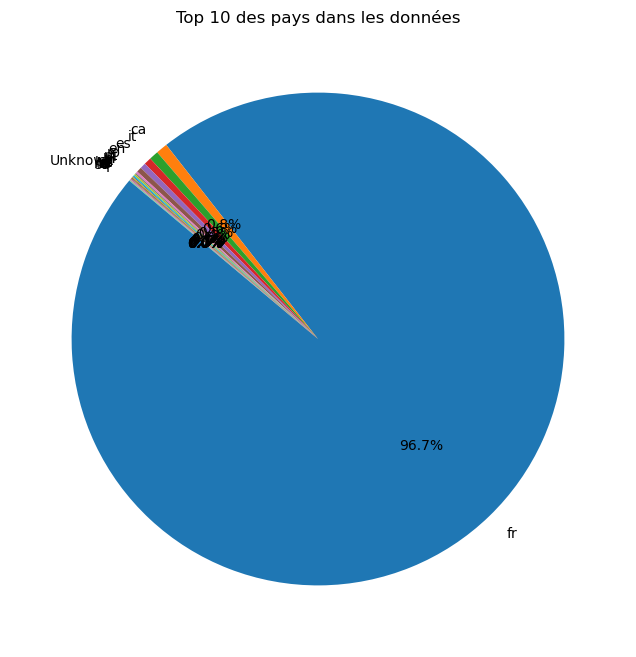

In [128]:
VisualisationGeneral.Pie_Chart_Pays(df_avis1['Langue'],20)

In [129]:
df_avis1['Contenu_avis'].isna().sum()

89

### Troisème classe###


        data_frame : Le DataFrame contenant les données.
        column_name : Le nom de la colonne dans le DataFrame qui contient le texte à analyser.
    Fonctionnalités :
        Stocke le DataFrame et le nom de la colonne pour un usage ultérieur.
        Initialise le WordNetLemmatizer, PorterStemmer, et TfidfVectorizer qui sont des outils utilisés pour le traitement du texte.

2. tokenize(self)

    But : Tokeniser le texte de la colonne spécifiée du DataFrame.
    Fonctionnement :
        Utilise nltk.tokenize.word_tokenize pour diviser le texte en mots ou "tokens".
        Stocke le résultat dans une nouvelle colonne tokens dans le DataFrame.

3. lemmatize(self)

    But : Lemmatiser les tokens.
    Fonctionnement :
        Transforme chaque token en sa forme de base ou lemmatisée, utilisant WordNetLemmatizer.
        Par exemple, le mot "running" sera transformé en "run".
        Stocke les tokens lemmatisés dans la colonne lemmatized du DataFrame.

4. stem(self)

    But : Appliquer le stemming aux tokens.
    Fonctionnement :
        Réduit chaque mot à sa racine ou "stem" en utilisant PorterStemmer.
        Le stemming est moins sophistiqué que la lemmatisation et peut ne pas produire un mot existant (par exemple, "running" pourrait devenir "runn").
        Les résultats sont stockés dans la colonne stemmed du DataFrame.

5. vectorize_text(self)

    But : Vectoriser le texte pour la modélisation.
    Fonctionnement :
        Convertit le texte de la colonne spécifiée en une matrice de caractéristiques TF-IDF (Term Frequency-Inverse Document Frequency) en utilisant TfidfVectorizer.
        TF-IDF est une méthode qui évalue l'importance d'un mot dans un document en fonction du nombre de fois qu'il apparaît dans le document pondéré par son inverse de fréquence dans l'ensemble des documents.
        Les vecteurs sont stockés dans la colonne vectorized du DataFrame.

6. preprocess_and_vectorize(self)

    But : Exécuter toutes les étapes de prétraitement et vectoriser le texte.
    Fonctionnement :
        Exécute séquentiellement les méthodes de tokenisation, lemmatisation (ou stemming), et vectorisation.
        Cette méthode permet d'appliquer un pipeline complet de prétraitement du texte en une seule appelée.

In [3]:
from TextMinigPocesseur import TextMiningProcessus

text_processor = TextMiningProcessus(df_avis1, 'Contenu_avis', 'french')
text_processor.preprocess_and_vectorize()
print(df_avis1.head())



[nltk_data] Downloading package punkt to C:\Users\Youcef
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Youcef
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Youcef
[nltk_data]     Labib\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'df_avis1' is not defined

In [131]:
# stocker dans ficher 
display(df_avis1.head())


Nom_Entreprise     Nom_Client  Nombre_avis Pays  Note  \
0          2atps         agathe            1   FR     5   
1   2htransports  alexandre rif            2   FR     5   
2   2htransports        game lu            1   FR     5   
3   2htransports      sayosurmc            1   FR     5   
4   2htransports            s d            2   FR     1   

                        Date                                Titre_avis  \
0  2023-12-08 10:45:35+00:00                     personnel réactif !!!   
1  2024-04-08 01:40:55+00:00  j'ai demandé un transport pour aller de…   
2  2024-03-09 22:26:36+00:00             j'ai trouvé cette société de…   
3  2023-02-16 23:30:42+00:00         si vous recherchez un service de…   
4  2023-10-03 23:01:28+00:00   ce monsieur nous a flingué une mission…   

                                        Contenu_avis  \
0  personnel réactif !!!! entreprise sérieuse qui...   
1  j'ai demandé un transport pour aller de paris ...   
2  j'ai trouvé cette société de transporteur un p...   
3  si vous recherchez un service de coursier prof...   
4  ce monsieur nous a flingué une mission humanit...   

                                    Réponse_Entrpris  year  ...  day  hour  \
0                                                Non  2023  ...    8    10   
1                                                Non  2024  ...    8     1   
2                                                Non  2024  ...    9    22   
3                                                Non  2023  ...   16    23   
4  Bonjour MD,Je suis désolé d'entendre votre déc...  2023  ...    3    23   

   emojis  emojis_text  Langue extracted_emojis  \
0     NaN          NaN      fr              NaN   
1     NaN          NaN      fr              NaN   
2     NaN          NaN      fr              NaN   
3     NaN          NaN      fr              NaN   
4     NaN          NaN      fr              NaN   

                                              tokens  \
0  [personnel, réactif, !, !, !, !, entreprise, s...   
1  [j'ai, demandé, un, transport, pour, aller, de...   
2  [j'ai, trouvé, cette, société, de, transporteu...   
3  [si, vous, recherchez, un, service, de, coursi...   
4  [ce, monsieur, nous, a, flingué, une, mission,...   

                                      tokens_no_stop  \
0  [personnel, réactif, !, !, !, !, entreprise, s...   
1  [j'ai, demandé, transport, aller, paris, lyon,...   
2  [j'ai, trouvé, cette, société, transporteur, p...   
3  [si, recherchez, service, coursier, profession...   
4  [monsieur, a, flingué, mission, humanitaire, m...   

                                          lemmatized  \
0  [personnel, réactif, !, !, !, !, entreprise, s...   
1  [j'ai, demandé, transport, aller, paris, lyon,...   
2  [j'ai, trouvé, cette, société, transporteur, p...   
3  [si, recherchez, service, coursier, profession...   
4  [monsieur, a, flingué, mission, humanitaire, m...   

                                          vectorized  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.3490834821363735, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.3870755181387421, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.3525563531321594, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[5 rows x 23 columns]

In [7]:
from VisualisationMap import VisualisationGeneral
import pandas as pd 
print(dir(VisualisationGeneral))

df_avis1= pd.read_csv("df_avis_TexteMininge.csv")

['Pie_Chart_Pays', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'countplo_notsClients', 'diagramme_Pays', 'histogramme_trustScore', 'plot_bar_chart', 'plot_bar_chart_services', 'plot_distributionDate', 'plot_map', 'plot_word_cloud', 'plot_word_frequency']


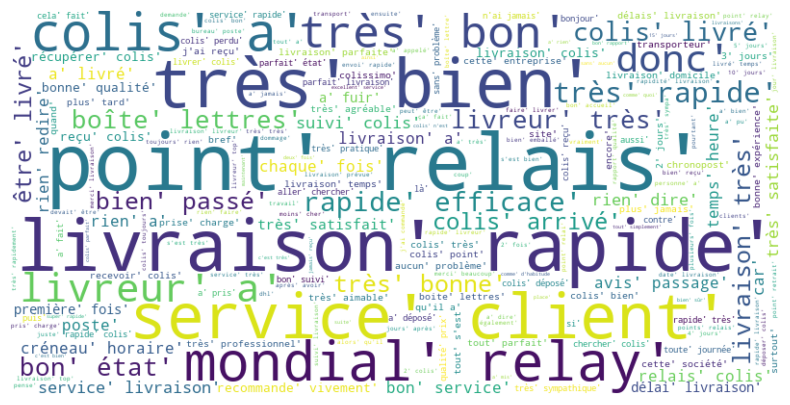

In [10]:
VisualisationGeneral.plot_word_cloud(df_avis1, 'tokens_no_stop')
# Karnel problem 


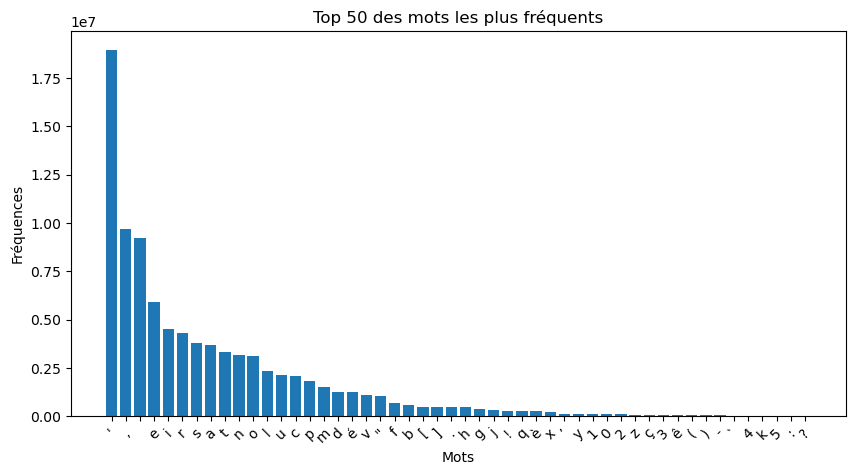

In [11]:
VisualisationGeneral.plot_word_frequency(df_avis1, 'tokens_no_stop')

In [136]:
df_avis1.to_csv('df_avis_TexteMininge.csv', index=False)


